In [115]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn_qqplot import pplot
import warnings
warnings.filterwarnings("ignore")

In [72]:
data = pd.ExcelFile("Data.xlsx")

In [73]:
#Equity data
equity_level = pd.read_excel(data,"Equity_Index").set_index(["Date"])
equity_returns = pd.read_excel(data,"Equity_Returns").set_index(["Date"])

In [74]:
equity_returns

SSECompositeIndex    ASX200  BSESensex   FTSE100    S&P500  \
Date                                                                     
2004-12-31                NaN       NaN        NaN       NaN       NaN   
2005-01-03                NaN       NaN        NaN  0.000000 -0.811942   
2005-01-04                NaN       NaN  -0.422063  0.679231 -1.167136   
2005-01-05           0.737299 -0.473074  -2.889335 -0.845884 -0.362784   
2005-01-06          -0.999009 -0.235183  -1.415884  0.380770  0.350586   
...                       ...       ...        ...       ...       ...   
2022-12-26           0.646681  0.000000   1.204995  0.000000  0.000000   
2022-12-27           0.978844  0.000000   0.596053  0.000000 -0.404962   
2022-12-28          -0.263931 -0.299679  -0.028146  0.323835 -1.202064   
2022-12-29          -0.443738 -0.935592   0.367093  0.206744  1.746133   
2022-12-30           0.506232  0.264955  -0.479506 -0.811958 -0.254074   

            HangSengIndex  Nikkei225    ESTX50  
Date                                            
2004-12-31            NaN        NaN       NaN  
2005-01-03            NaN        NaN       NaN  
2005-01-04      -1.345184        NaN       NaN  
2005-01-05      -2.004429  -0.696581       NaN  
2005-01-06      -0.380114   0.478602       NaN  
...                   ...        ...       ...  
2022-12-26       0.000000   0.650343  0.000000  
2022-12-27       0.000000   0.159056  0.416029  
2022-12-28       1.561010  -0.405965 -0.627981  
2022-12-29      -0.792855  -0.937074  1.083013  
2022-12-30       0.203988   0.003181 -1.466206  

[4686 rows x 8 columns]

In [75]:
#FX data
fx_level = pd.read_excel(data,"FX_Index").set_index(["Date"])
fx_returns = pd.read_excel(data,"FX_Returns").set_index(["Date"])

In [76]:
fx_returns

AUDUSD    CHFUSD    CNYUSD    EURUSD    GBPUSD    INRUSD  \
Date                                                                     
2004-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
2005-01-03       NaN  0.569926  0.000000  0.705377 -0.790406  0.249381   
2005-01-04       NaN  1.795997  0.000000  1.415702 -1.103793  0.172749   
2005-01-05       NaN -0.059952  0.000000  0.014606  0.101818  0.225333   
2005-01-06       NaN  0.608449  0.000000  0.735716 -0.478503  0.548300   
...              ...       ...       ...       ...       ...       ...   
2022-12-26 -0.513806  0.201932  0.081628 -0.604389  0.166785 -0.326755   
2022-12-27 -0.475922 -0.093258 -0.393488  0.259230  0.200234  0.361722   
2022-12-28  0.217857 -0.301499 -0.031606  0.028730 -0.470261 -0.152951   
2022-12-29 -0.254528 -0.160353  0.267280  0.074460  0.009614  0.091690   
2022-12-30 -0.279331 -0.523869 -0.207810 -0.295495  0.231482 -0.020397   

              JPYUSD    SGDUSD  
Date                            
2004-12-31       NaN       NaN  
2005-01-03  0.224364  0.429077  
2005-01-04  1.557328  0.634769  
2005-01-05 -0.392942 -0.200150  
2005-01-06  0.923698  0.237013  
...              ...       ...  
2022-12-26  0.327145  0.022194  
2022-12-27 -0.019569 -0.362505  
2022-12-28  0.543811  0.059401  
2022-12-29  0.410533  0.121695  
2022-12-30 -0.834114 -0.423935  

[4692 rows x 8 columns]

In [77]:
#Commodity data
commodity_level = pd.read_excel(data,"Commodity_Index")
commodity_level.rename(columns = {commodity_level.columns[0]:"Date"},inplace = True)
commodity_level = commodity_level.set_index(["Date"])

commodity_returns = pd.read_excel(data,"Commodity_Returns")
commodity_returns.rename(columns = {commodity_returns.columns[0]:"Date"},inplace = True)
commodity_returns = commodity_returns.set_index(["Date"])

In [78]:
commodity_level

WTI  CRUDE         Gold  Natural Gas     Silver
Date                                                         
2005-01-03  42.16    NaN   428.700012        5.790   6.477000
2005-01-04  43.96  40.75   428.500000        5.902   6.427000
2005-01-05  43.41  41.00   426.600006        5.833   6.512000
2005-01-06  45.51  43.25   421.000000        6.049   6.433000
2005-01-07  45.32  43.28   418.899994        6.001   6.429000
...           ...    ...          ...          ...        ...
2022-12-26    NaN    NaN          NaN          NaN        NaN
2022-12-27  79.45    NaN  1814.800049        5.282  24.040001
2022-12-28  78.89  81.70  1807.900024        4.709  23.663000
2022-12-29  78.43  80.96  1819.500000        4.559  24.077999
2022-12-30  80.16  82.82  1819.699951        4.475  23.862000

[4695 rows x 5 columns]

In [79]:
#IR data
ir_data = pd.read_excel(data,"IR_Level").set_index(["DATE"])
ir_returns = pd.read_excel(data,"IR_Returns").set_index(["DATE"])

In [80]:
ir_data

US_10Y  UK_10Y  EU_10Y  JPY_10Y  IND_10Y  Swiss_10Y  Canada_10Y  \
DATE                                                                          
2005-01-01    4.22  4.5419  3.6336    1.310      NaN      2.249    4.260500   
2005-02-01    4.17  4.5884  3.6153    1.419      NaN      2.381    4.205000   
2005-03-01    4.50  4.7960  3.7625    1.325      NaN      2.355    4.358182   
2005-04-01    4.34  4.6218  3.5709    1.257      NaN      2.074    4.193810   
2005-05-01    4.14  4.4173  3.4074    1.238      NaN      2.014    4.073810   
...            ...     ...     ...      ...      ...        ...         ...   
2022-08-01    2.90  2.3278  2.0583    0.220     7.28      0.790    2.859091   
2022-09-01    3.52  3.5007  2.8138    0.240     7.28      1.160    3.145500   
2022-10-01    3.98  4.1096  3.1850    0.245     7.46      1.120    3.380500   
2022-11-01    3.89  3.4171  2.9342    0.250     7.36      1.060    3.166190   
2022-12-01    3.62  3.5015  3.0002    0.410     7.28      1.570    2.941500   

            Australia_10Y  
DATE                       
2005-01-01       5.351842  
2005-02-01       5.397750  
2005-03-01       5.652619  
2005-04-01       5.472000  
2005-05-01       5.287727  
...                   ...  
2022-08-01       3.370000  
2022-09-01       3.740000  
2022-10-01       3.920000  
2022-11-01       3.710000  
2022-12-01       3.570000  

[216 rows x 8 columns]

## Exploring Regime Changes

### Creating datasets

We will explore regime change for two events: - 

1. Global Financial Crisis (2008): We have selected the cutoff date to be 2008-09-30

2. Covid Crisis (2020) - We have selected the cutoff date to be 2020-03-20

### Global Financial Crisis

In [147]:
n = len(equity_level[:"2008-09-30"])
m = len(ir_data[:"2008-09-30"])

In [148]:
equity_level_preGFC = equity_level.iloc[:n]
equity_level_postGFC = equity_level.iloc[n:2*n]
fx_level_preGFC = fx_level.iloc[:n]
fx_level_postGFC = fx_level.iloc[n:2*n]
commodity_level_preGFC = commodity_level.iloc[:n]
commodity_level_postGFC = commodity_level.iloc[n:2*n]
ir_data_preGFC = ir_data.iloc[:m]
ir_data_postGFC = ir_data.iloc[m:2*m]


In [149]:
equity_returns_preGFC = equity_returns.iloc[:n]
equity_returns_postGFC = equity_returns.iloc[n:2*n]
fx_returns_preGFC = fx_returns.iloc[:n]
fx_returns_postGFC = fx_returns.iloc[n:2*n]
commodity_returns_preGFC = commodity_returns.iloc[:n]
commodity_returns_postGFC = commodity_returns.iloc[n:2*n]
ir_returns_preGFC = ir_returns.iloc[:m]
ir_returns_postGFC = ir_returns.iloc[m:2*m]

### Comprarative Analysis pre and post Global Financial Crisis

#### Trend Analysis  - Equities

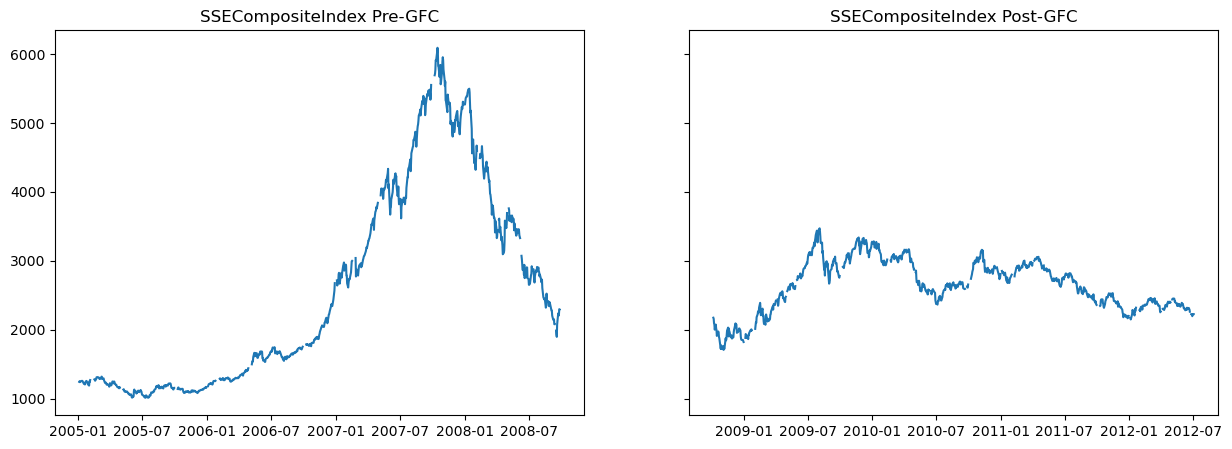

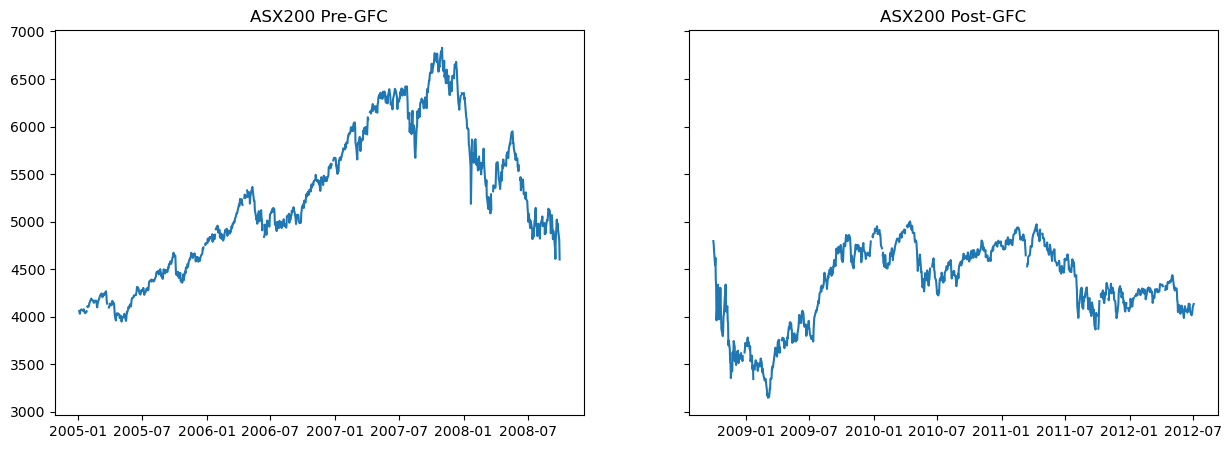

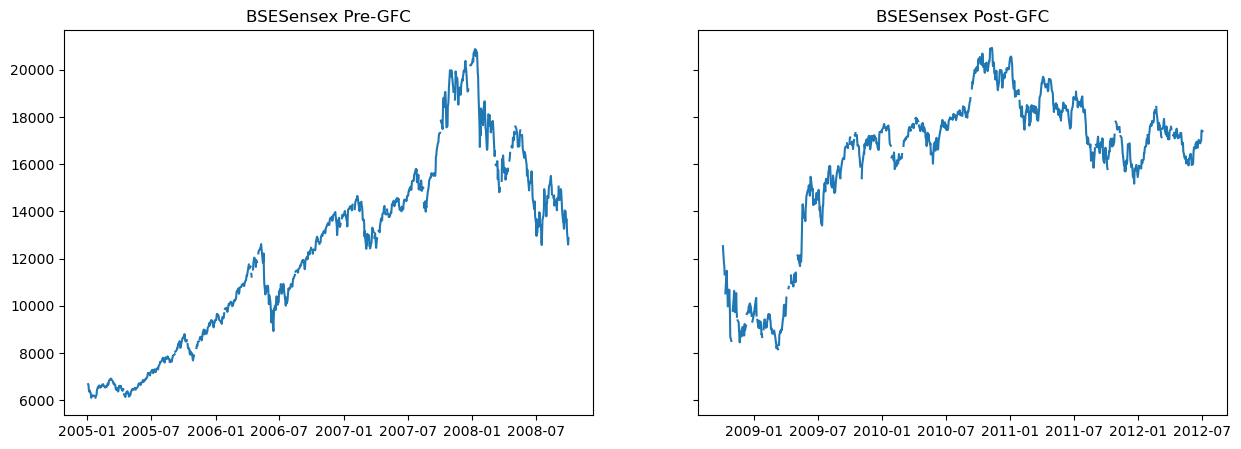

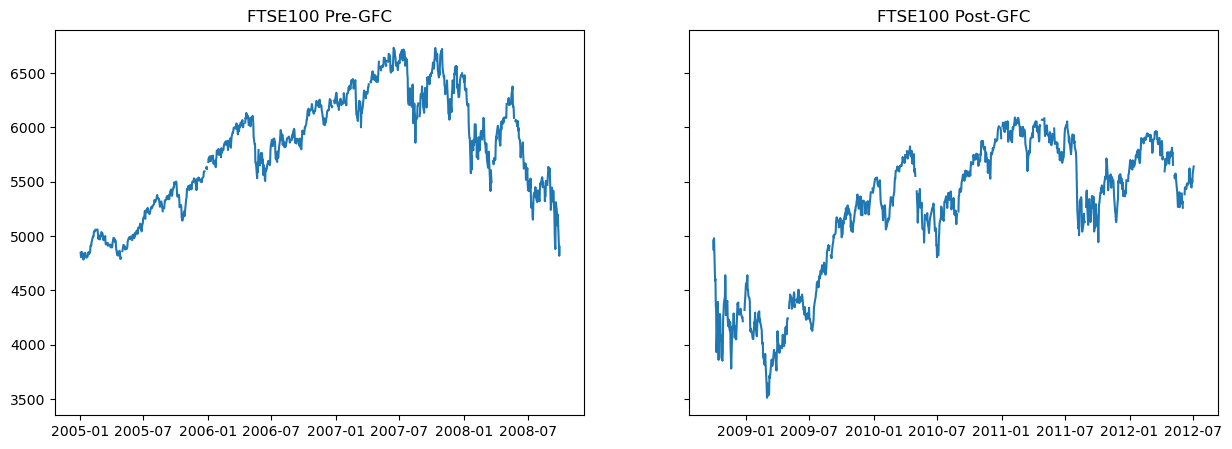

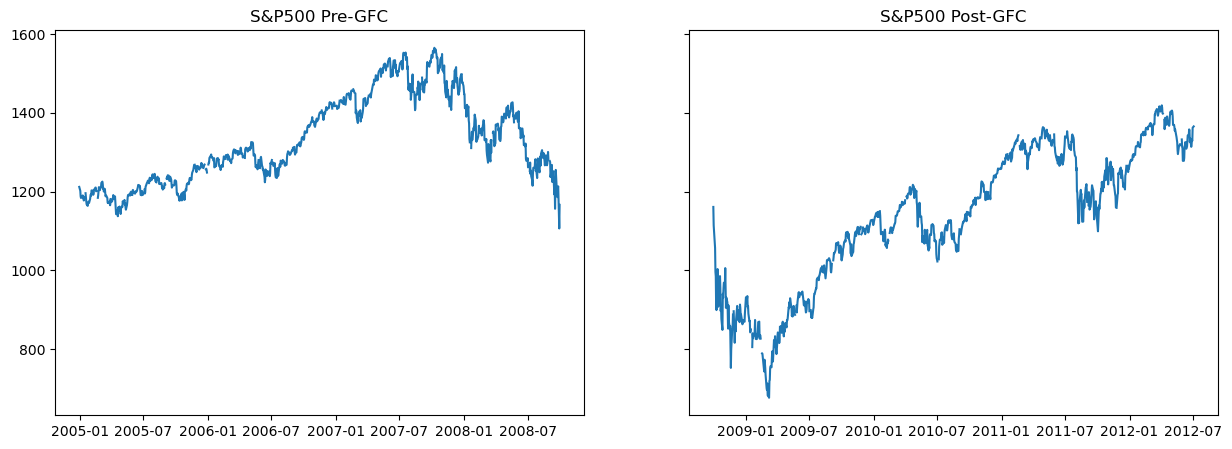

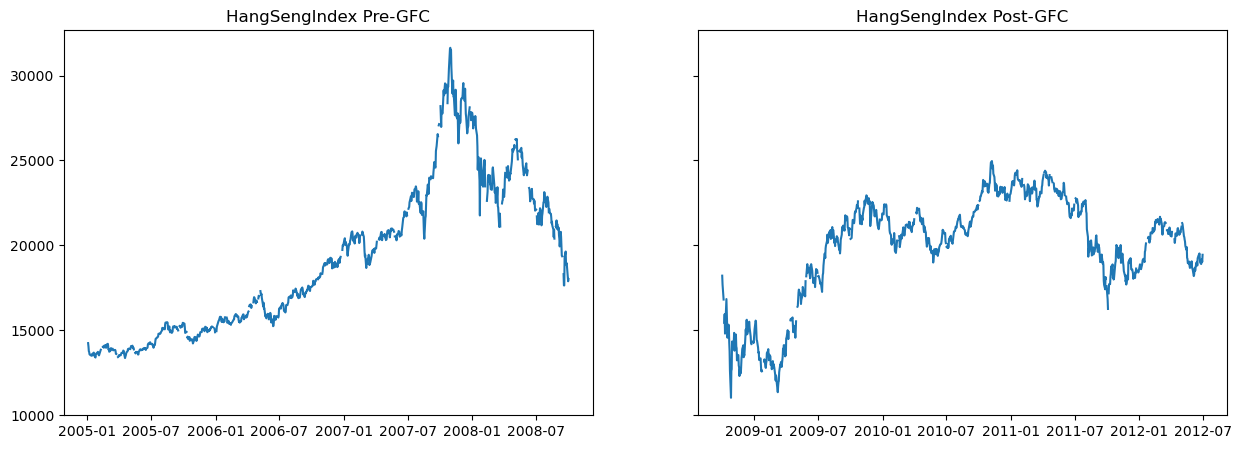

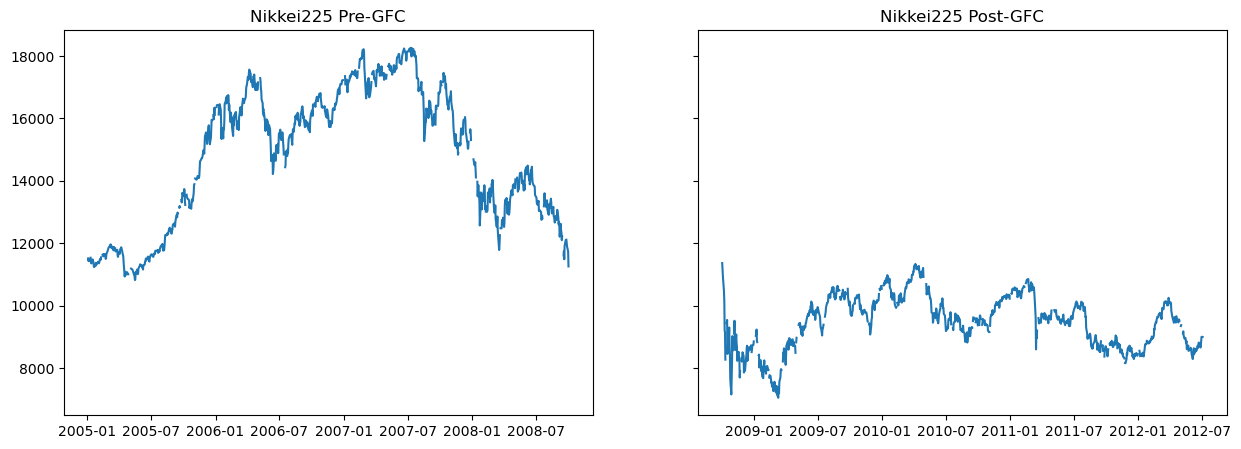

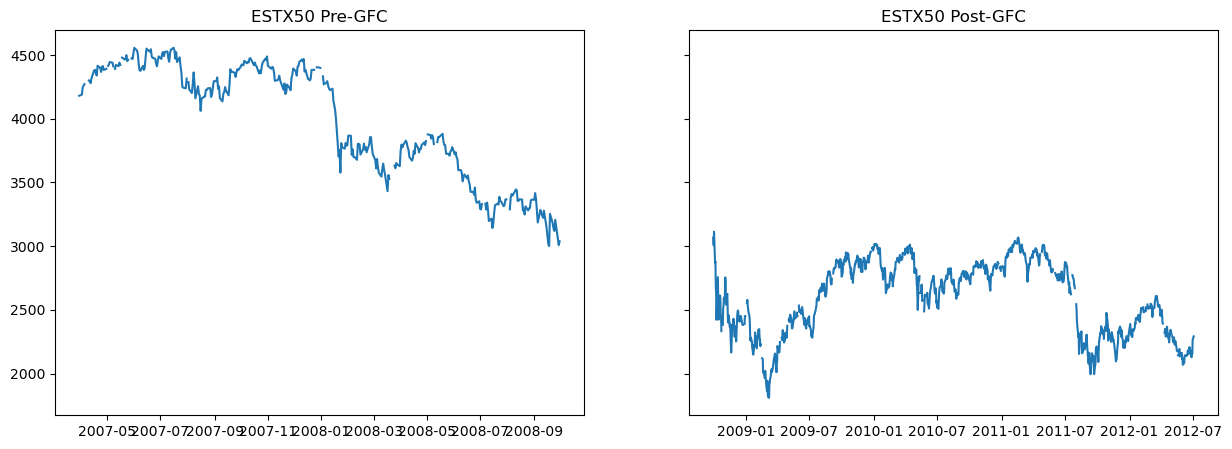

In [141]:
for i in range(len(equity_level_preGFC.columns)):
    fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex='col', sharey='row')
    ax= ax.flatten()
    ax[0].plot(equity_level_preGFC.iloc[:,i],label= equity_level_preGFC.columns[i])
    ax[0].set_title(equity_level_preGFC.columns[i]+' Pre-GFC')
    ax[1].plot(equity_level_postGFC.iloc[:,i],label= equity_level_postGFC.columns[i])
    ax[1].set_title(equity_level_postGFC.columns[i]+' Post-GFC')
    
plt.show() 

#### Trend Analysis - FX

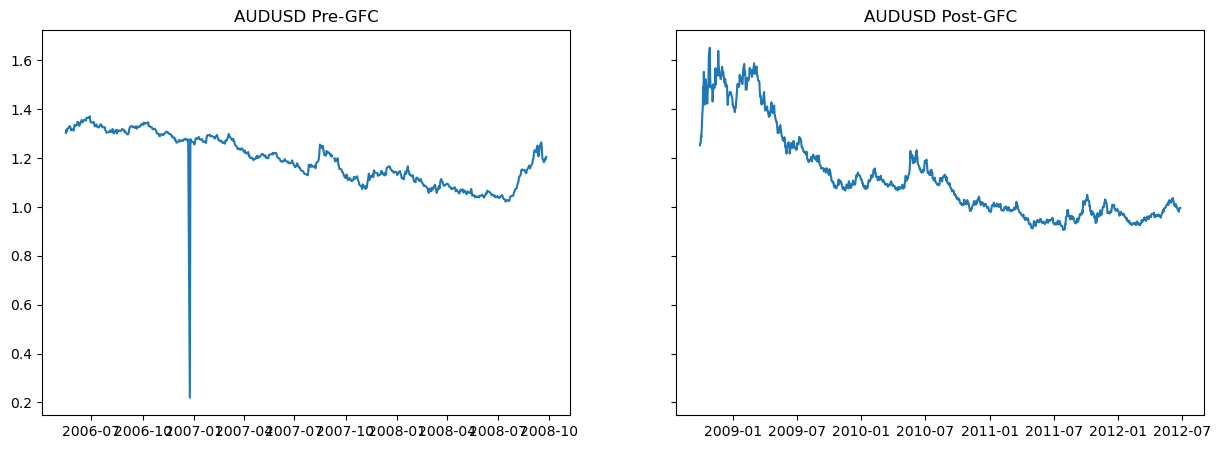

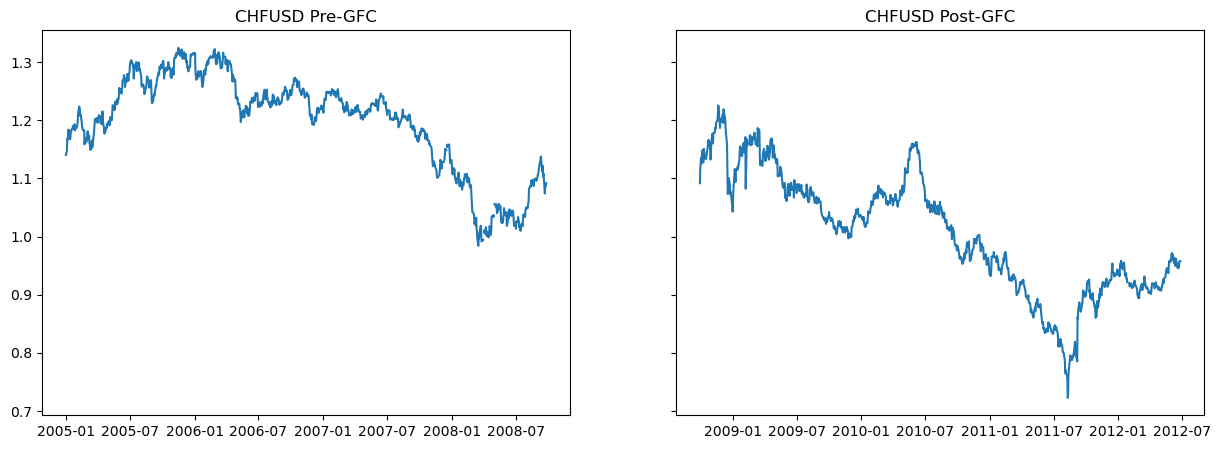

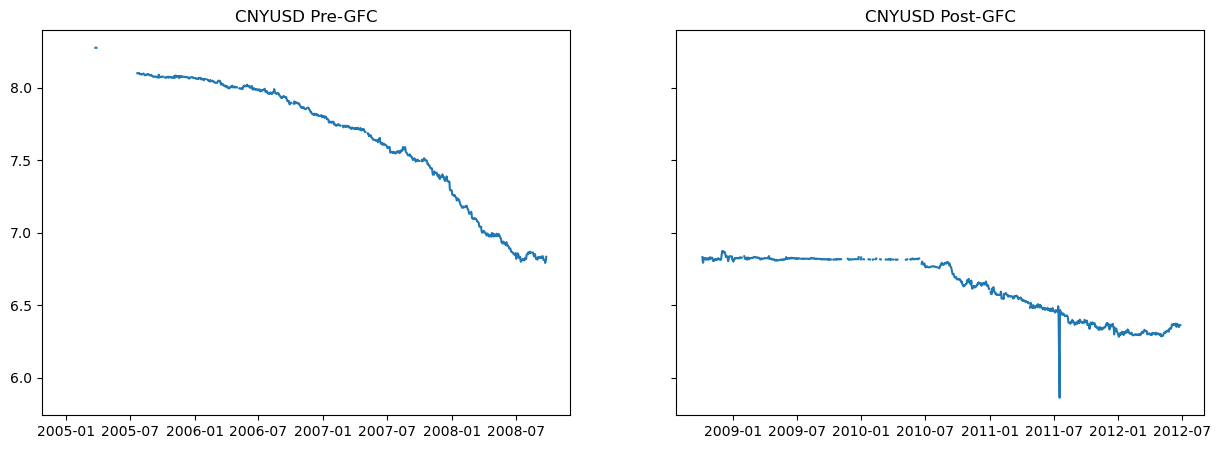

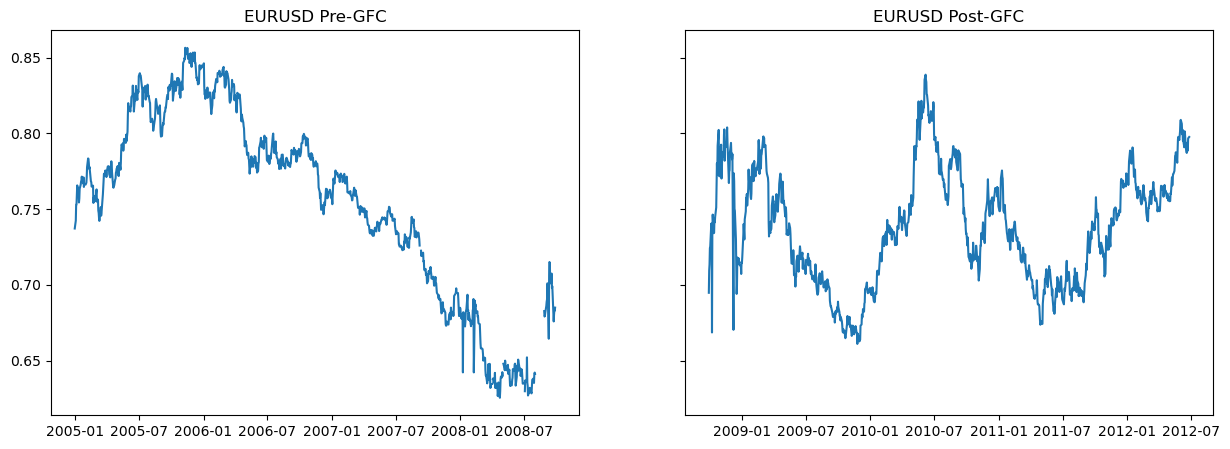

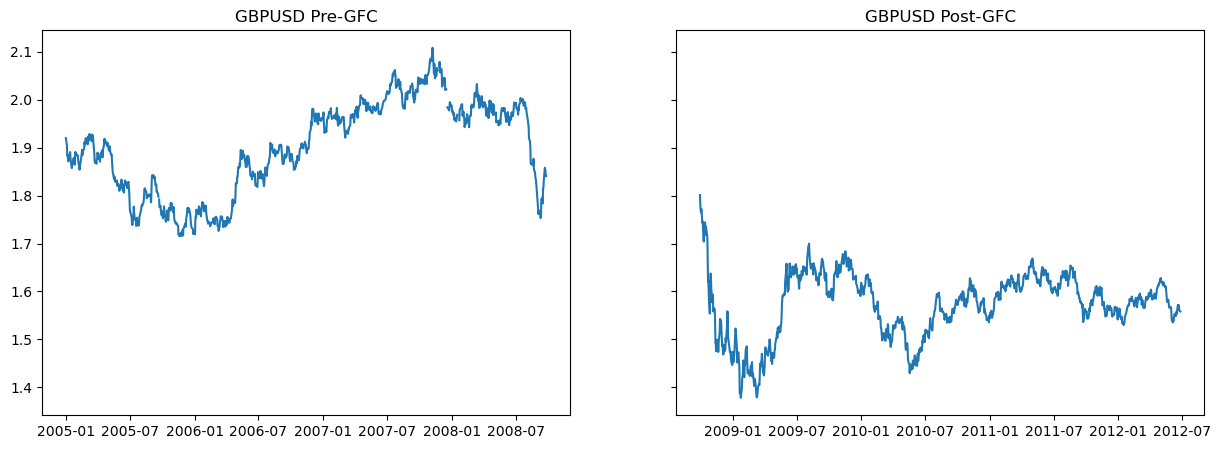

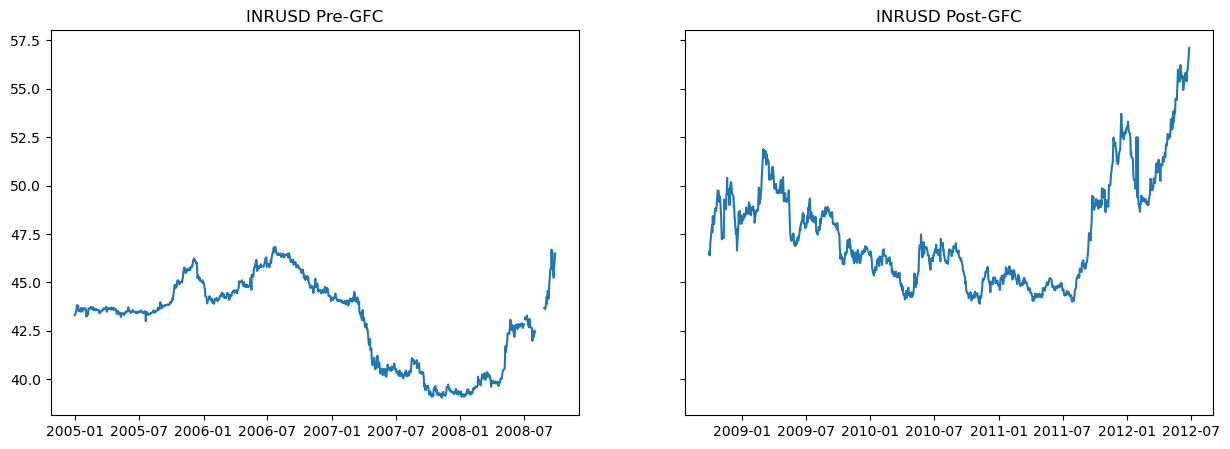

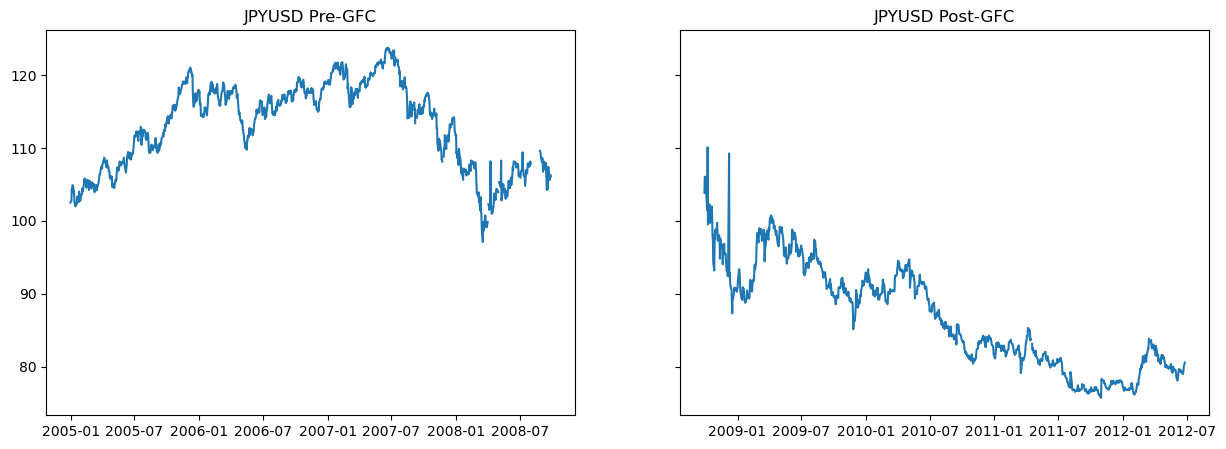

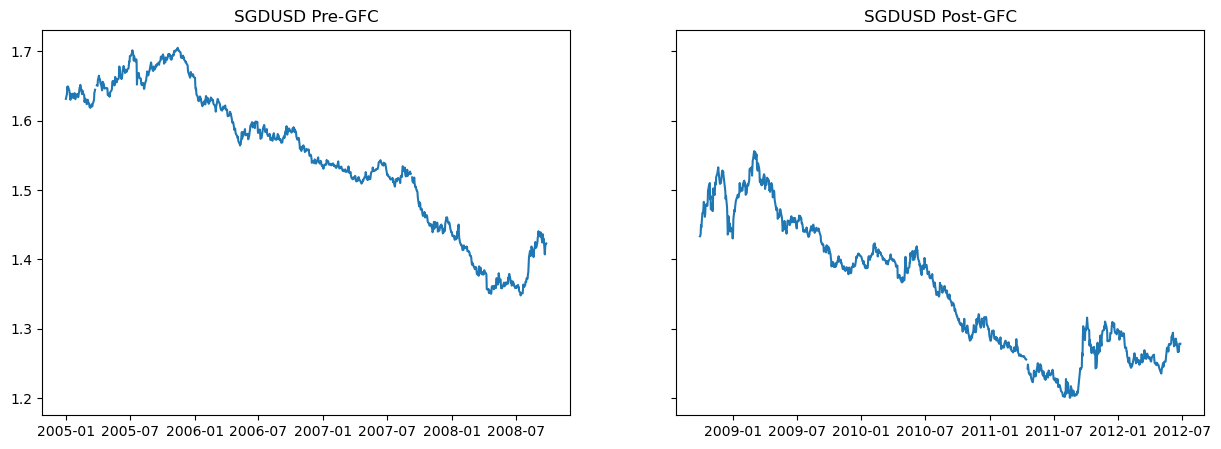

In [142]:
for i in range(len(fx_level_preGFC.columns)):
    fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex='col', sharey='row')
    ax= ax.flatten()
    ax[0].plot(fx_level_preGFC.iloc[:,i],label= fx_level_preGFC.columns[i])
    ax[0].set_title(fx_level_preGFC.columns[i]+' Pre-GFC')
    ax[1].plot(fx_level_postGFC.iloc[:,i],label= fx_level_postGFC.columns[i])
    ax[1].set_title(fx_level_postGFC.columns[i]+' Post-GFC')
    
plt.show() 

#### Trend Analysis - Commodities

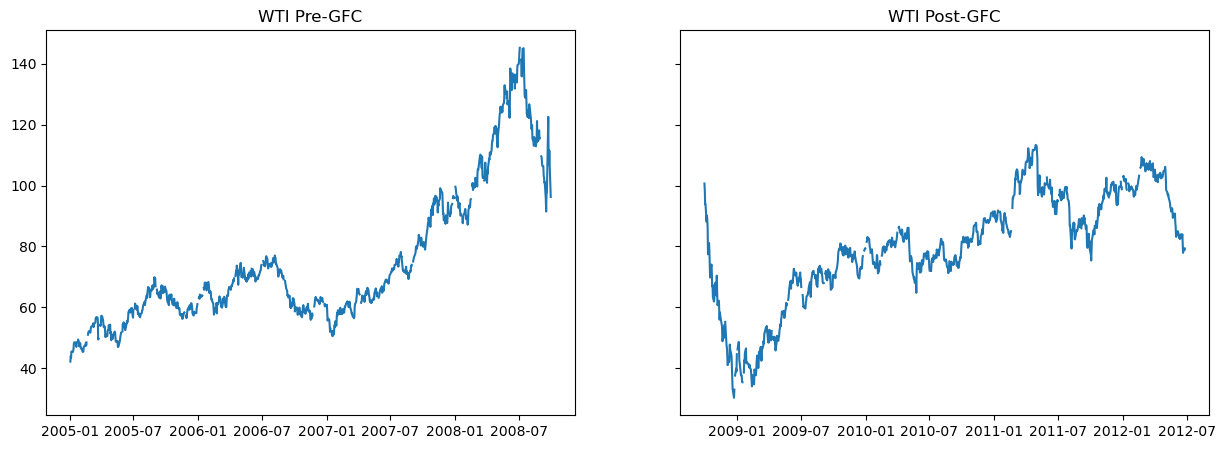

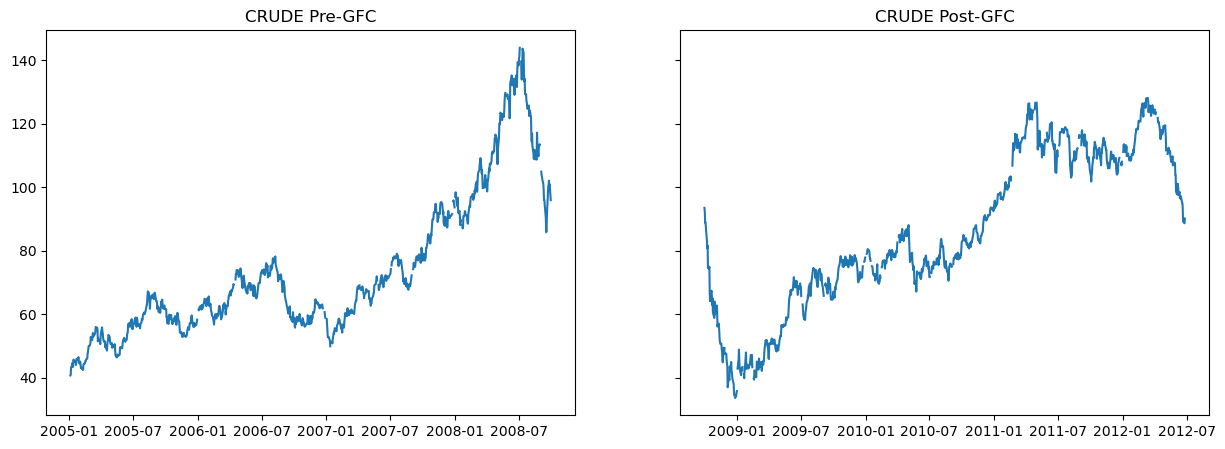

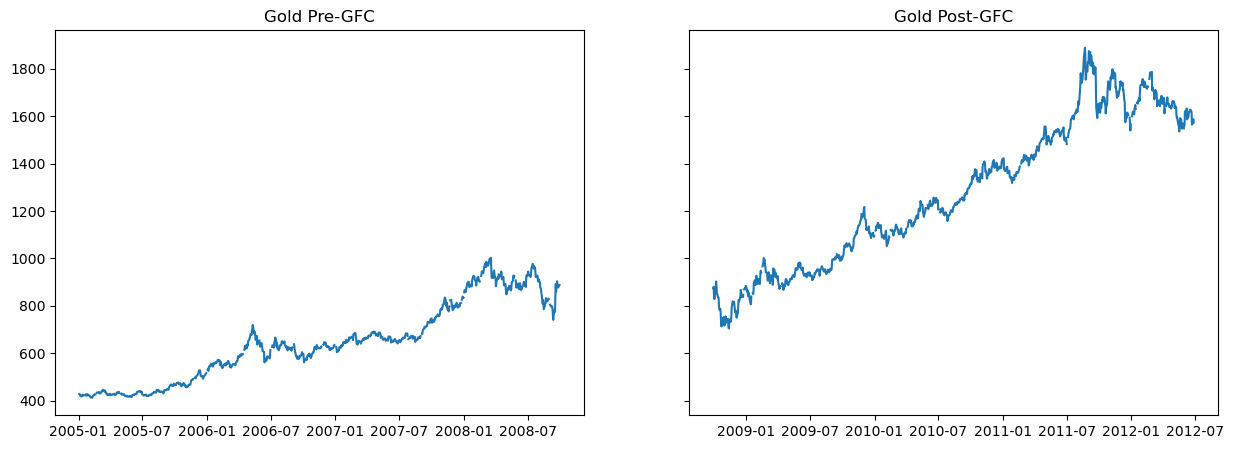

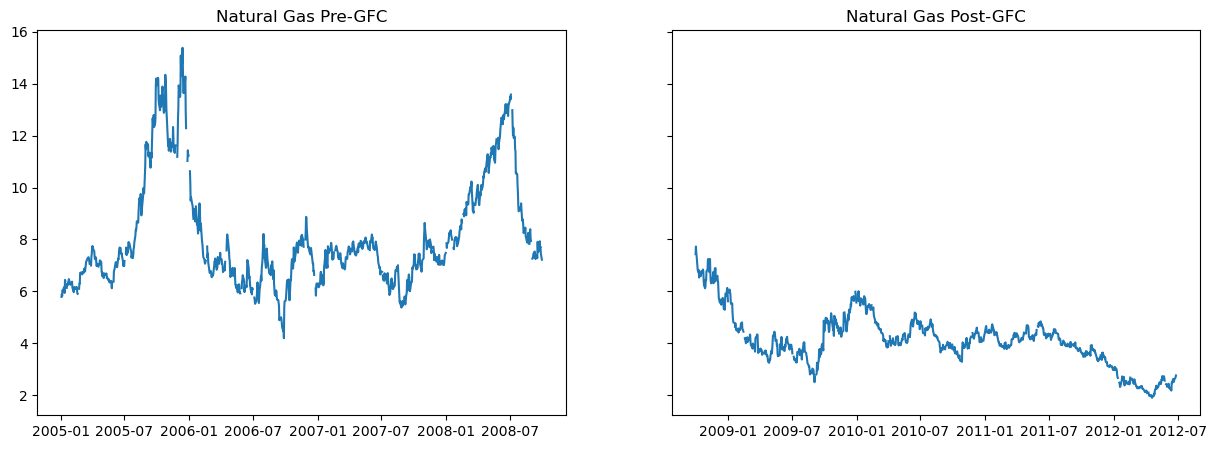

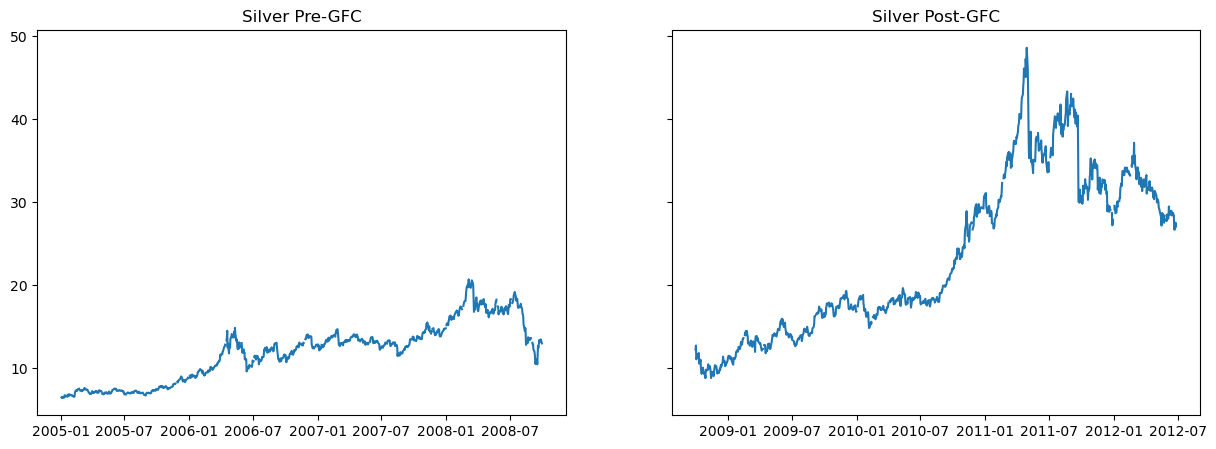

In [143]:
for i in range(len(commodity_level_preGFC.columns)):
    fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex='col', sharey='row')
    ax= ax.flatten()
    ax[0].plot(commodity_level_preGFC.iloc[:,i],label= commodity_level_preGFC.columns[i])
    ax[0].set_title(commodity_level_preGFC.columns[i]+' Pre-GFC')
    ax[1].plot(commodity_level_postGFC.iloc[:,i],label= commodity_level_postGFC.columns[i])
    ax[1].set_title(commodity_level_postGFC.columns[i]+' Post-GFC')
    
plt.show() 

#### Trend Analysis - Interest Rates

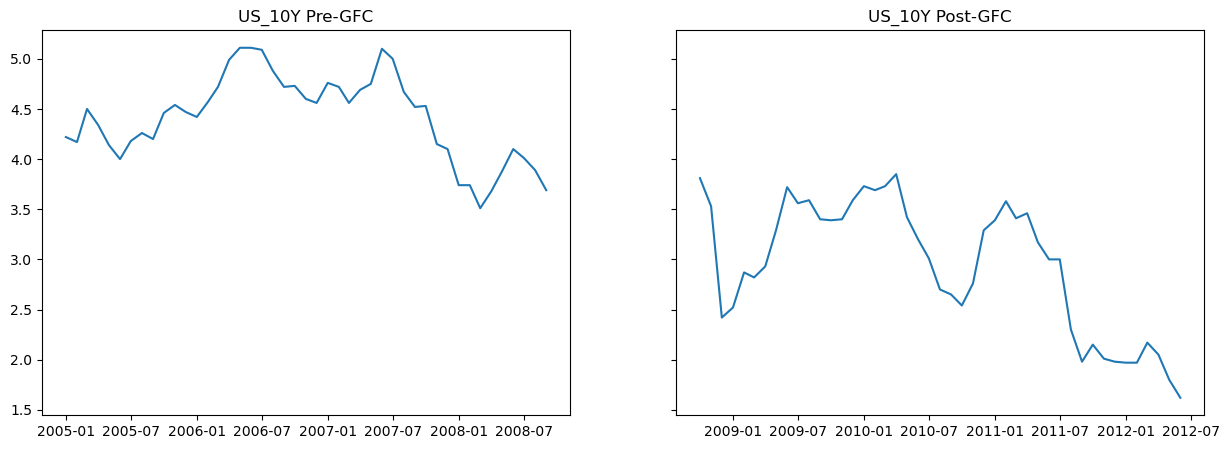

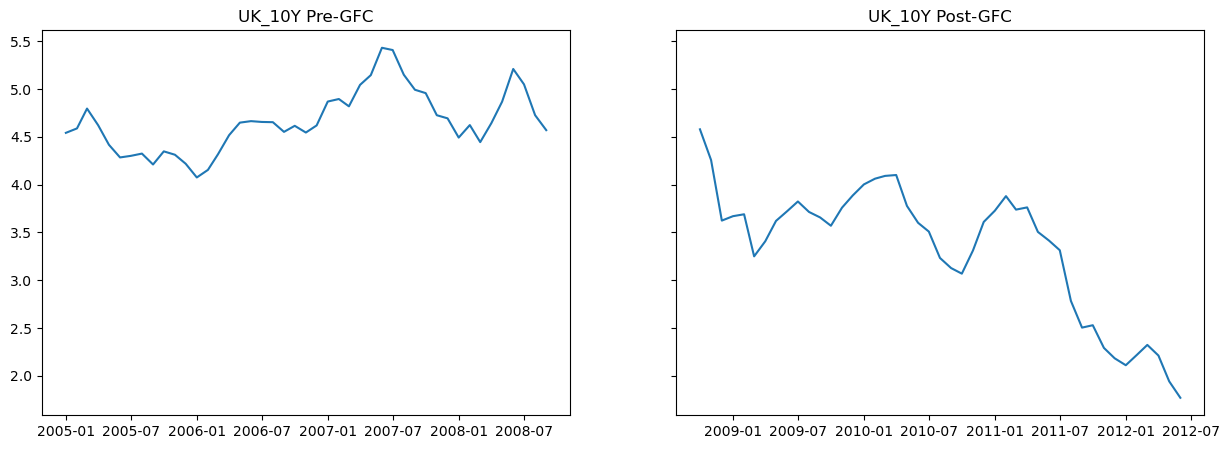

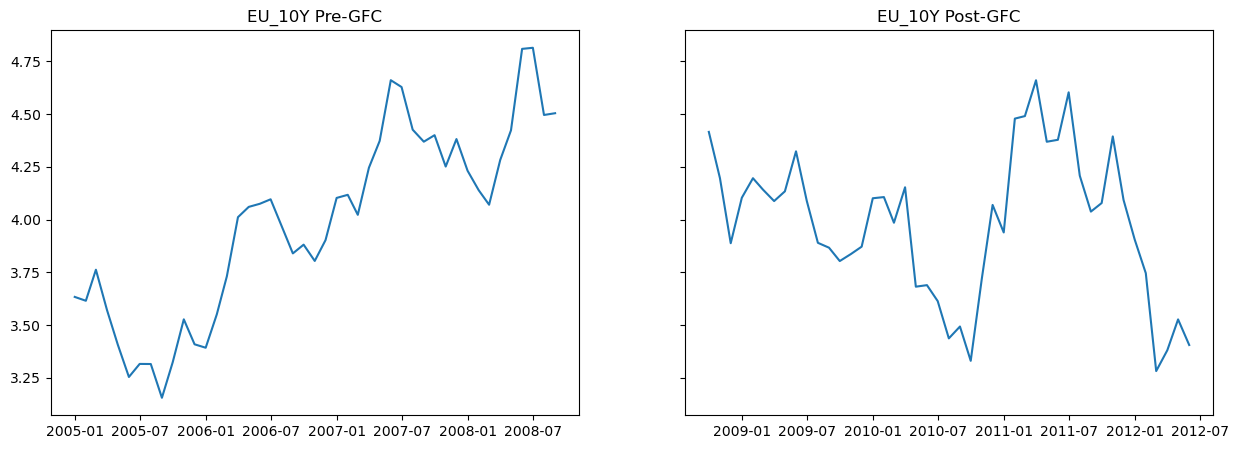

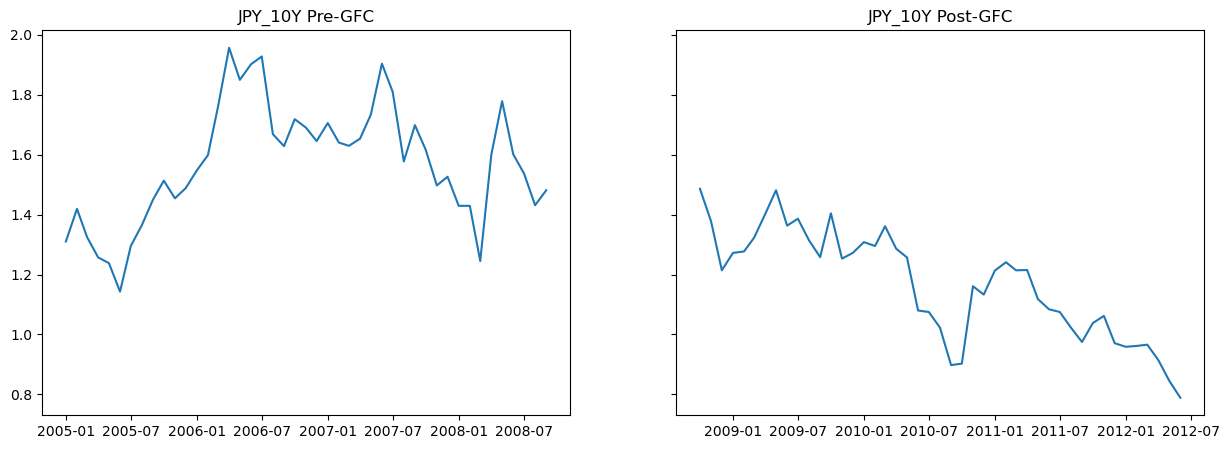

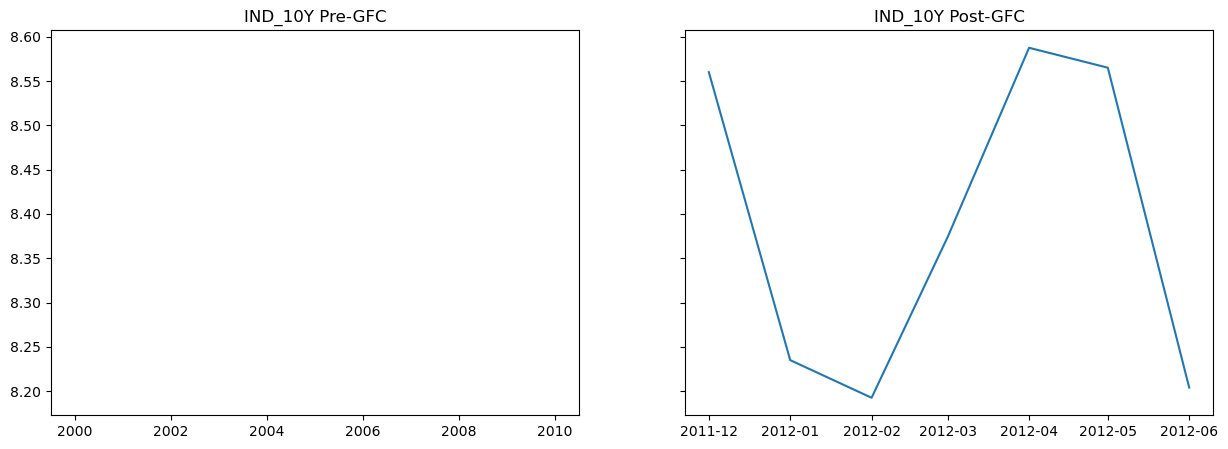

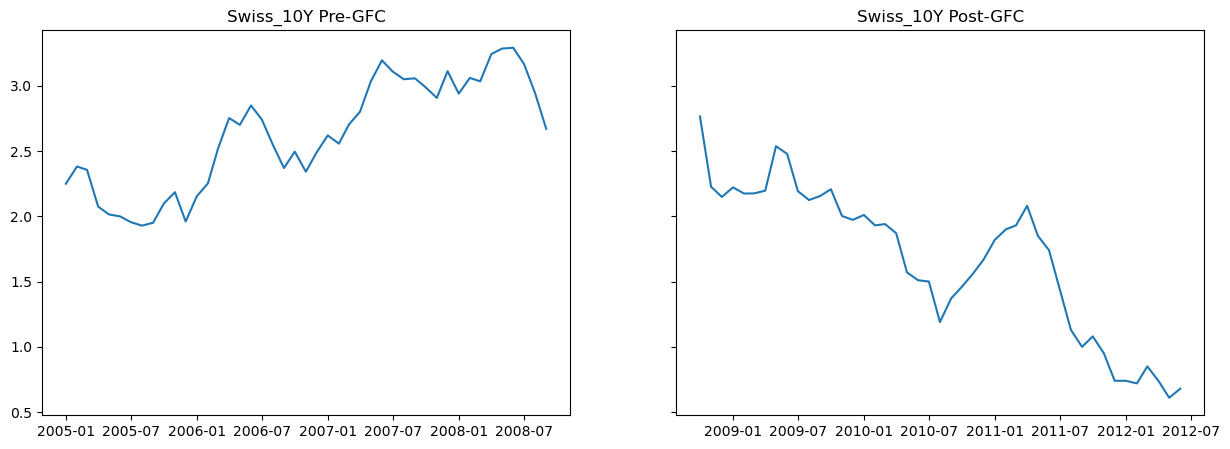

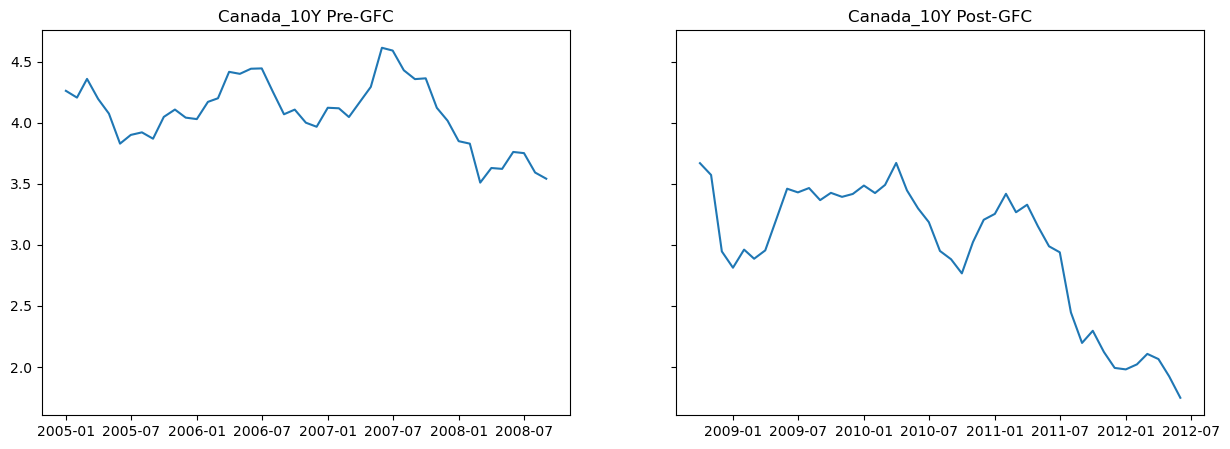

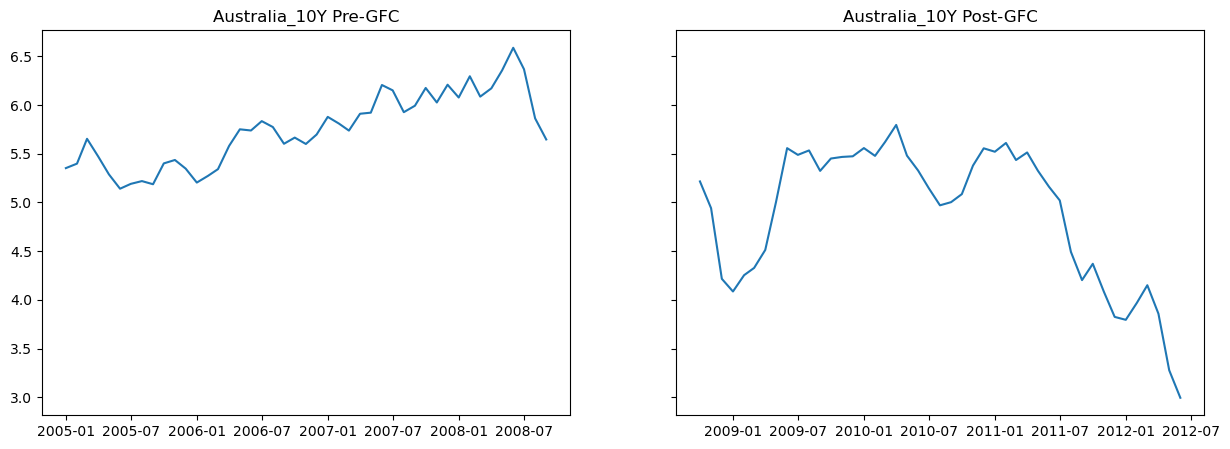

In [150]:
for i in range(len(ir_data_preGFC.columns)):
    fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex='col', sharey='row')
    ax= ax.flatten()
    ax[0].plot(ir_data_preGFC.iloc[:,i],label= ir_data_preGFC.columns[i])
    ax[0].set_title(ir_data_preGFC.columns[i]+' Pre-GFC')
    ax[1].plot(ir_data_postGFC.iloc[:,i],label= ir_data_postGFC.columns[i])
    ax[1].set_title(ir_data_postGFC.columns[i]+' Post-GFC')
    
plt.show() 

#### Volatility Clustering - Equities

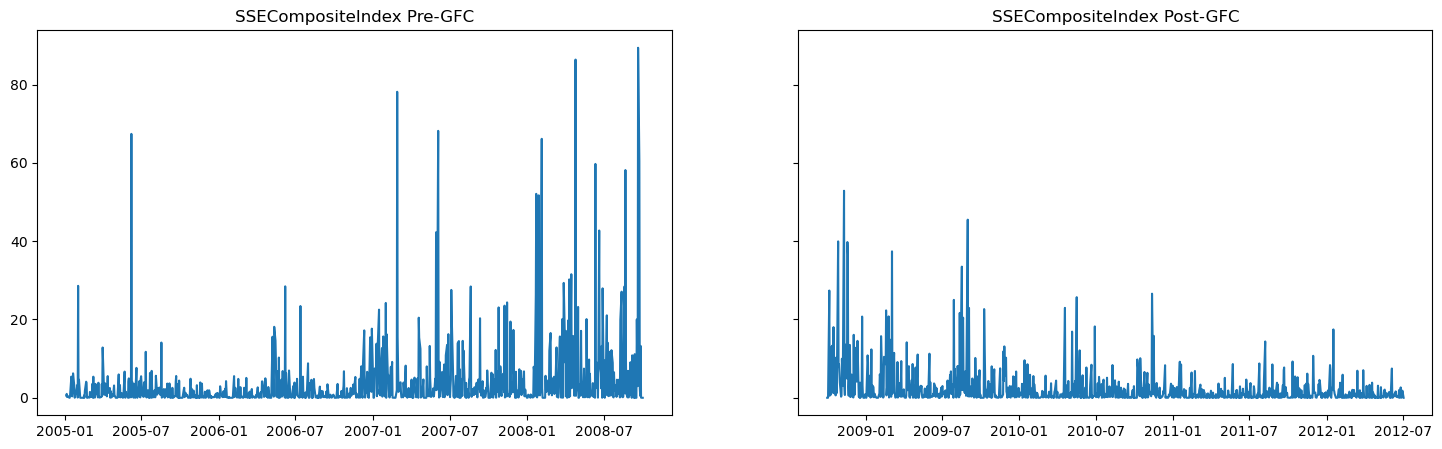

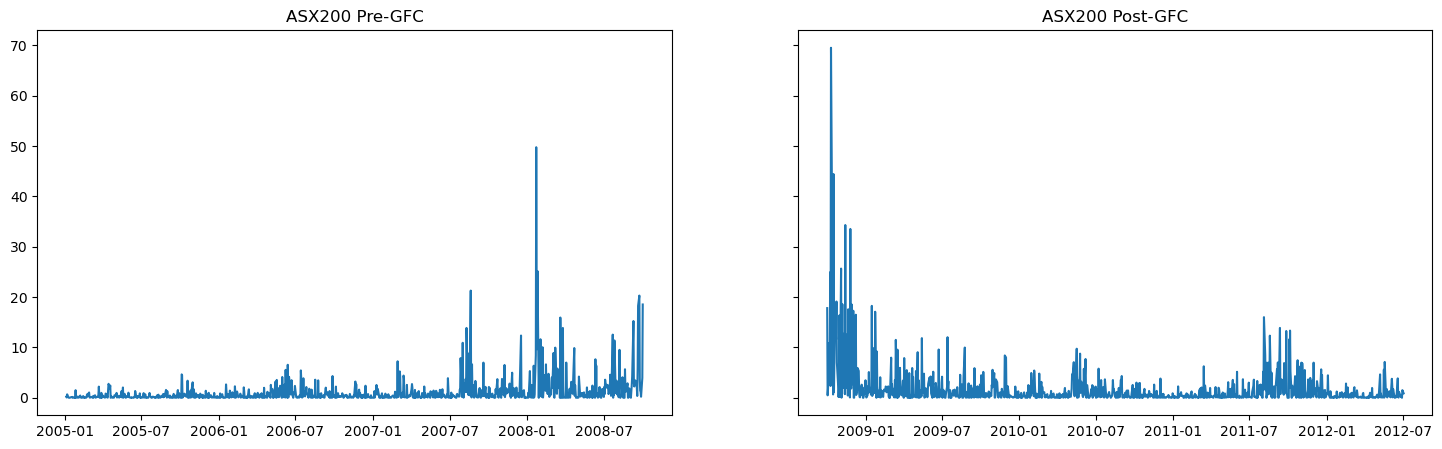

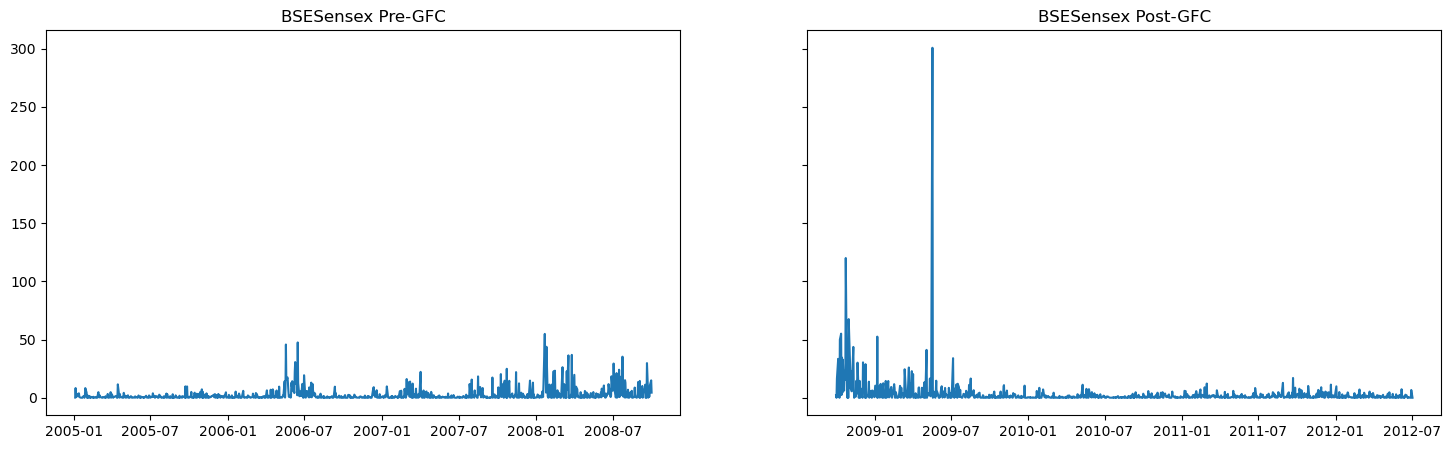

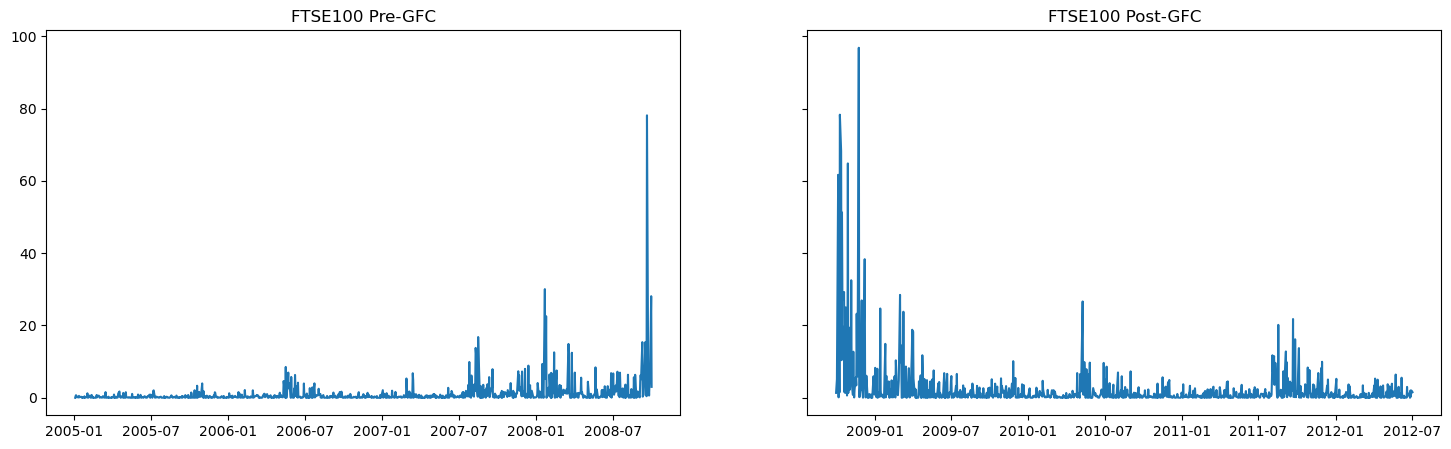

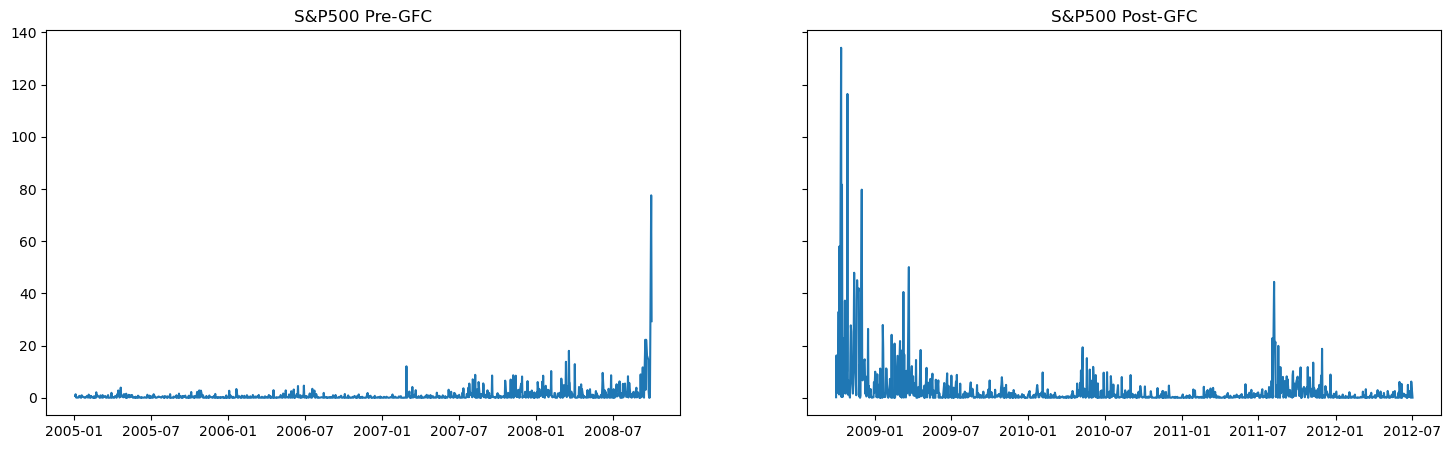

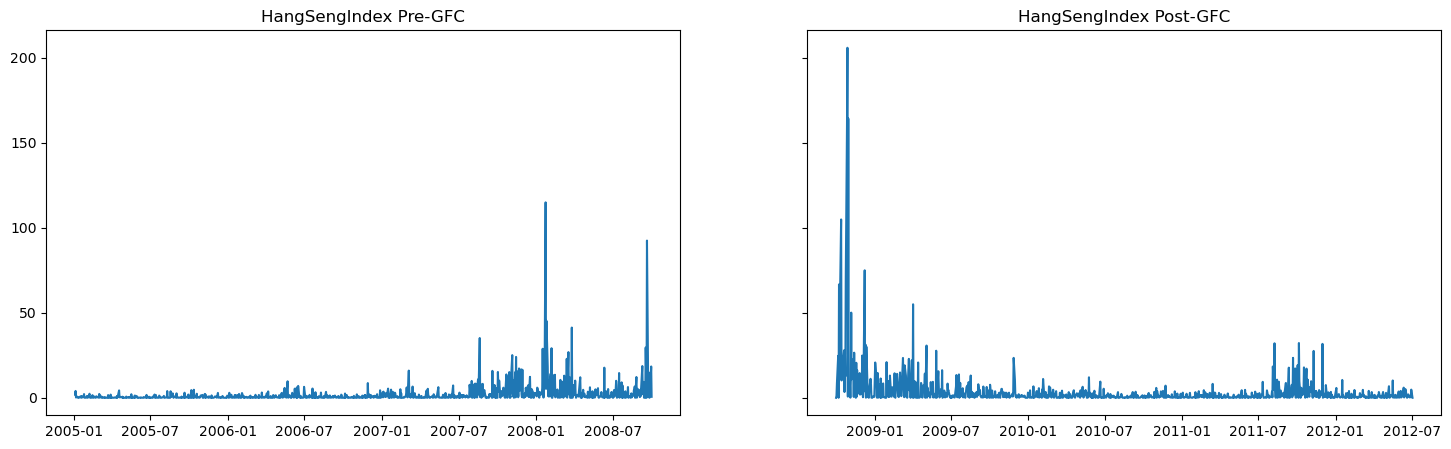

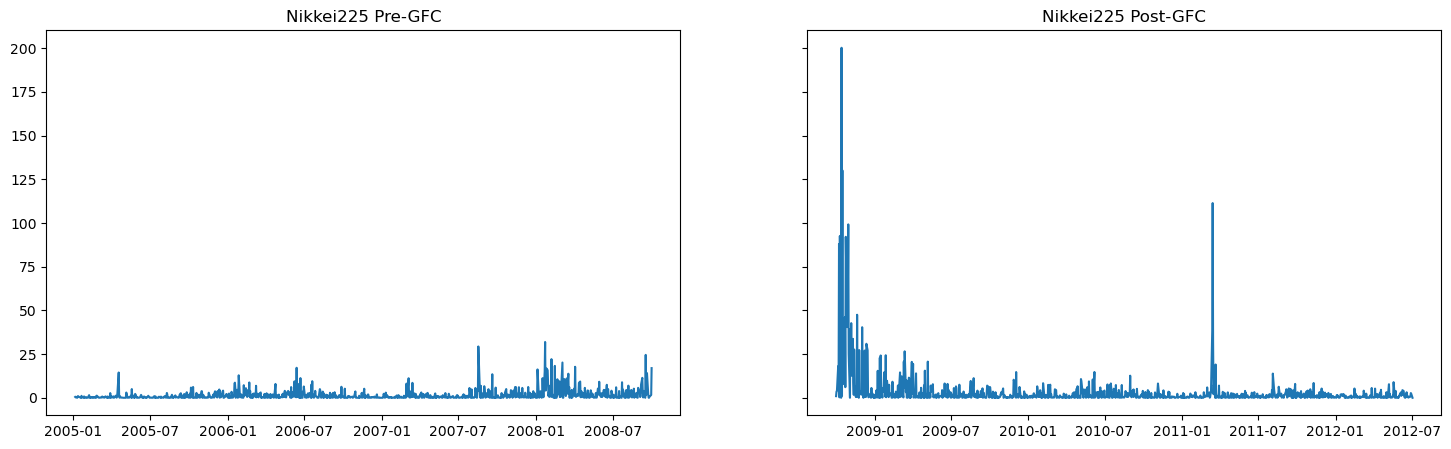

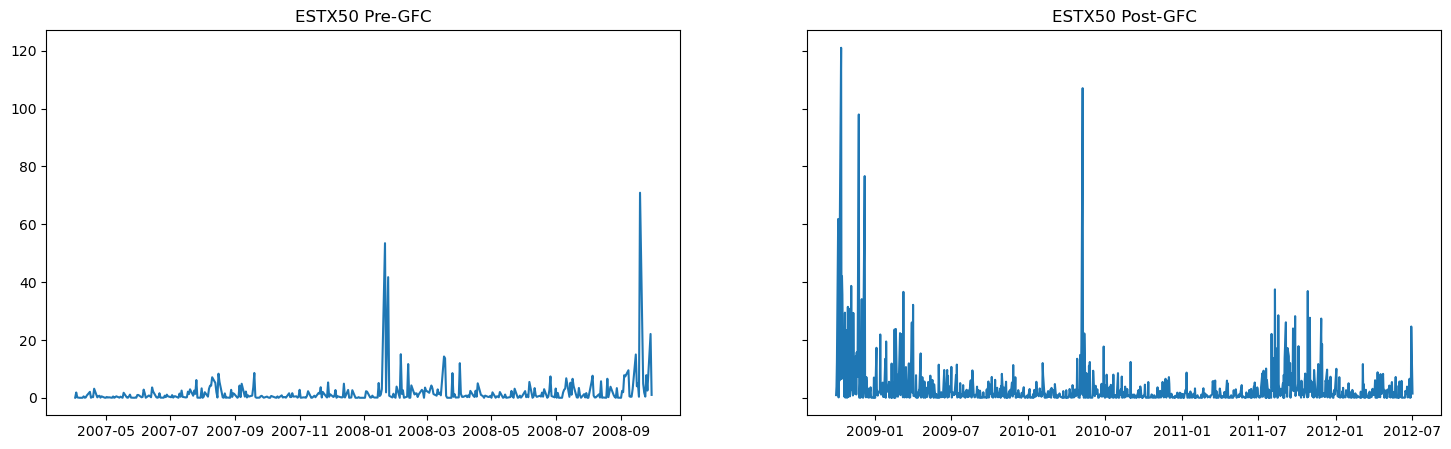

In [157]:
for i in range(len(equity_returns_preGFC.columns)):
    fig, ax = plt.subplots(1, 2, figsize=(18,5), sharex='col', sharey='row')
    ax= ax.flatten()
    ax[0].plot(equity_returns_preGFC.iloc[:,i]**2,label= equity_returns_preGFC.columns[i])
    ax[0].set_title(equity_returns_preGFC.columns[i]+' Pre-GFC')
    ax[1].plot(equity_returns_postGFC.iloc[:,i]**2,label= equity_returns_postGFC.columns[i])
    ax[1].set_title(equity_returns_postGFC.columns[i]+' Post-GFC')
    
plt.show() 


#### Volatility Clustering - FX

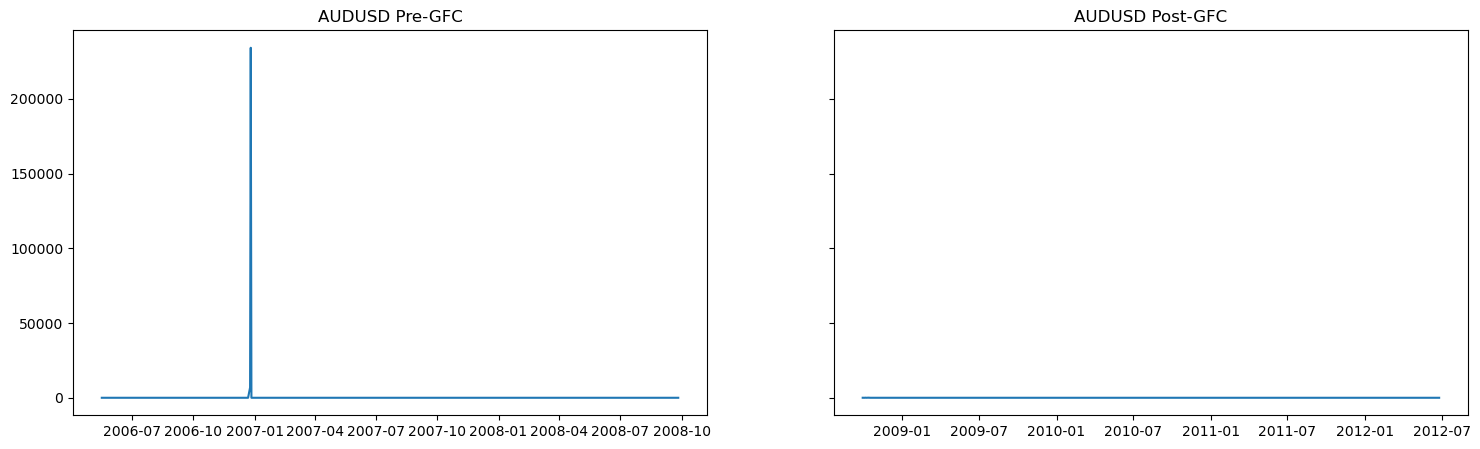

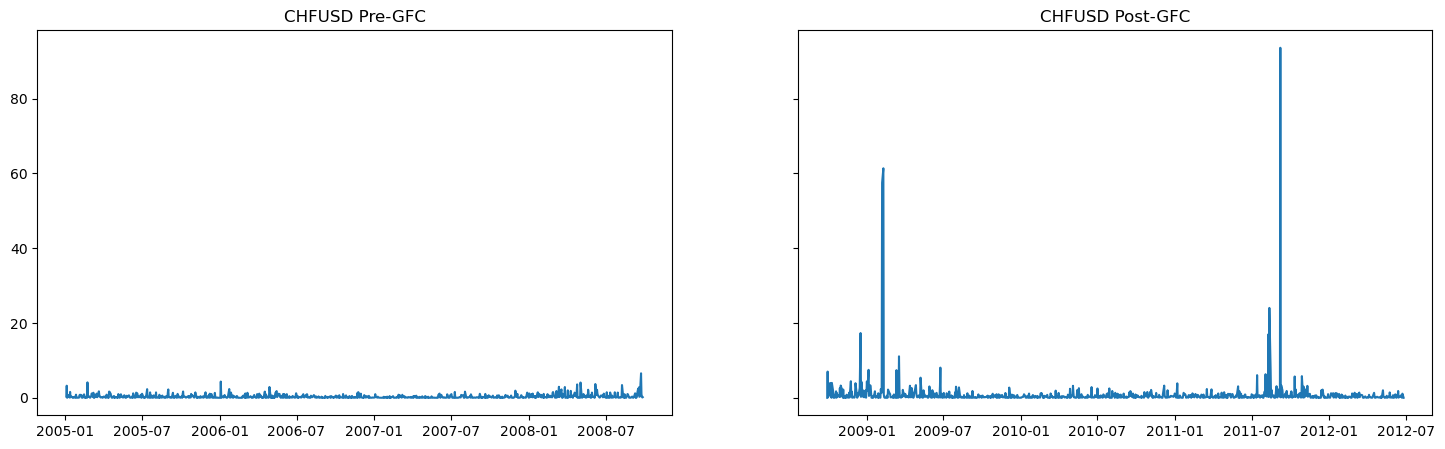

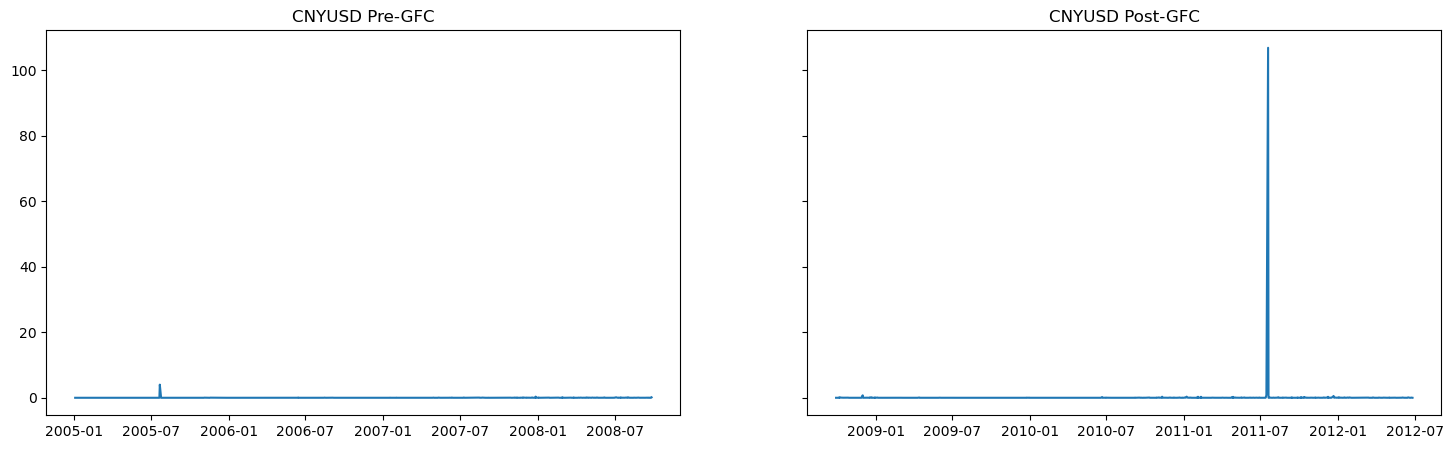

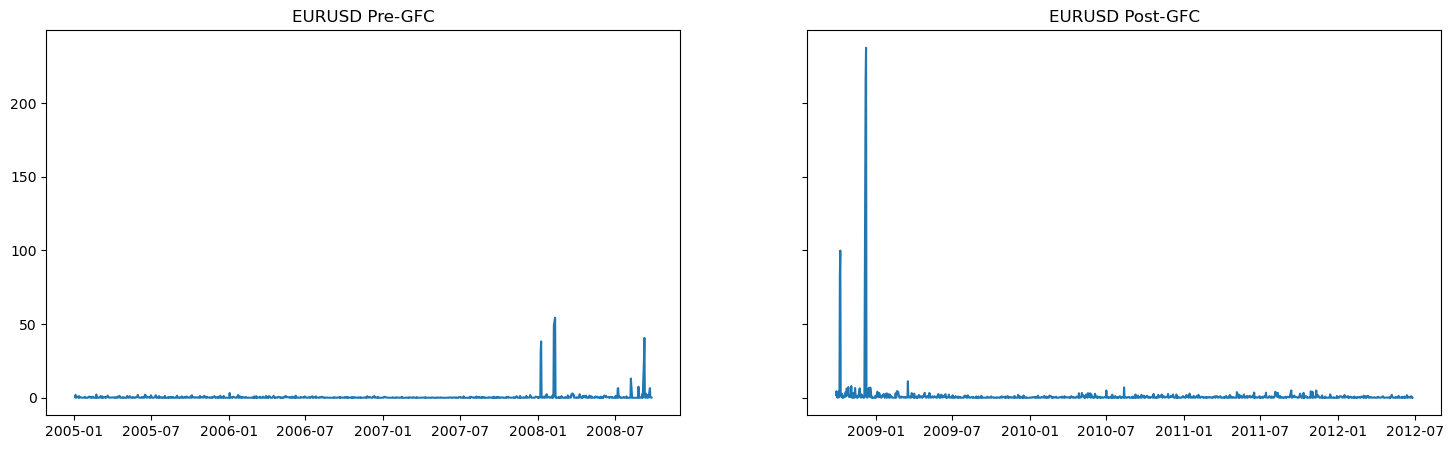

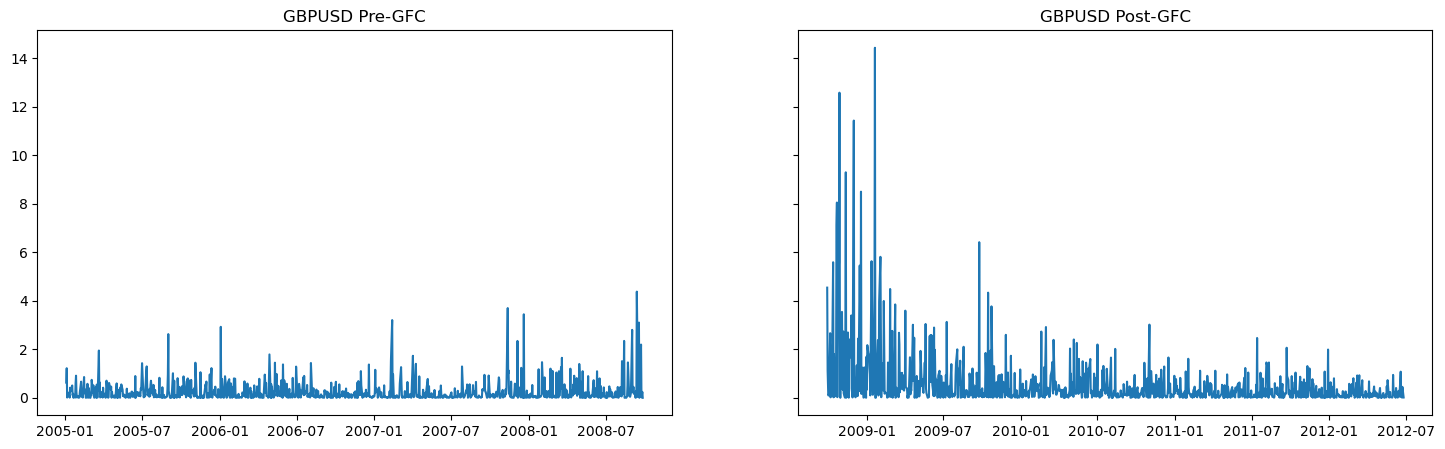

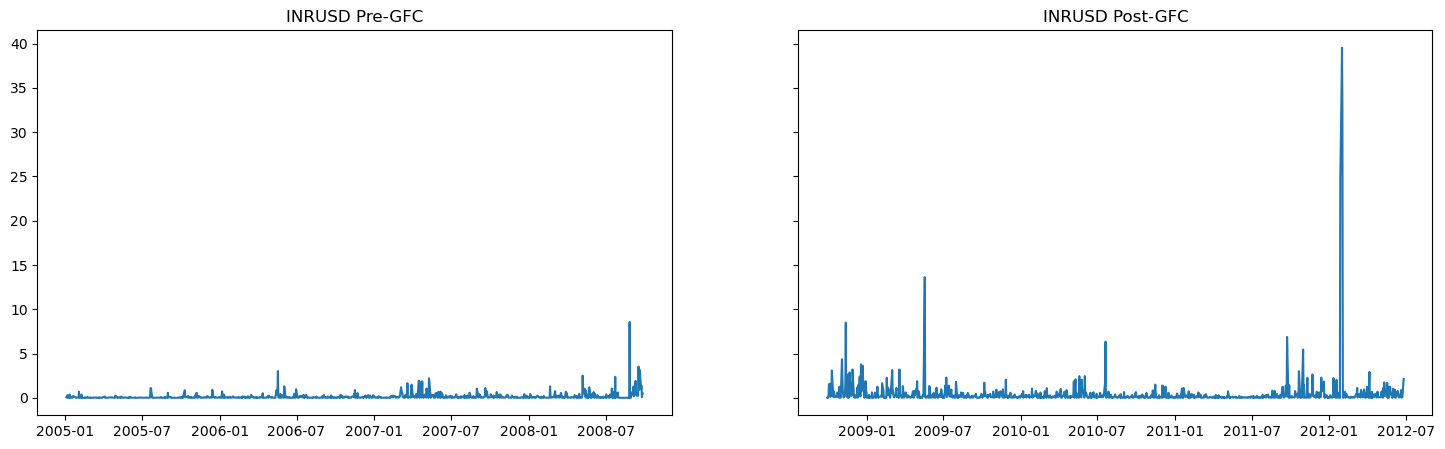

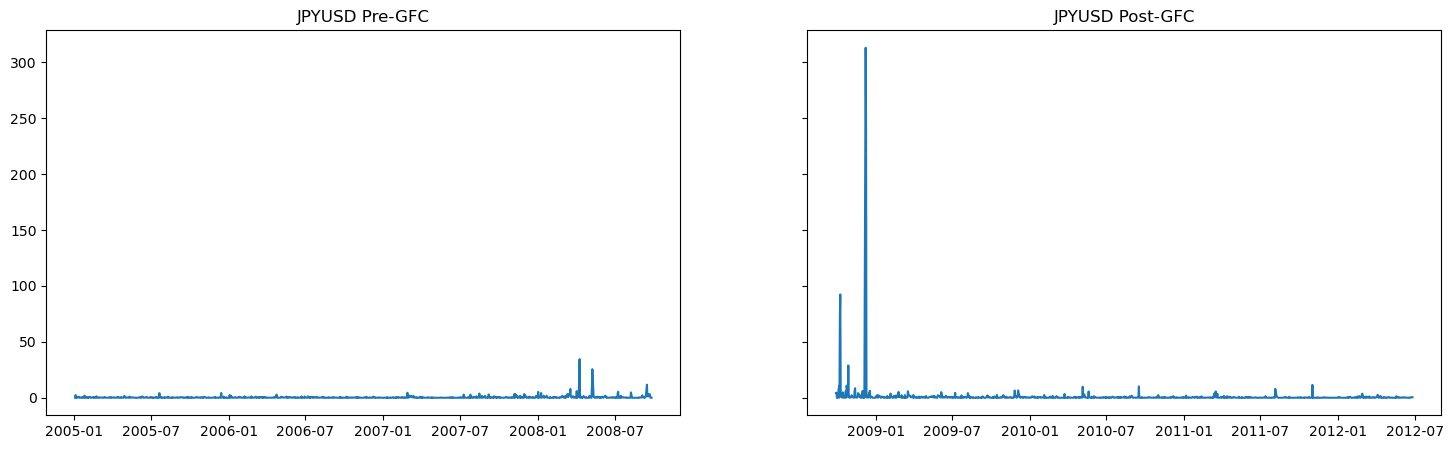

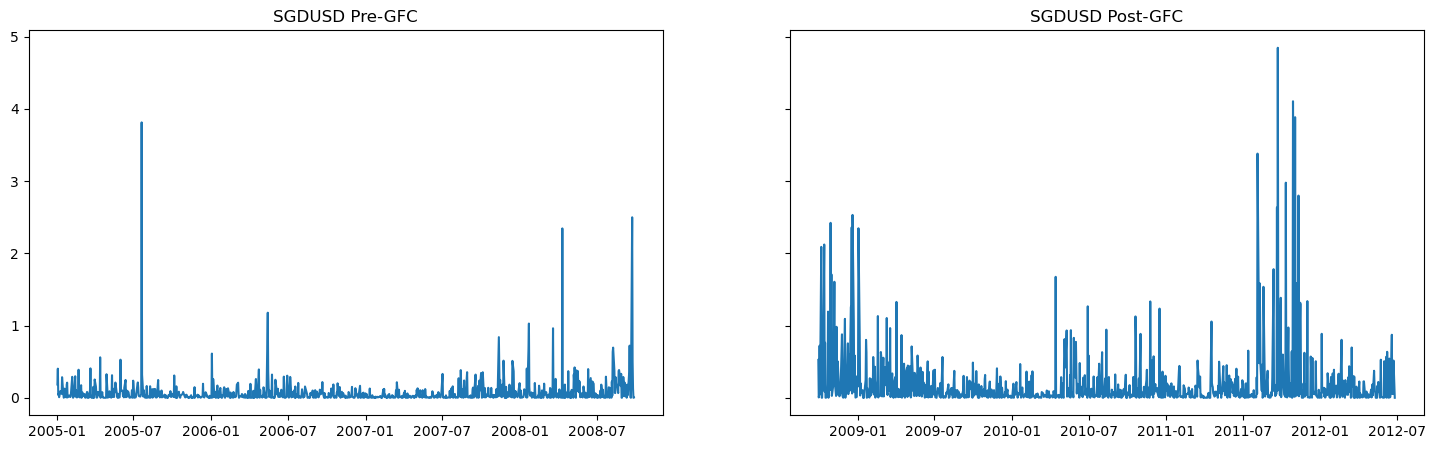

In [156]:
for i in range(len(fx_returns_preGFC.columns)):
    fig, ax = plt.subplots(1, 2, figsize=(18,5), sharex='col', sharey='row')
    ax= ax.flatten()
    ax[0].plot(fx_returns_preGFC.iloc[:,i]**2,label= fx_returns_preGFC.columns[i])
    ax[0].set_title(fx_returns_preGFC.columns[i]+' Pre-GFC')
    ax[1].plot(fx_returns_postGFC.iloc[:,i]**2,label= fx_returns_postGFC.columns[i])
    ax[1].set_title(fx_returns_postGFC.columns[i]+' Post-GFC')
    
plt.show() 


#### Volatility Clustering - Commodities

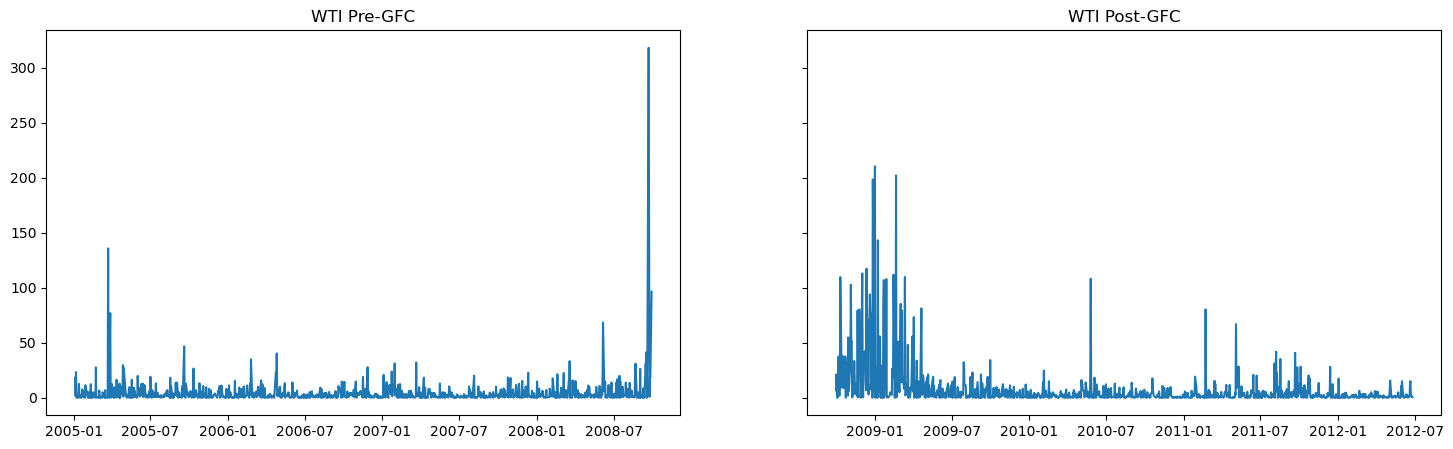

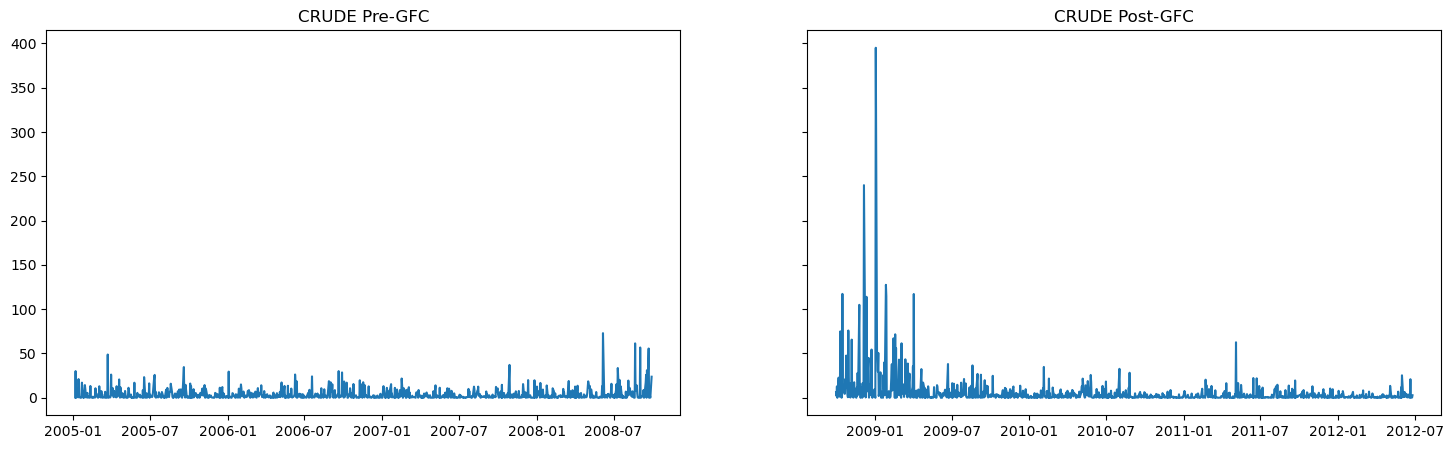

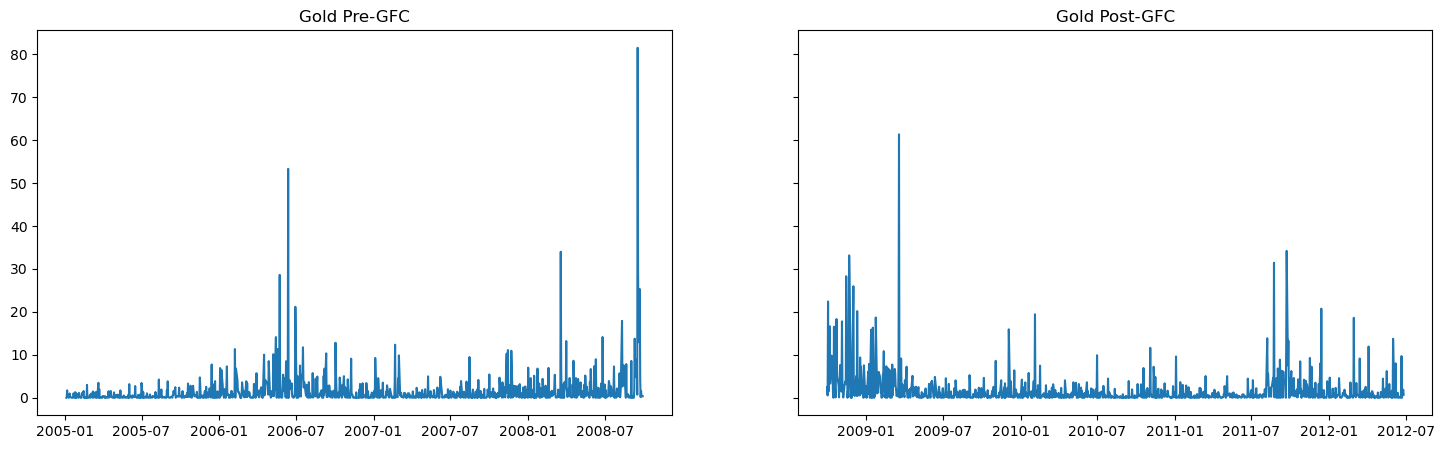

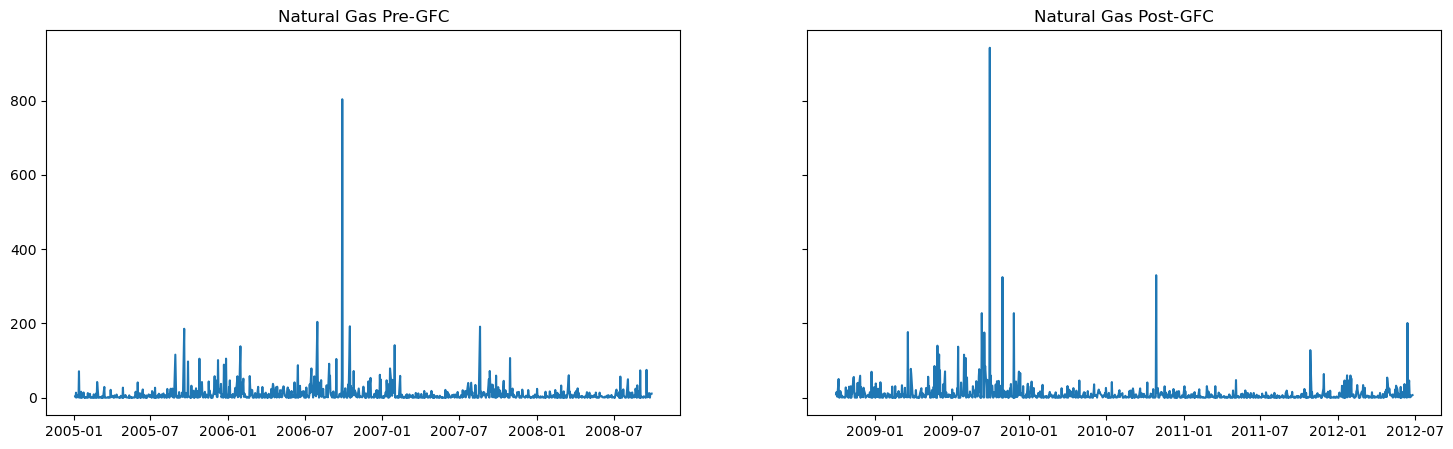

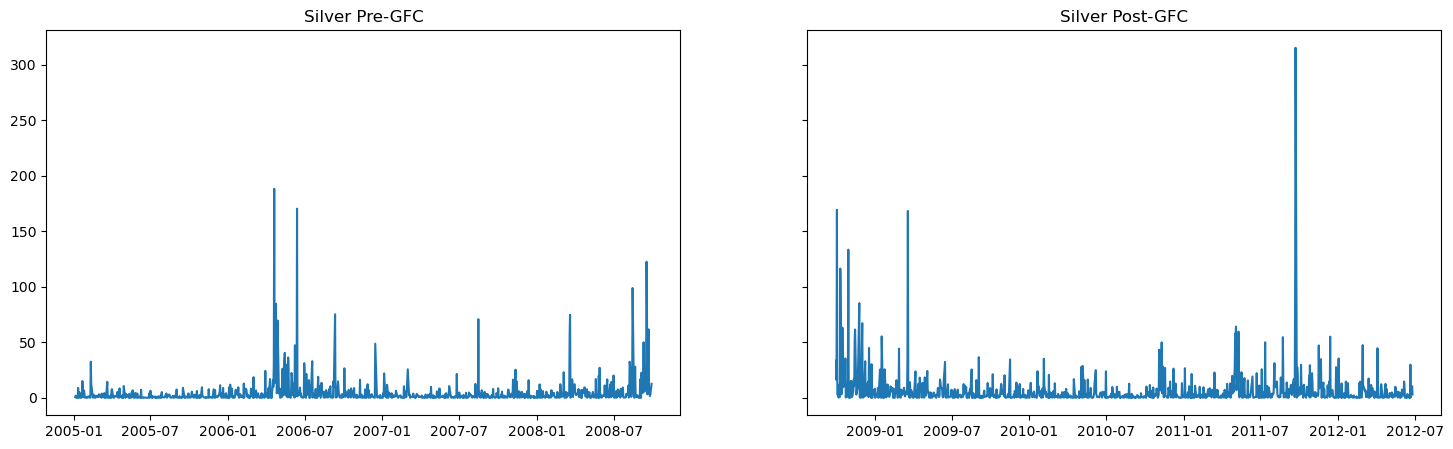

In [158]:
for i in range(len(commodity_returns_preGFC.columns)):
    fig, ax = plt.subplots(1, 2, figsize=(18,5), sharex='col', sharey='row')
    ax= ax.flatten()
    ax[0].plot(commodity_returns_preGFC.iloc[:,i]**2,label= commodity_returns_preGFC.columns[i])
    ax[0].set_title(commodity_returns_preGFC.columns[i]+' Pre-GFC')
    ax[1].plot(commodity_returns_postGFC.iloc[:,i]**2,label= commodity_returns_postGFC.columns[i])
    ax[1].set_title(commodity_returns_postGFC.columns[i]+' Post-GFC')
    
plt.show() 


#### Volatility Clustering - Interest Rates

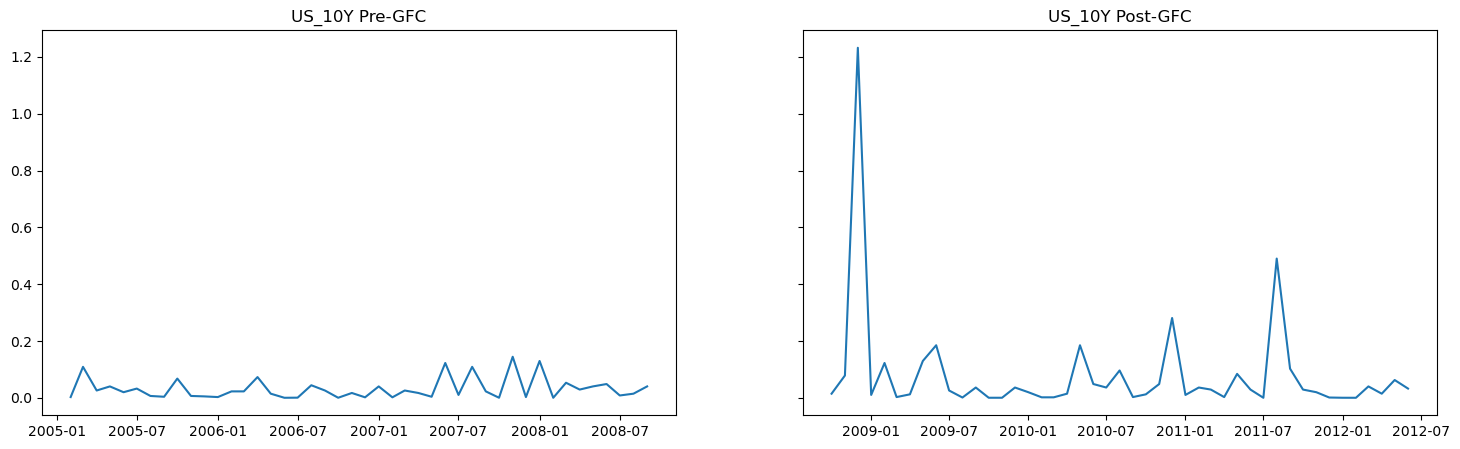

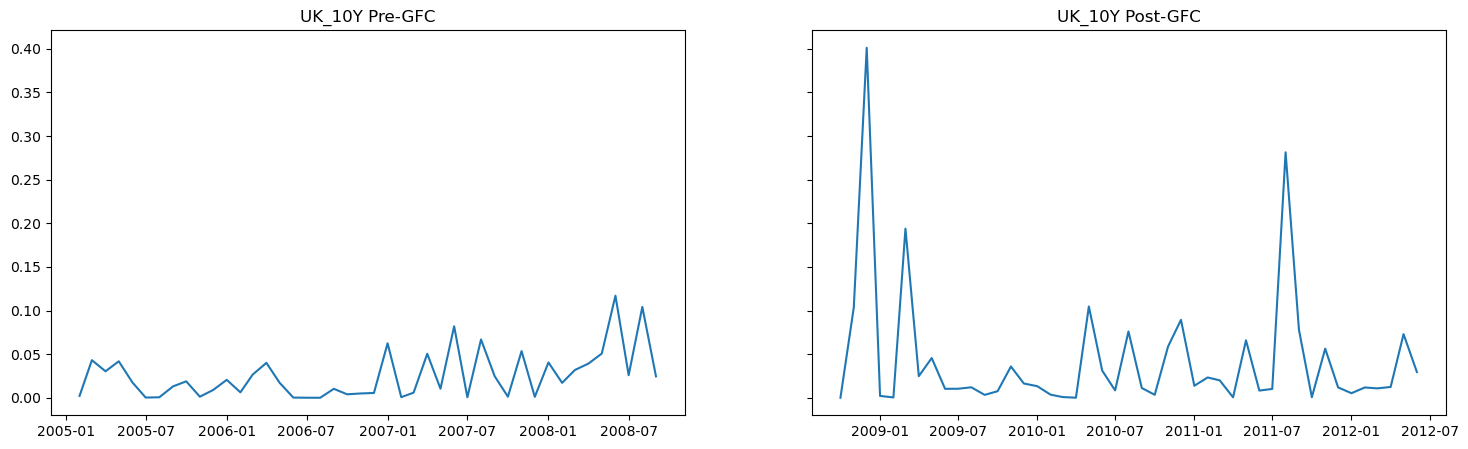

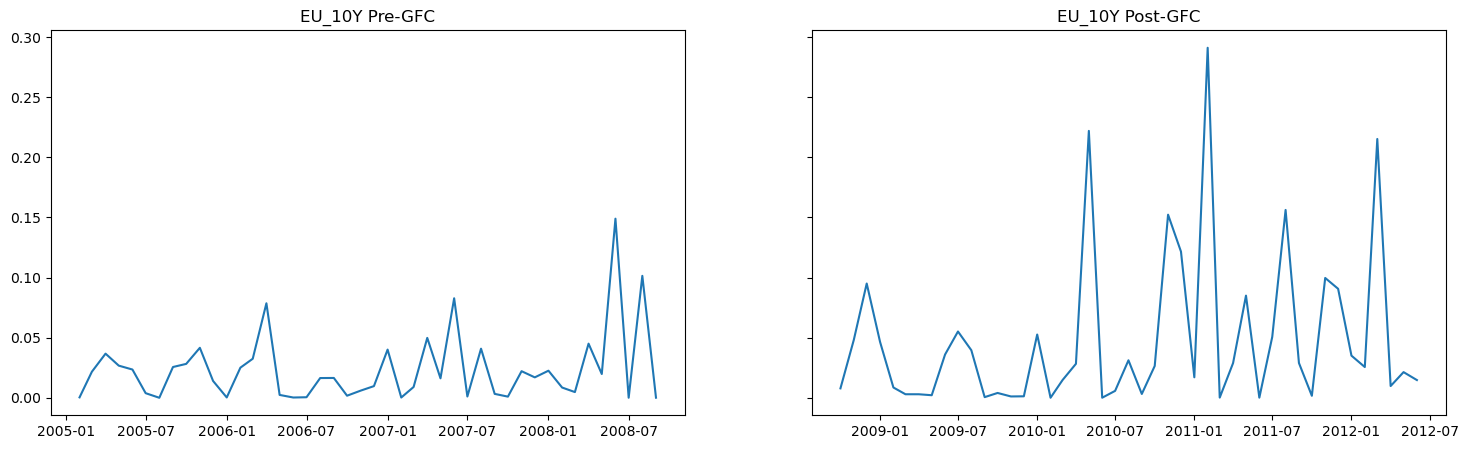

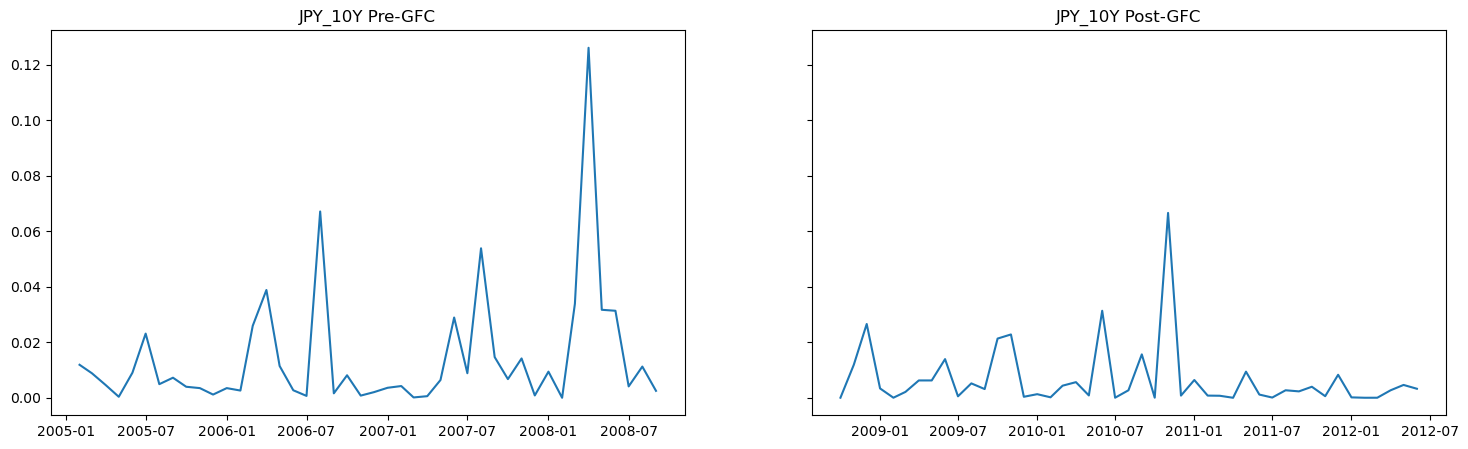

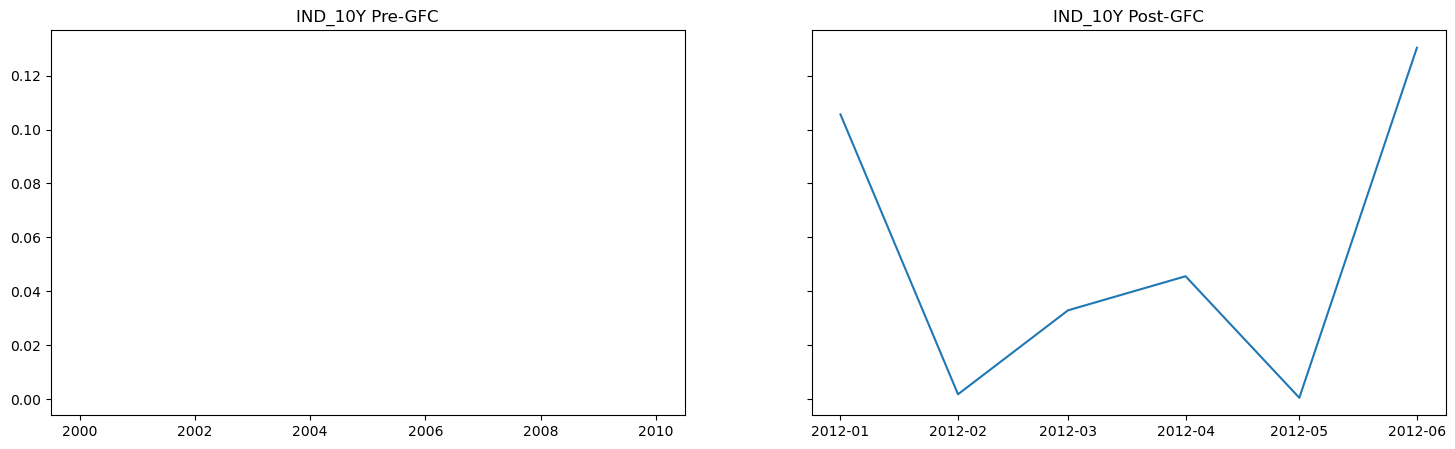

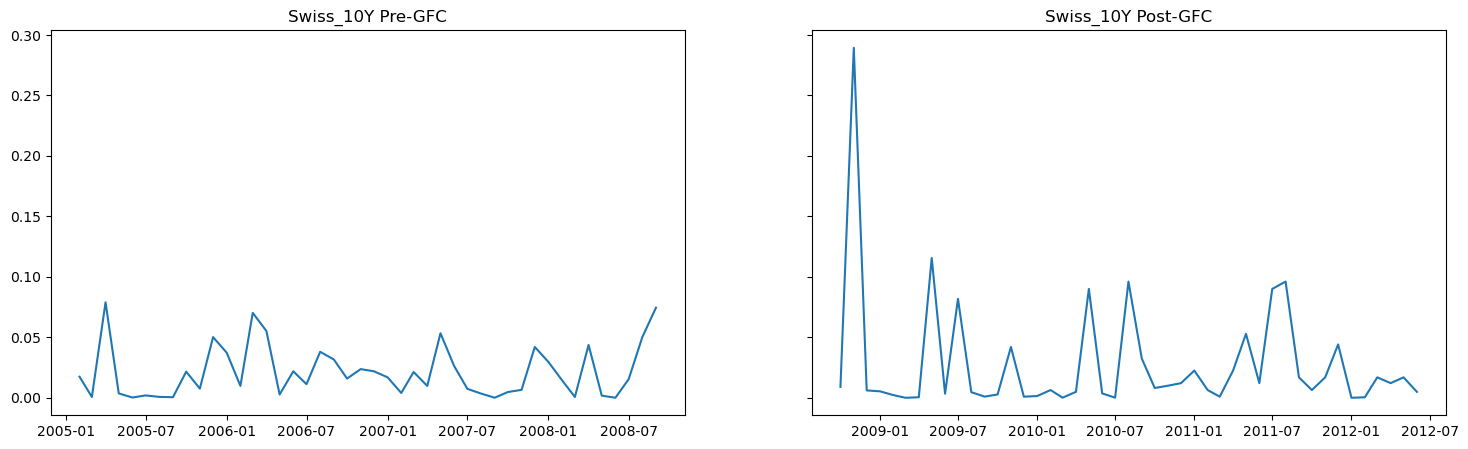

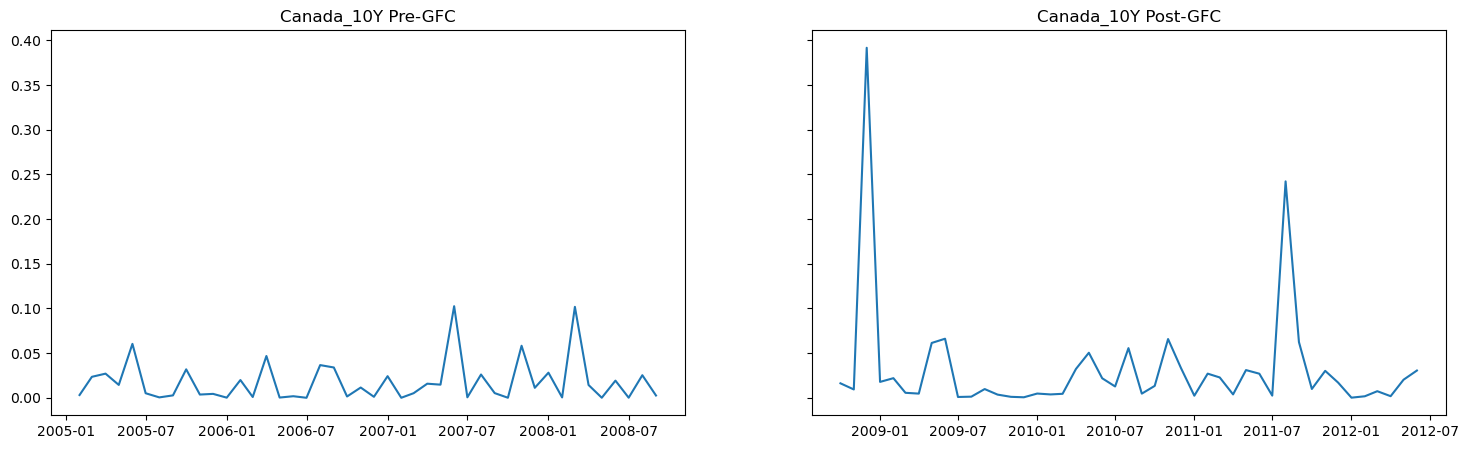

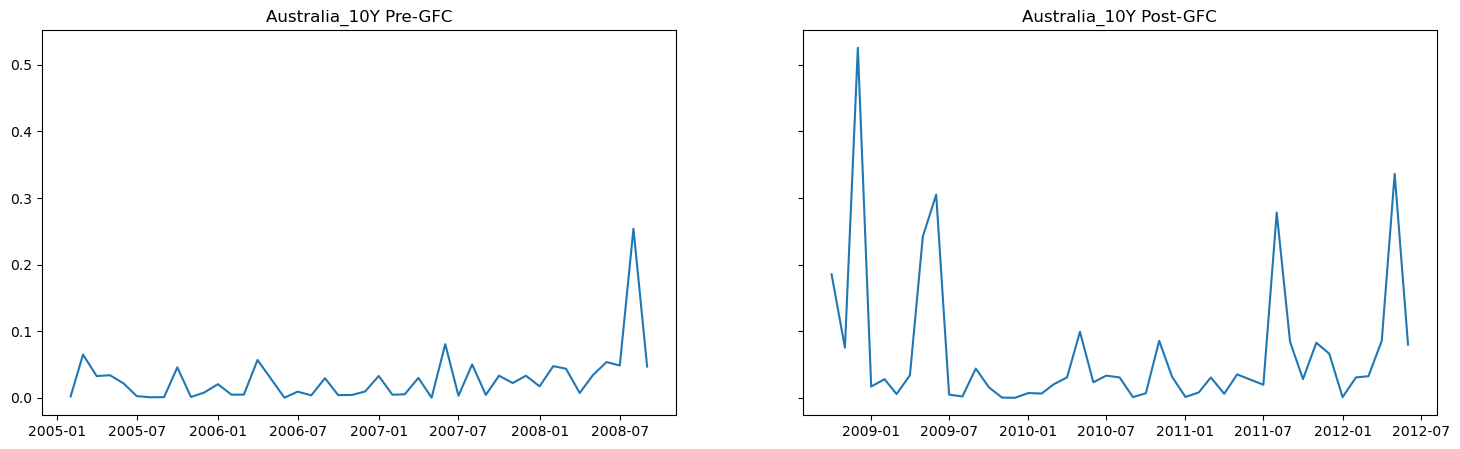

In [159]:
for i in range(len(ir_returns_preGFC.columns)):
    fig, ax = plt.subplots(1, 2, figsize=(18,5), sharex='col', sharey='row')
    ax= ax.flatten()
    ax[0].plot(ir_returns_preGFC.iloc[:,i]**2,label= ir_returns_preGFC.columns[i])
    ax[0].set_title(ir_returns_preGFC.columns[i]+' Pre-GFC')
    ax[1].plot(ir_returns_postGFC.iloc[:,i]**2,label= ir_returns_postGFC.columns[i])
    ax[1].set_title(ir_returns_postGFC.columns[i]+' Post-GFC')
    
plt.show() 


#### Correlation Comparative Analysis - Equities

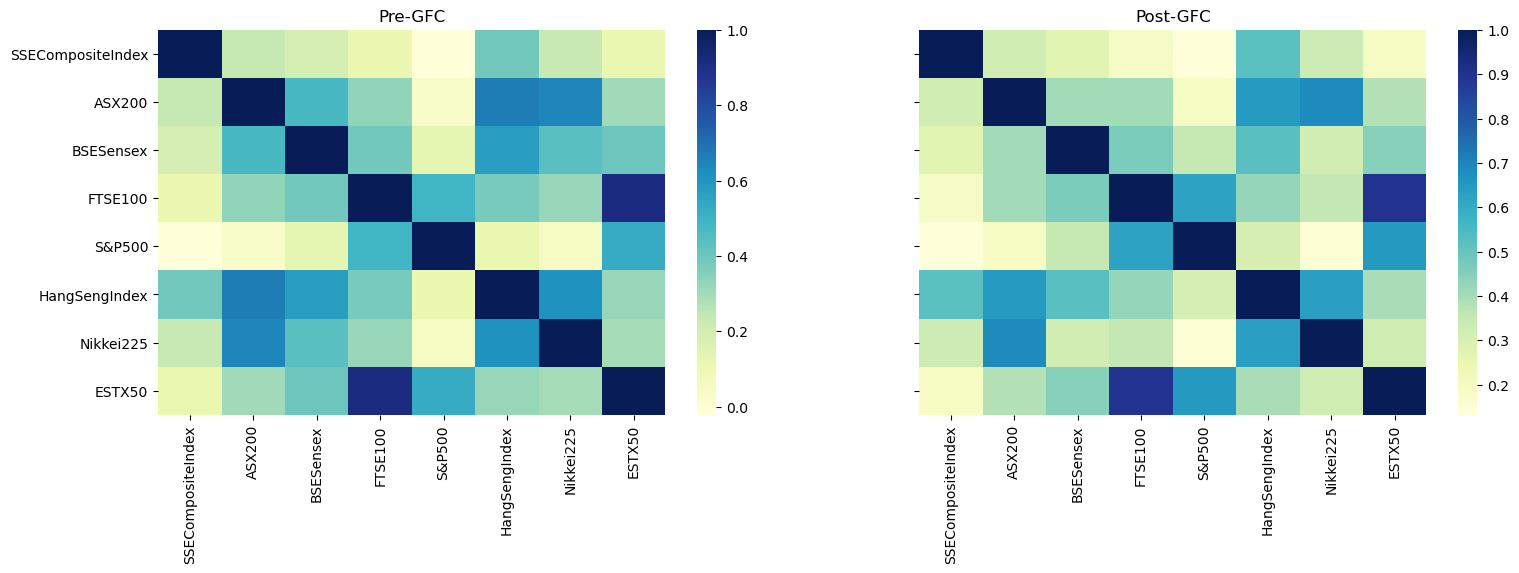

In [161]:
fig, ax = plt.subplots(1, 2, figsize=(18,5), sharex='col', sharey='row')
ax= ax.flatten()
sns.heatmap(equity_returns_preGFC.corr(), cmap="YlGnBu", annot=False, ax = ax[0])
ax[0].set_title('Pre-GFC')
sns.heatmap(equity_returns_postGFC.corr(), cmap="YlGnBu", annot=False, ax = ax[1])
ax[1].set_title('Post-GFC')
plt.show() 


#### Correlation Comparative Analysis - FX

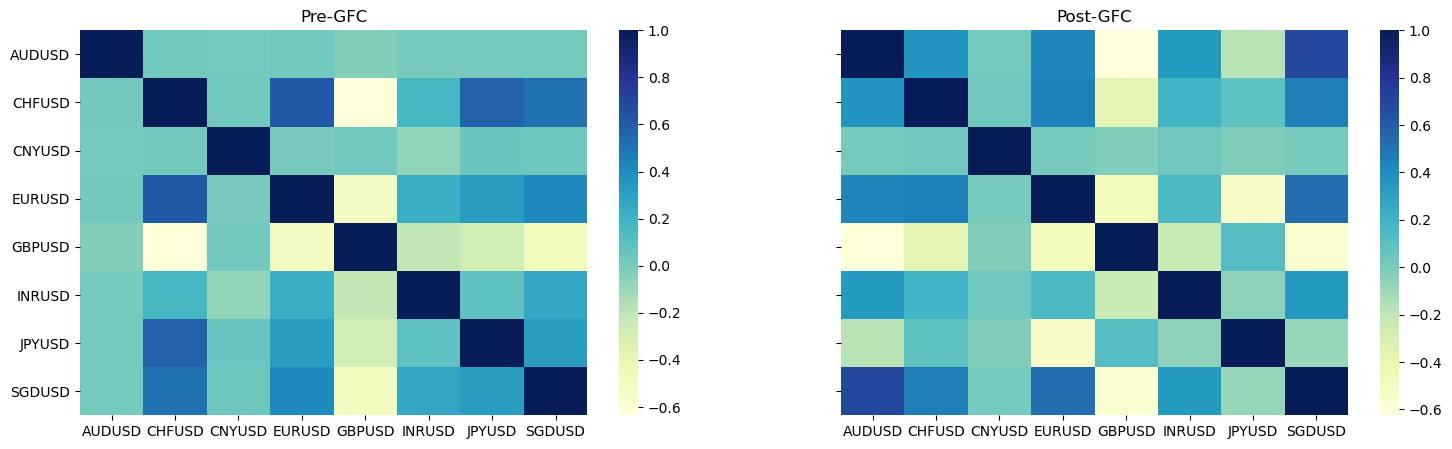

In [162]:
fig, ax = plt.subplots(1, 2, figsize=(18,5), sharex='col', sharey='row')
ax= ax.flatten()
sns.heatmap(fx_returns_preGFC.corr(), cmap="YlGnBu", annot=False, ax = ax[0])
ax[0].set_title('Pre-GFC')
sns.heatmap(fx_returns_postGFC.corr(), cmap="YlGnBu", annot=False, ax = ax[1])
ax[1].set_title('Post-GFC')
plt.show() 


#### Correlation Comparative Analysis - Commodities

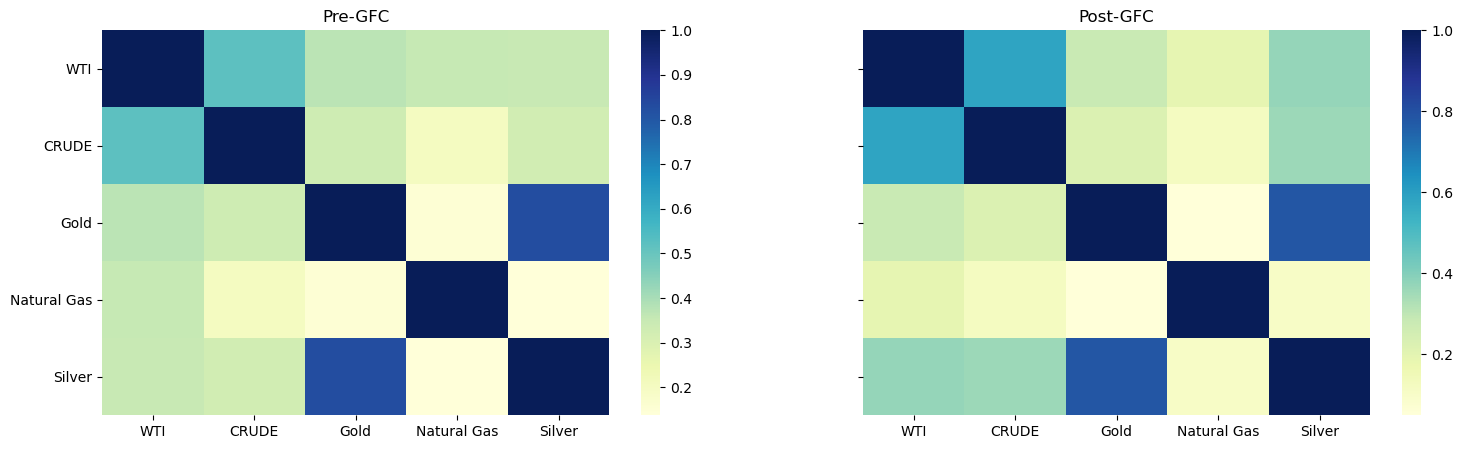

In [163]:
fig, ax = plt.subplots(1, 2, figsize=(18,5), sharex='col', sharey='row')
ax= ax.flatten()
sns.heatmap(commodity_returns_preGFC.corr(), cmap="YlGnBu", annot=False, ax = ax[0])
ax[0].set_title('Pre-GFC')
sns.heatmap(commodity_returns_postGFC.corr(), cmap="YlGnBu", annot=False, ax = ax[1])
ax[1].set_title('Post-GFC')
plt.show() 


#### Correlation Comparative Analysis - Interest Rates

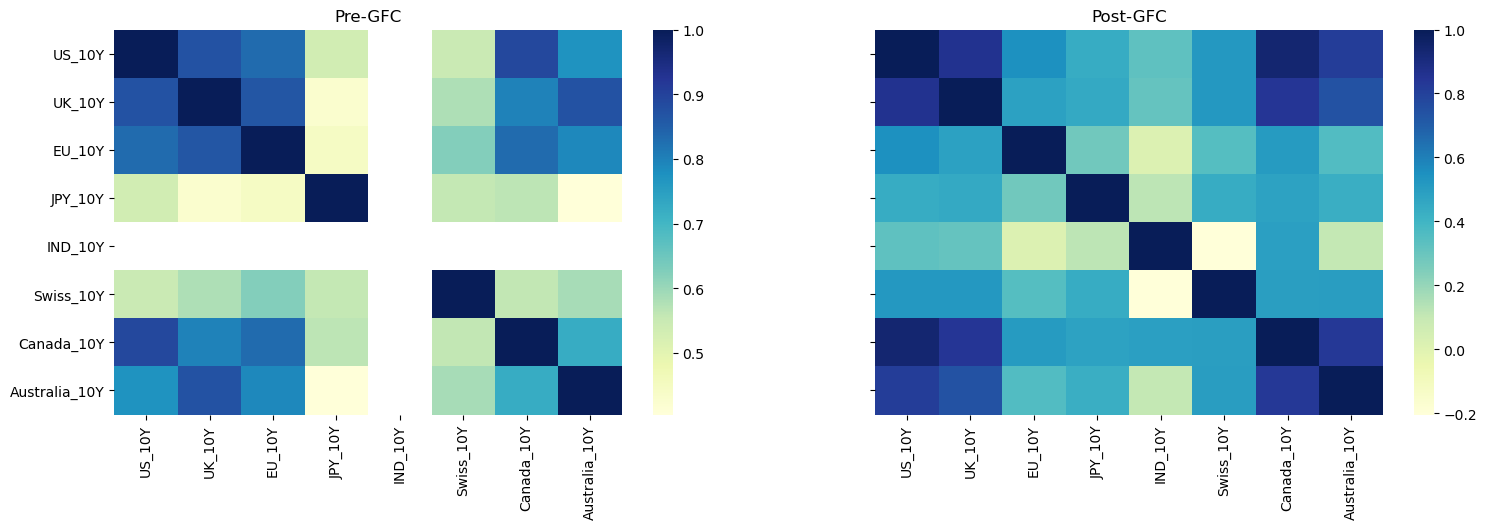

In [164]:
fig, ax = plt.subplots(1, 2, figsize=(18,5), sharex='col', sharey='row')
ax= ax.flatten()
sns.heatmap(ir_returns_preGFC.corr(), cmap="YlGnBu", annot=False, ax = ax[0])
ax[0].set_title('Pre-GFC')
sns.heatmap(ir_returns_postGFC.corr(), cmap="YlGnBu", annot=False, ax = ax[1])
ax[1].set_title('Post-GFC')
plt.show() 


### Covid Crisis

In [170]:
n = len(equity_level["2020-03-31":])
m = len(ir_data["2020-03-31":])

In [174]:
equity_level_preCovid = equity_level.iloc[-2*n:-n]
equity_level_postCovid = equity_level.iloc[-n:]
fx_level_preCovid = fx_level.iloc[-2*n:-n]
fx_level_postCovid = fx_level.iloc[-n:]
commodity_level_preCovid = commodity_level.iloc[-2*n:-n]
commodity_level_postCovid = commodity_level.iloc[-n:]
ir_data_preCovid = ir_data.iloc[-2*m:-m]
ir_data_postCovid = ir_data.iloc[-m:]

In [175]:
equity_returns_preCovid = equity_returns.iloc[-2*n:-n]
equity_returns_postCovid = equity_returns.iloc[-n:]
fx_returns_preCovid = fx_returns.iloc[-2*n:-n]
fx_returns_postCovid = fx_returns.iloc[-n:]
commodity_returns_preCovid = commodity_returns.iloc[-2*n:-n]
commodity_returns_postCovid = commodity_returns.iloc[-n:]
ir_returns_preCovid = ir_returns.iloc[-2*m:-m]
ir_returns_postCovid = ir_returns.iloc[-m:]

### Comprarative Analysis pre and post Covid Crisis

#### Trend Analysis  - Equities

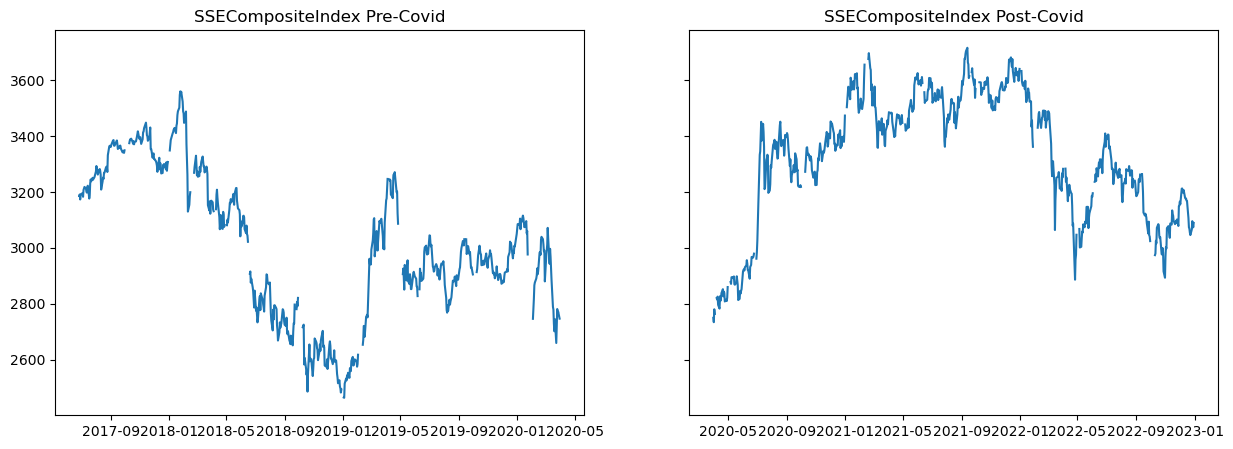

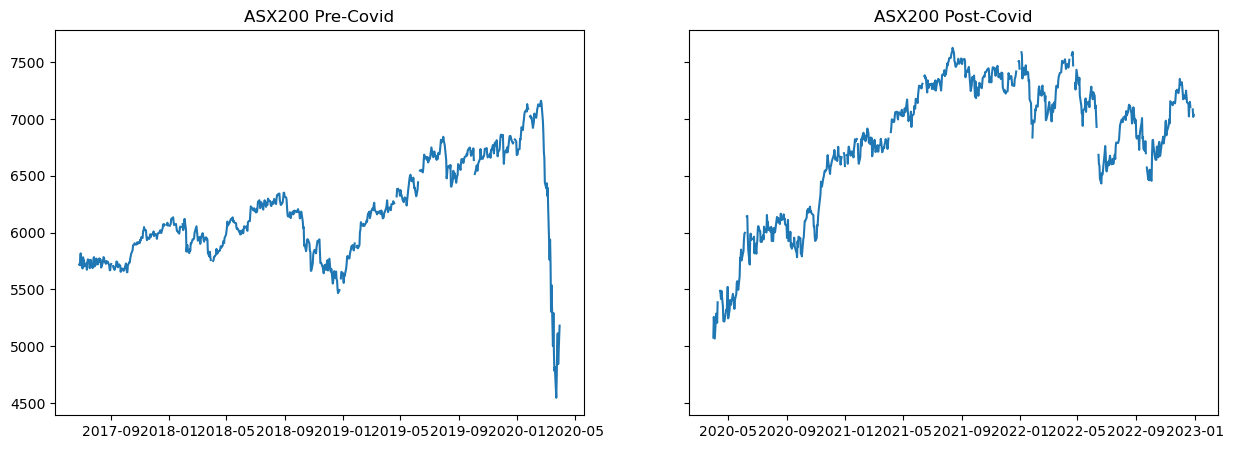

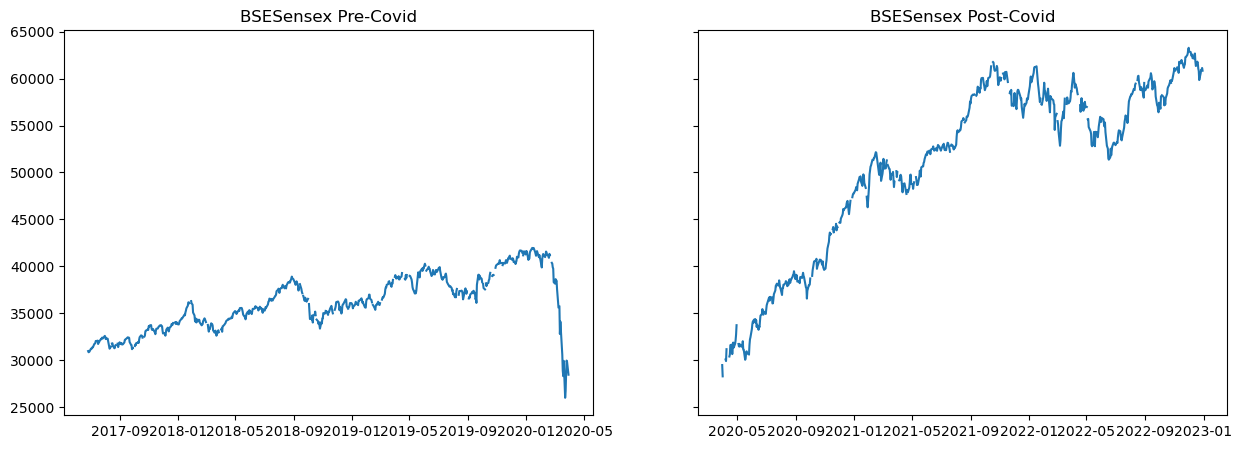

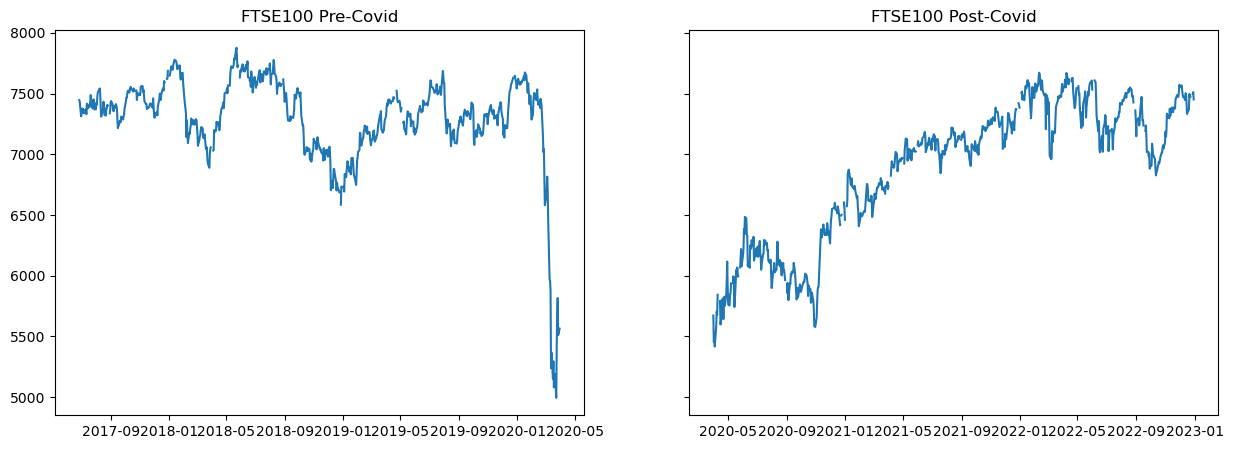

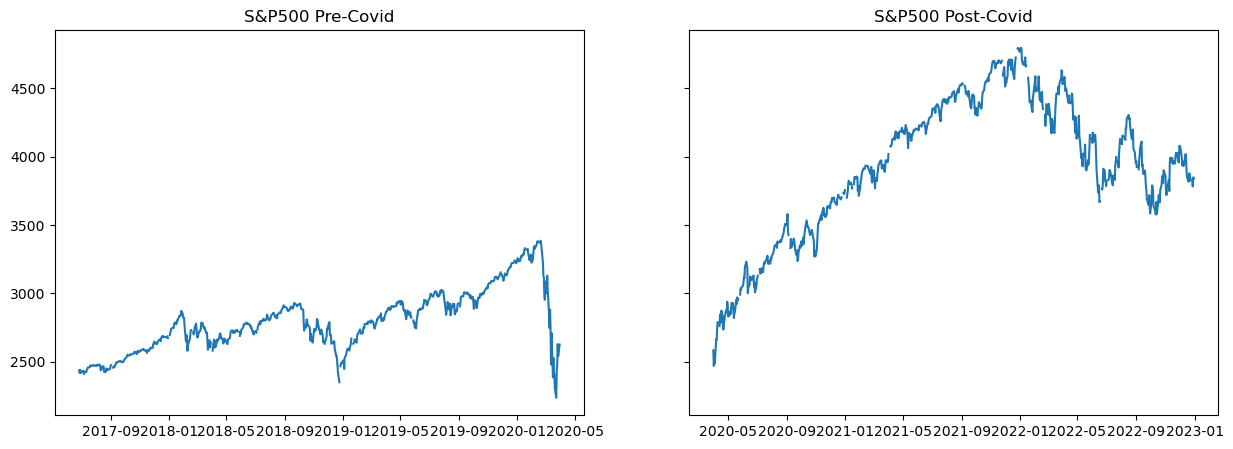

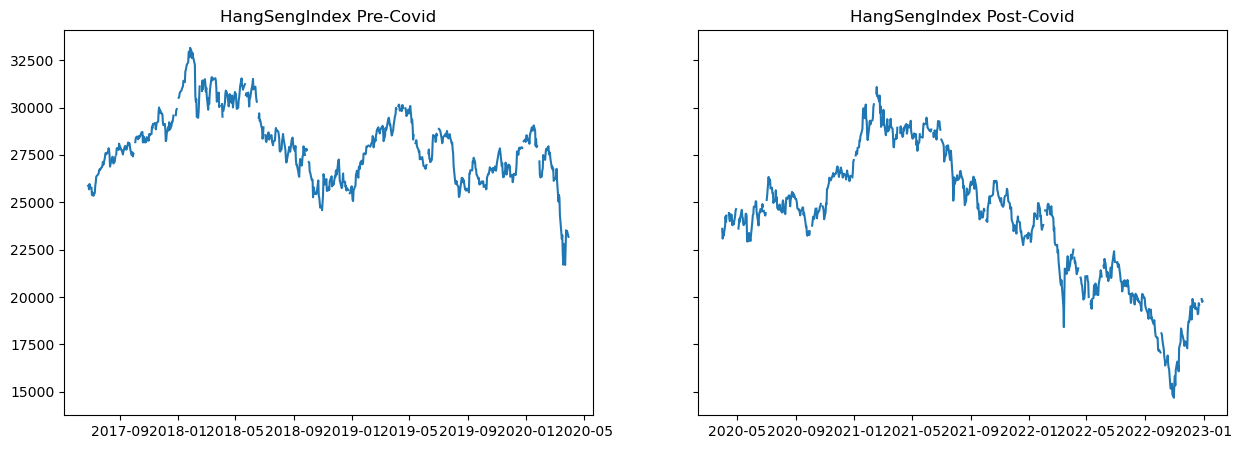

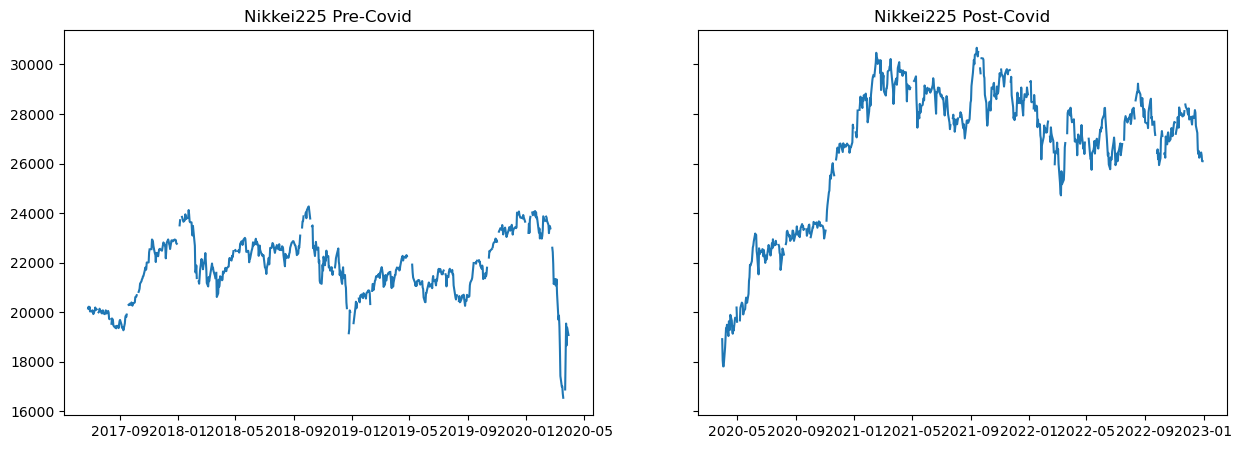

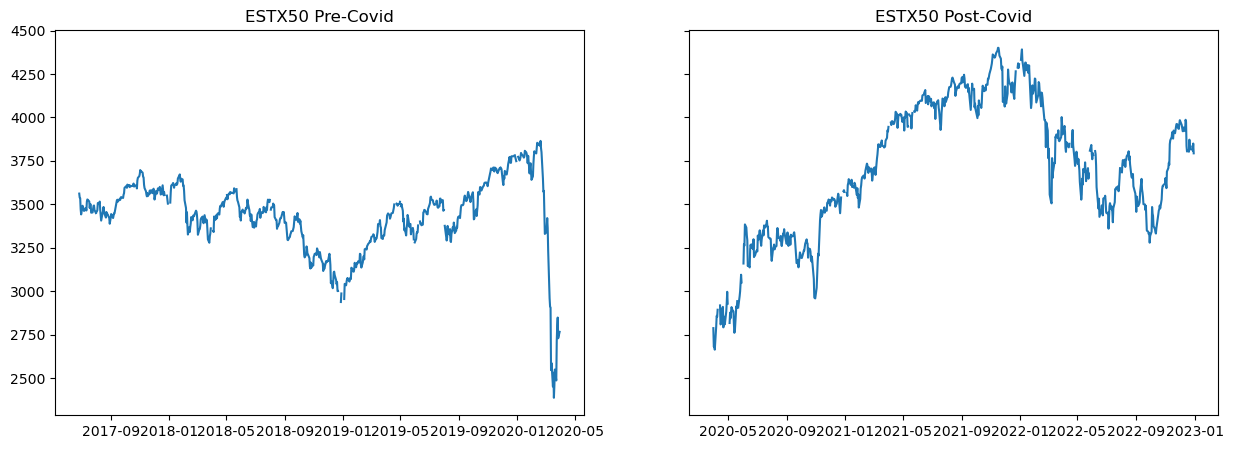

In [176]:
for i in range(len(equity_level_preCovid.columns)):
    fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex='col', sharey='row')
    ax= ax.flatten()
    ax[0].plot(equity_level_preCovid.iloc[:,i],label= equity_level_preCovid.columns[i])
    ax[0].set_title(equity_level_preCovid.columns[i]+' Pre-Covid')
    ax[1].plot(equity_level_postCovid.iloc[:,i],label= equity_level_postCovid.columns[i])
    ax[1].set_title(equity_level_postCovid.columns[i]+' Post-Covid')
    
plt.show() 

#### Trend Analysis - FX

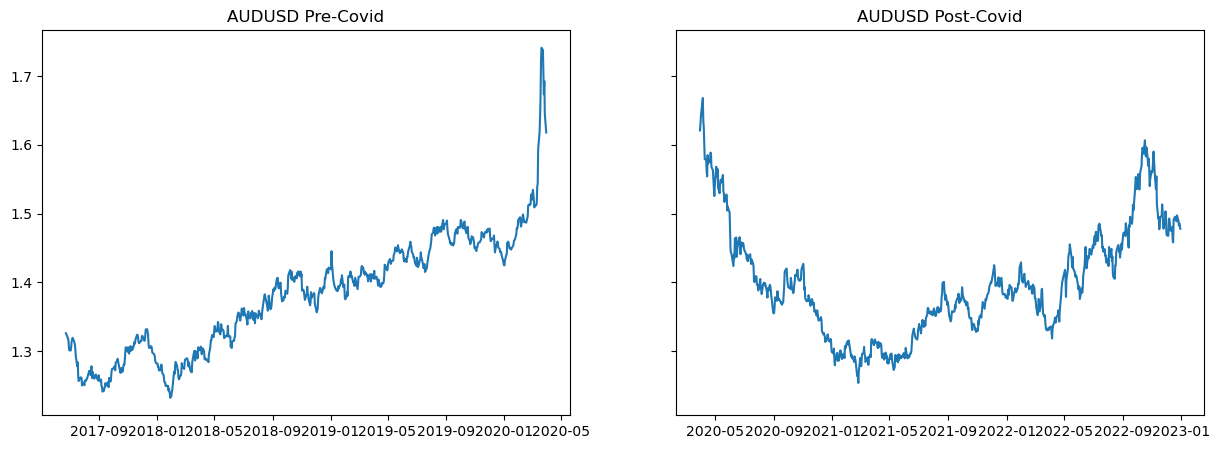

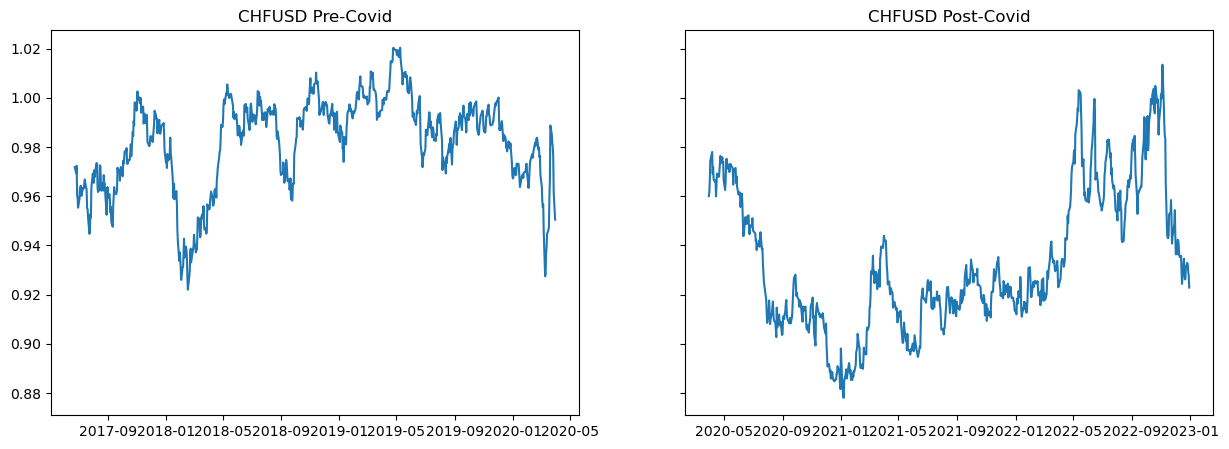

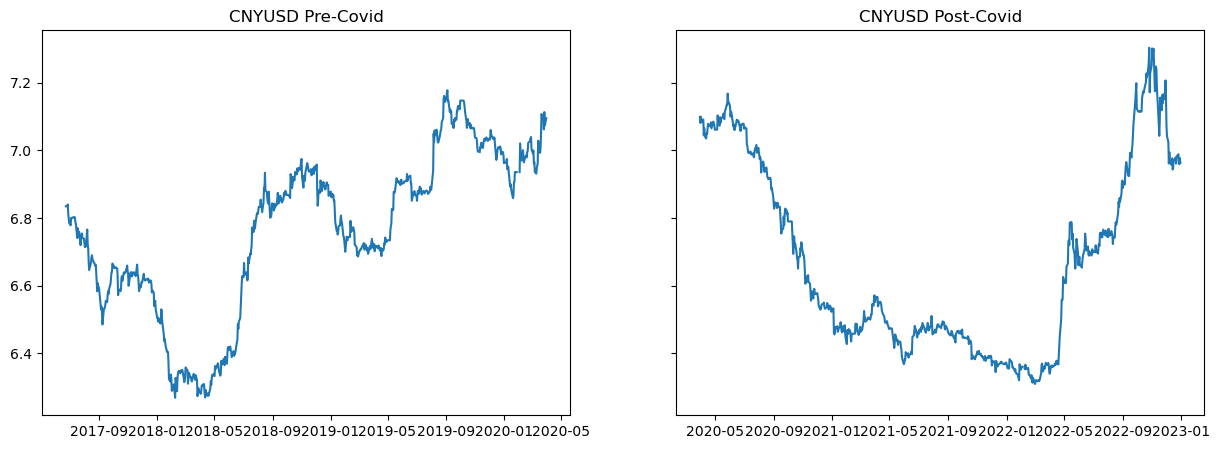

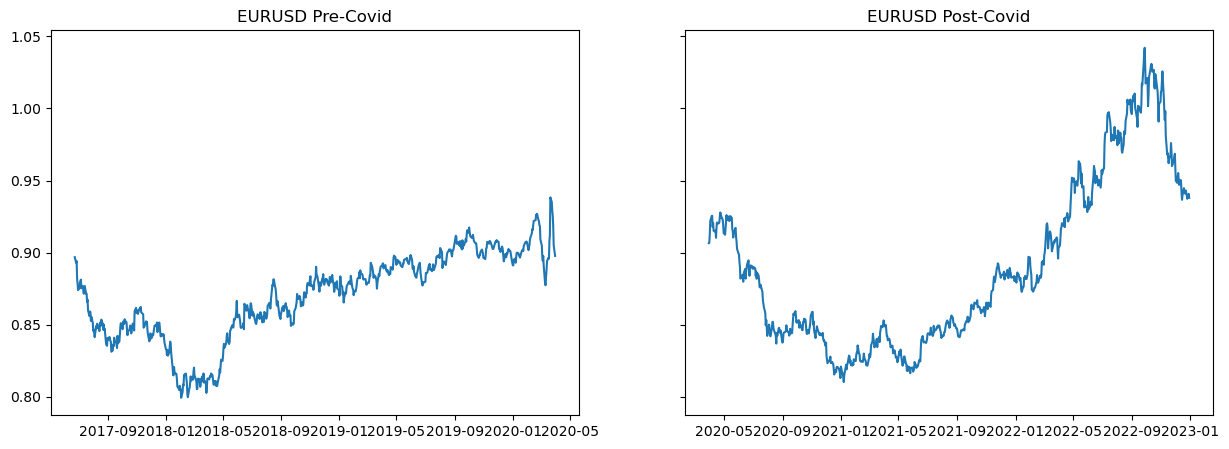

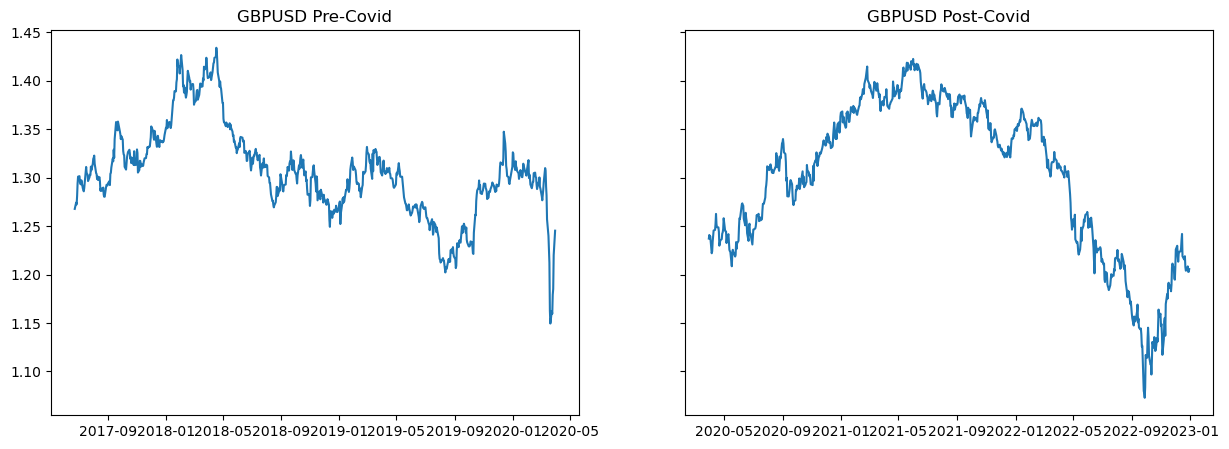

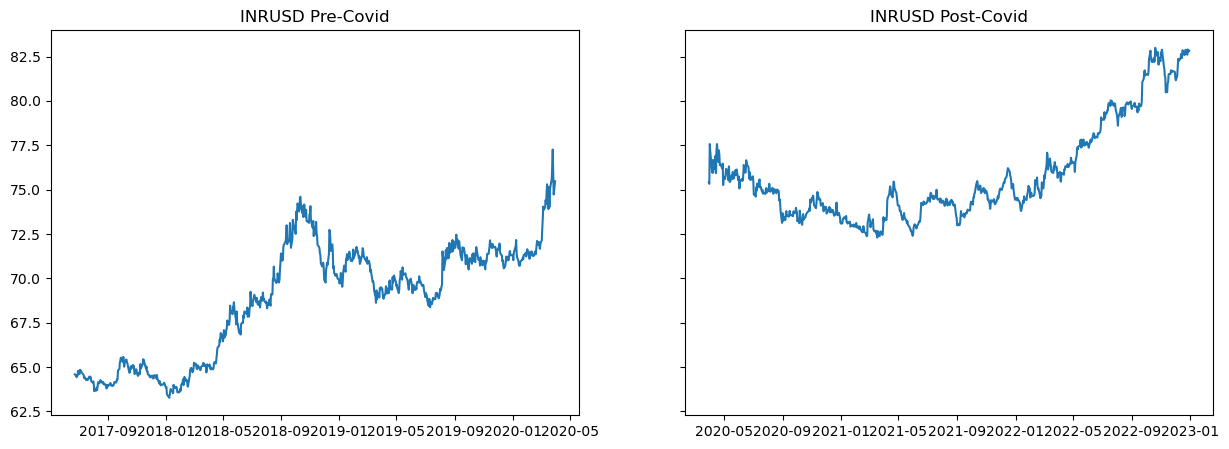

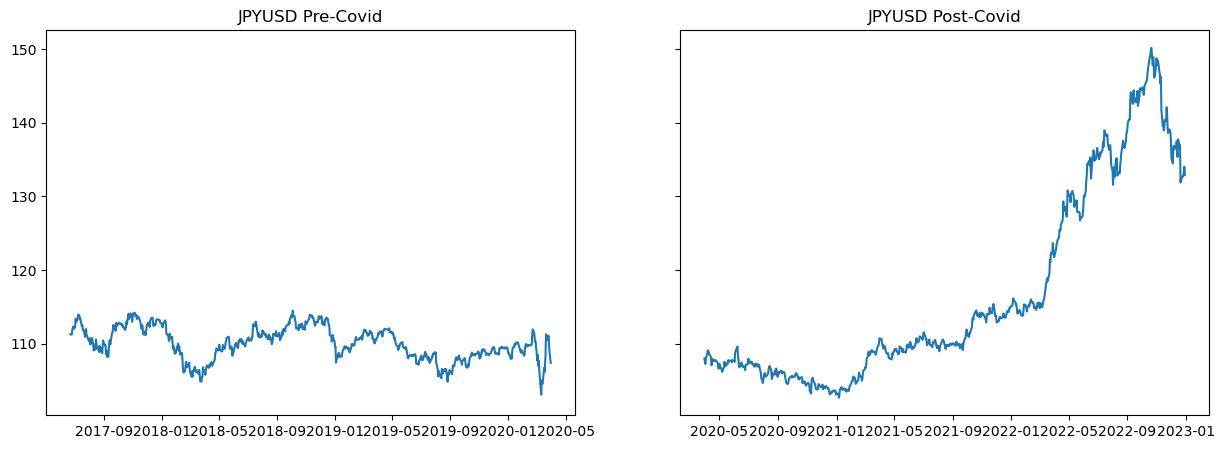

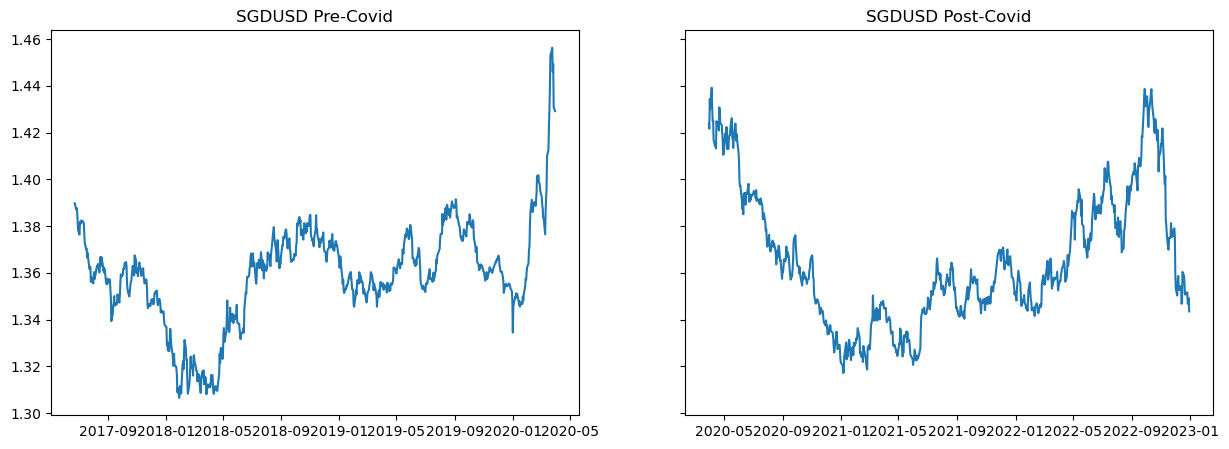

In [177]:
for i in range(len(fx_level_preCovid.columns)):
    fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex='col', sharey='row')
    ax= ax.flatten()
    ax[0].plot(fx_level_preCovid.iloc[:,i],label= fx_level_preCovid.columns[i])
    ax[0].set_title(fx_level_preCovid.columns[i]+' Pre-Covid')
    ax[1].plot(fx_level_postCovid.iloc[:,i],label= fx_level_postCovid.columns[i])
    ax[1].set_title(fx_level_postCovid.columns[i]+' Post-Covid')
    
plt.show() 

#### Trend Analysis - Commodities

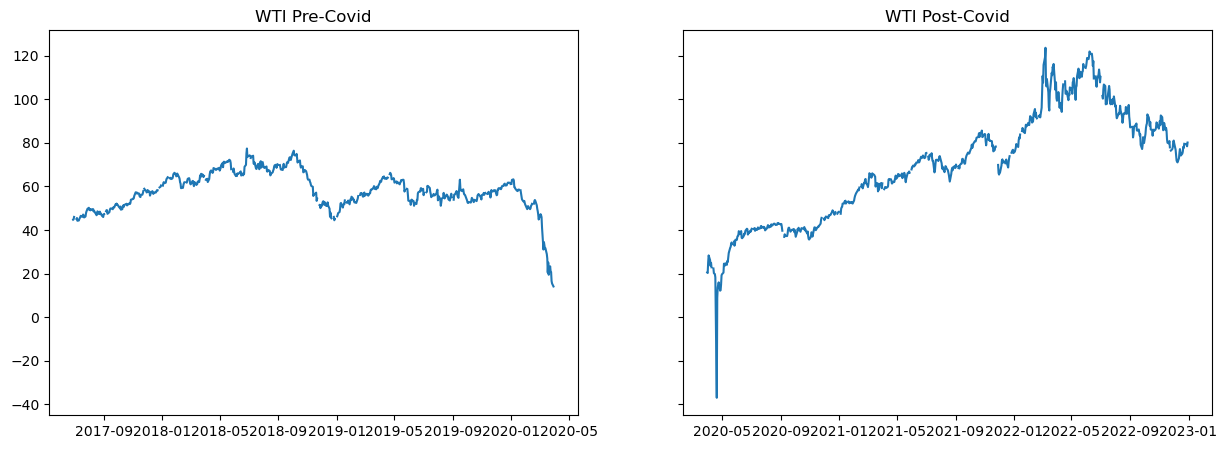

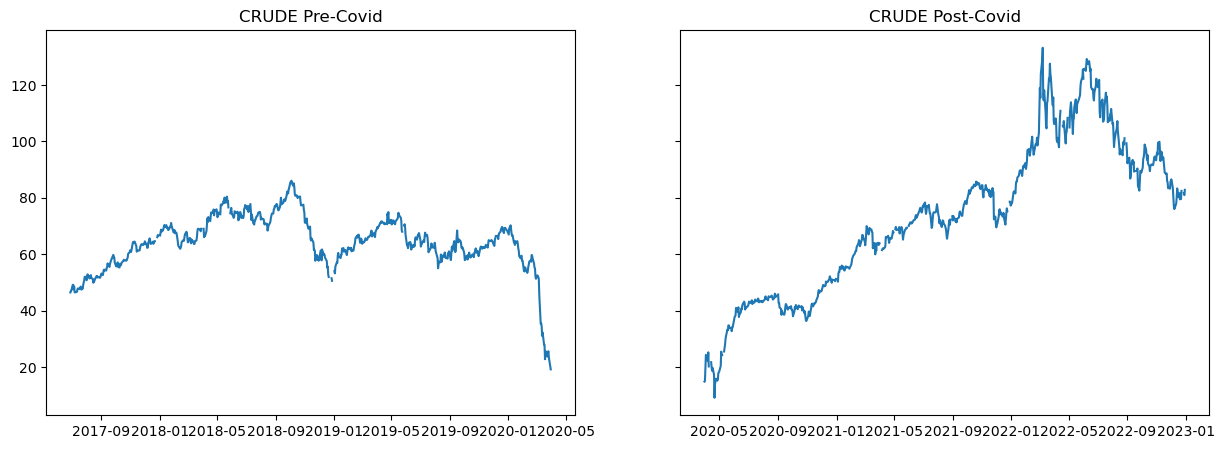

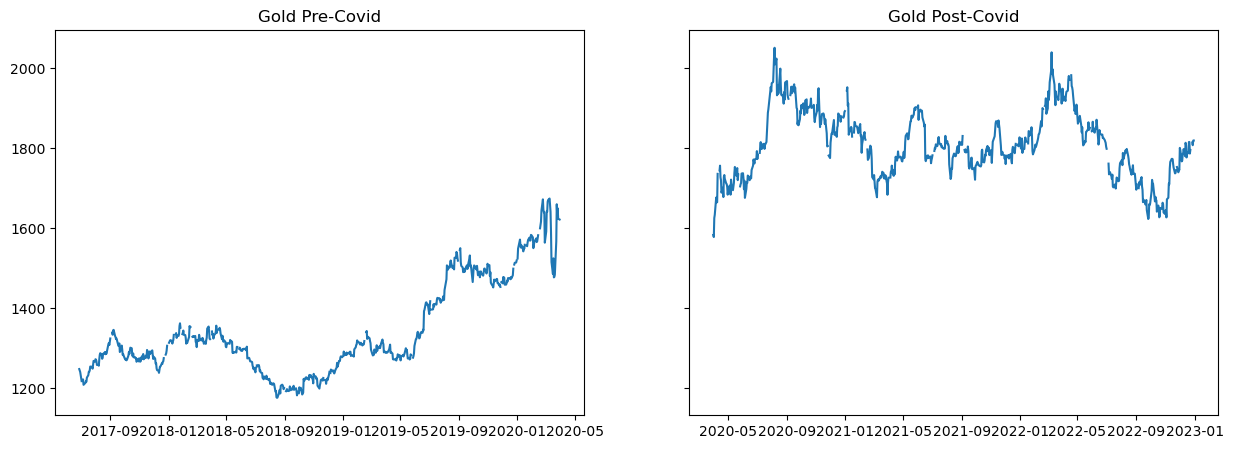

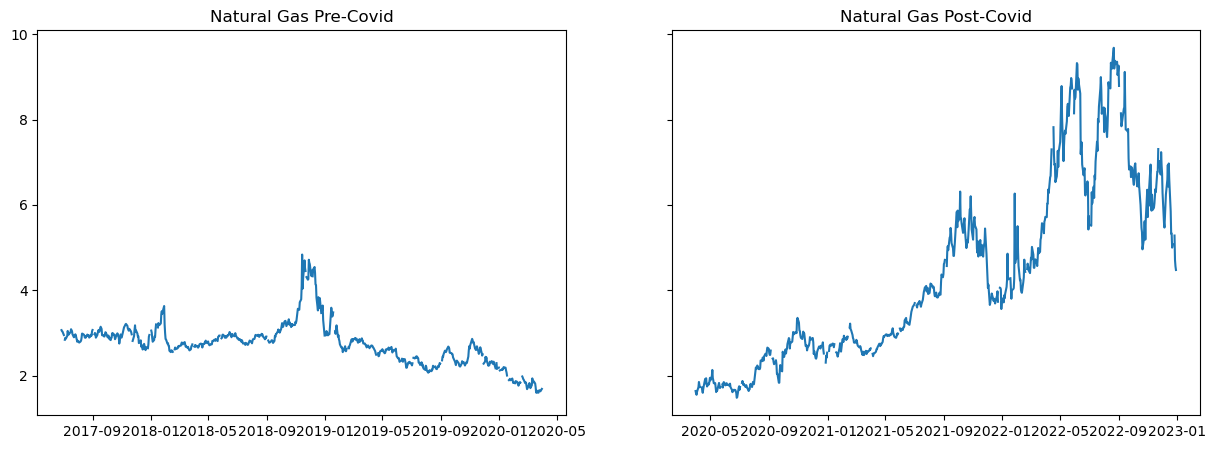

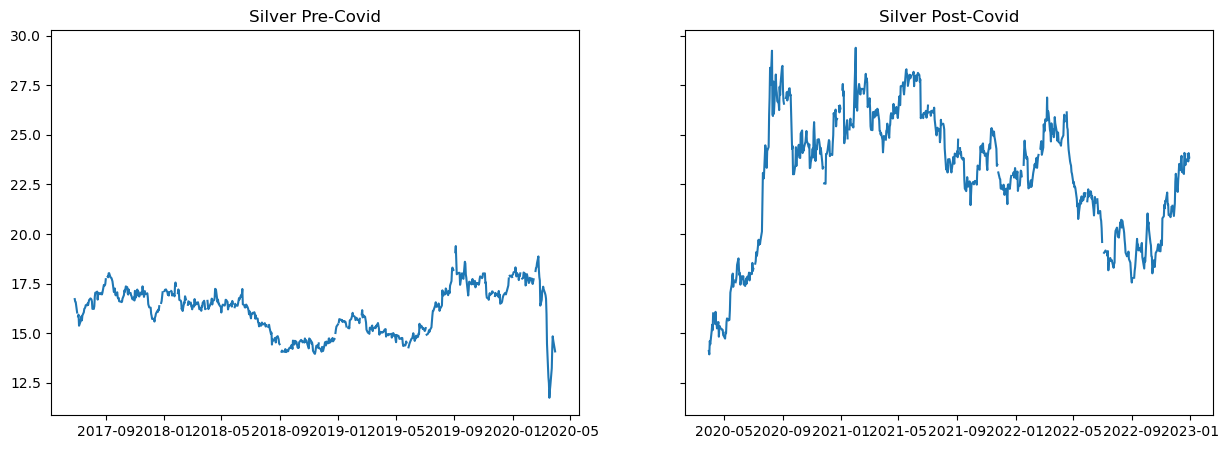

In [178]:
for i in range(len(commodity_level_preCovid.columns)):
    fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex='col', sharey='row')
    ax= ax.flatten()
    ax[0].plot(commodity_level_preCovid.iloc[:,i],label= commodity_level_preCovid.columns[i])
    ax[0].set_title(commodity_level_preCovid.columns[i]+' Pre-Covid')
    ax[1].plot(commodity_level_postCovid.iloc[:,i],label= commodity_level_postCovid.columns[i])
    ax[1].set_title(commodity_level_postCovid.columns[i]+' Post-Covid')
    
plt.show() 

#### Trend Analysis - Interest Rates

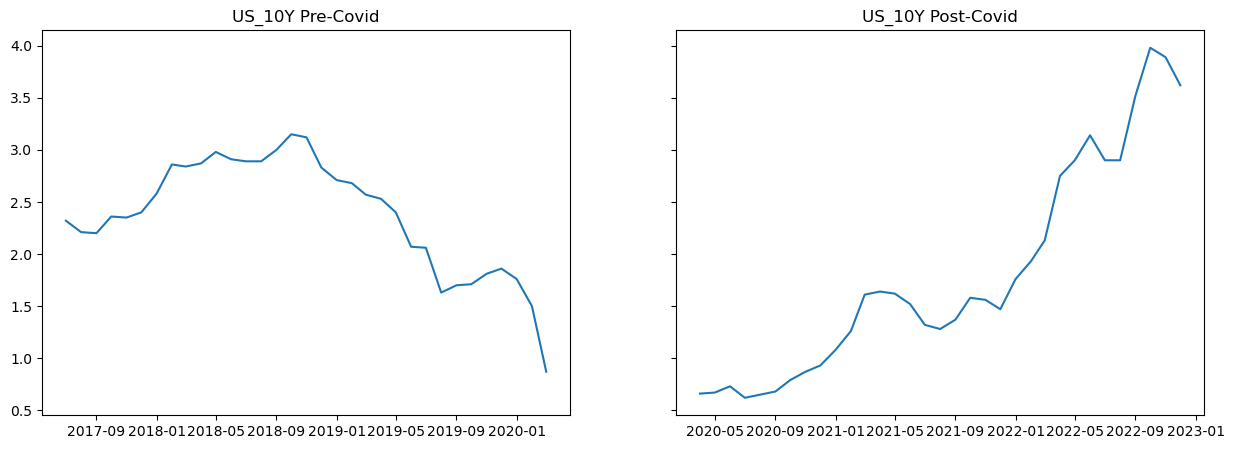

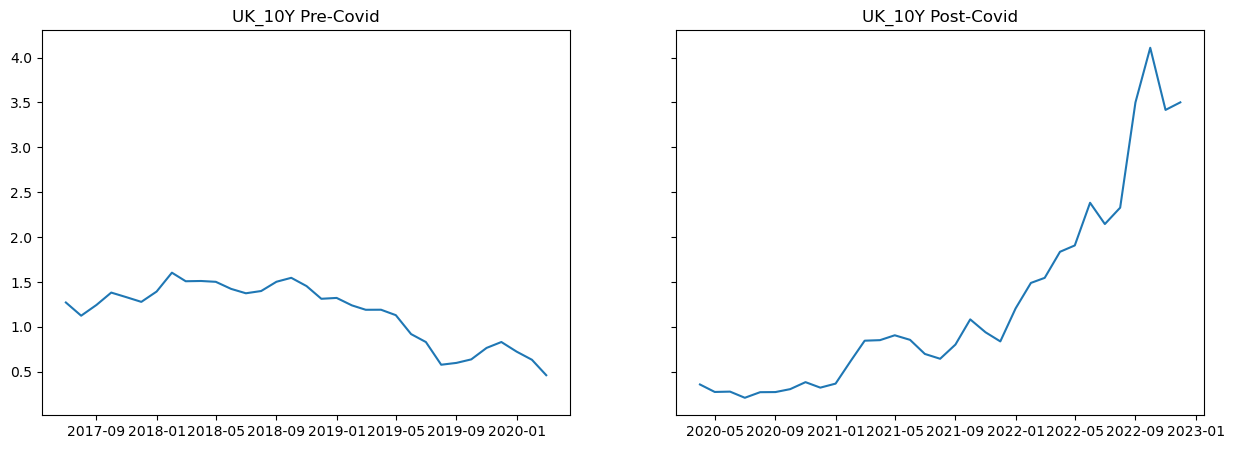

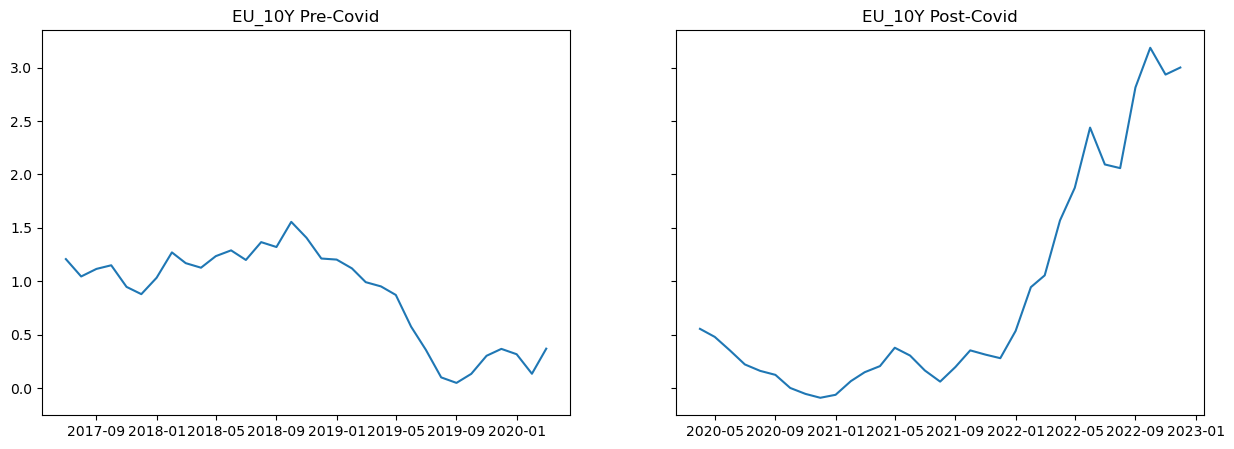

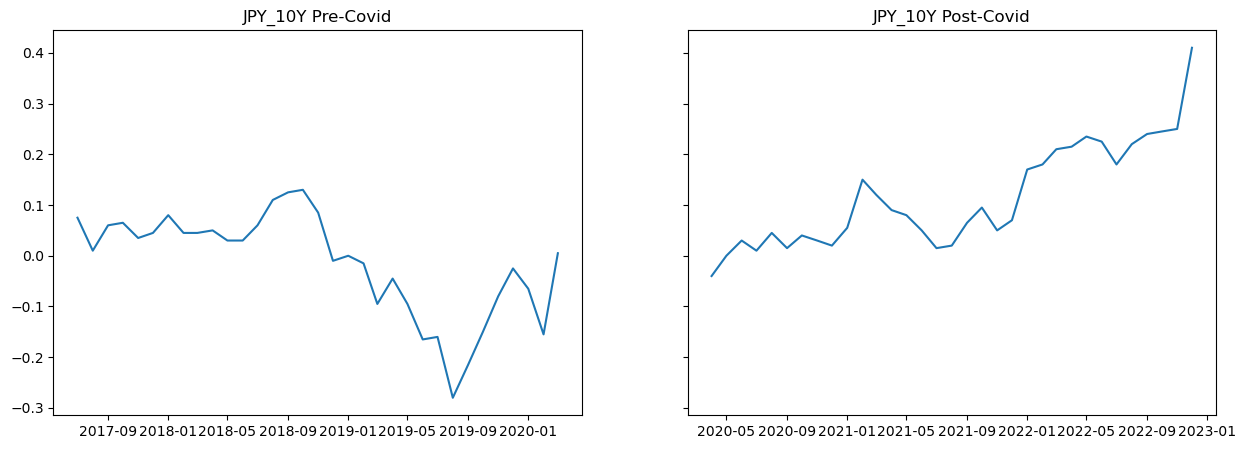

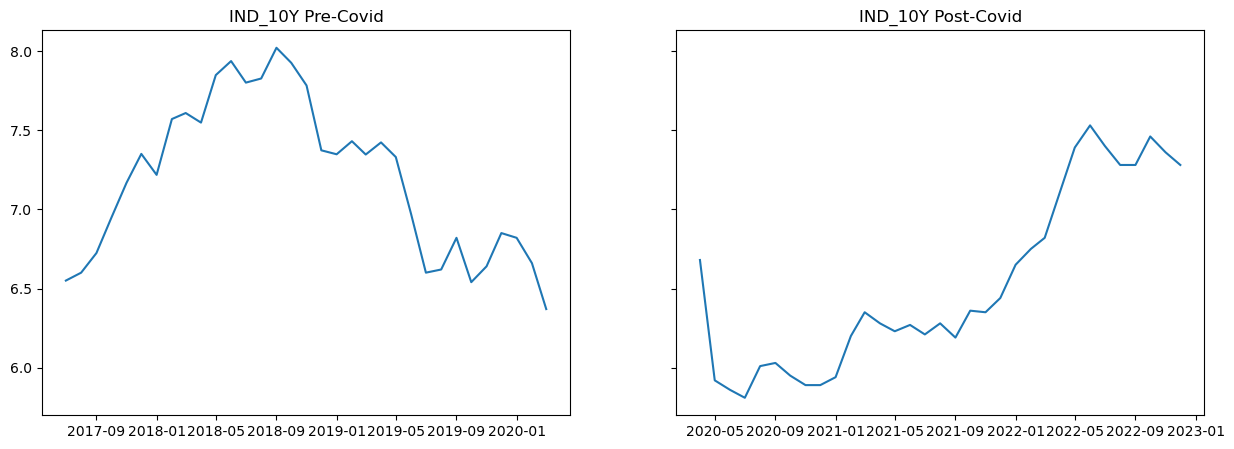

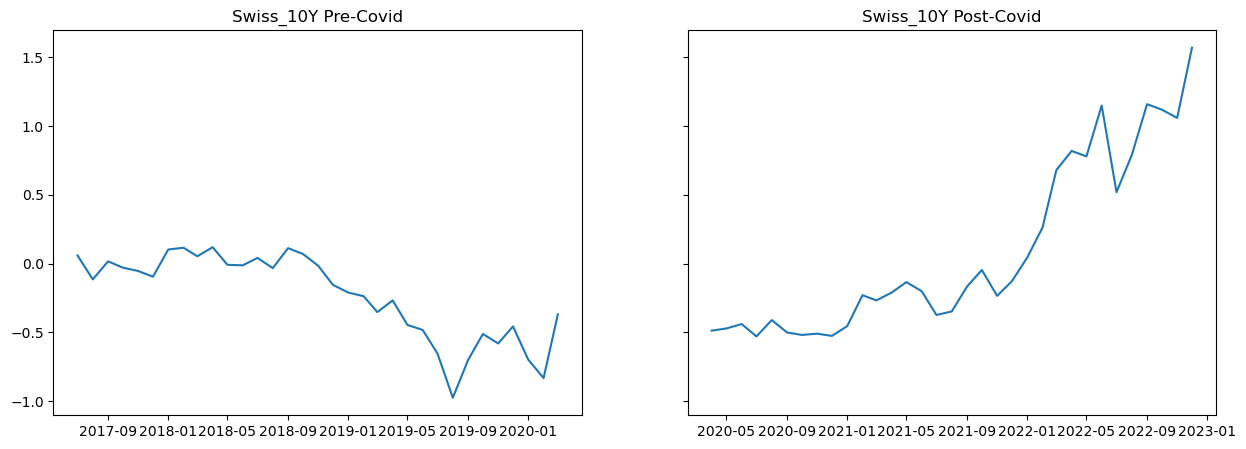

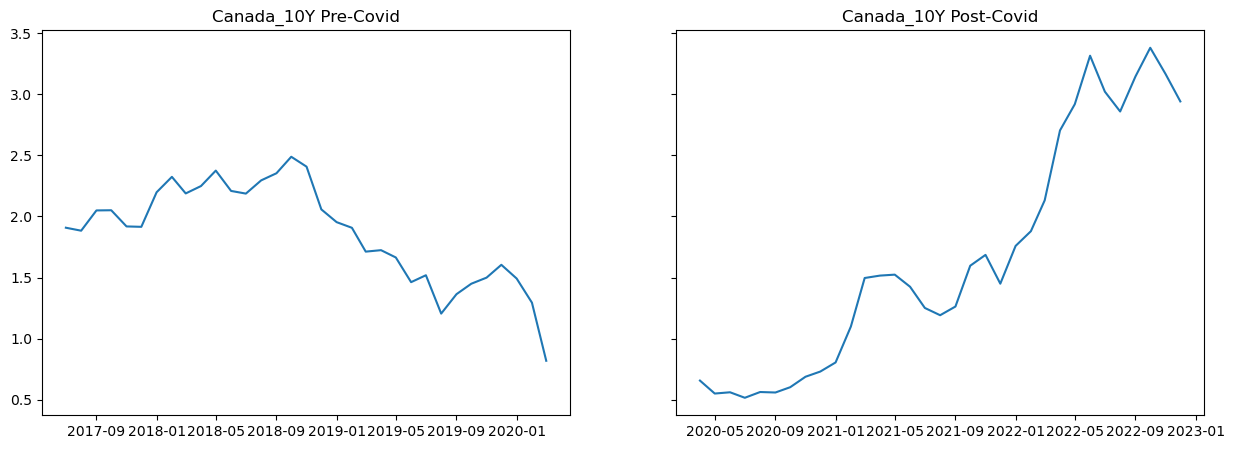

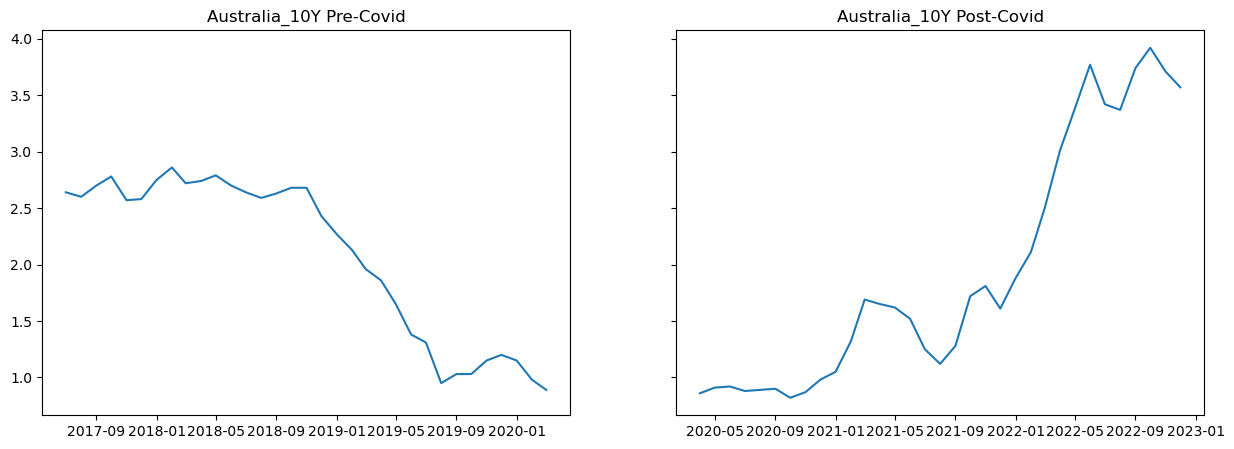

In [179]:
for i in range(len(ir_data_preCovid.columns)):
    fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex='col', sharey='row')
    ax= ax.flatten()
    ax[0].plot(ir_data_preCovid.iloc[:,i],label= ir_data_preCovid.columns[i])
    ax[0].set_title(ir_data_preCovid.columns[i]+' Pre-Covid')
    ax[1].plot(ir_data_postCovid.iloc[:,i],label= ir_data_postCovid.columns[i])
    ax[1].set_title(ir_data_postCovid.columns[i]+' Post-Covid')
    
plt.show() 

#### Volatility Clustering - Equities

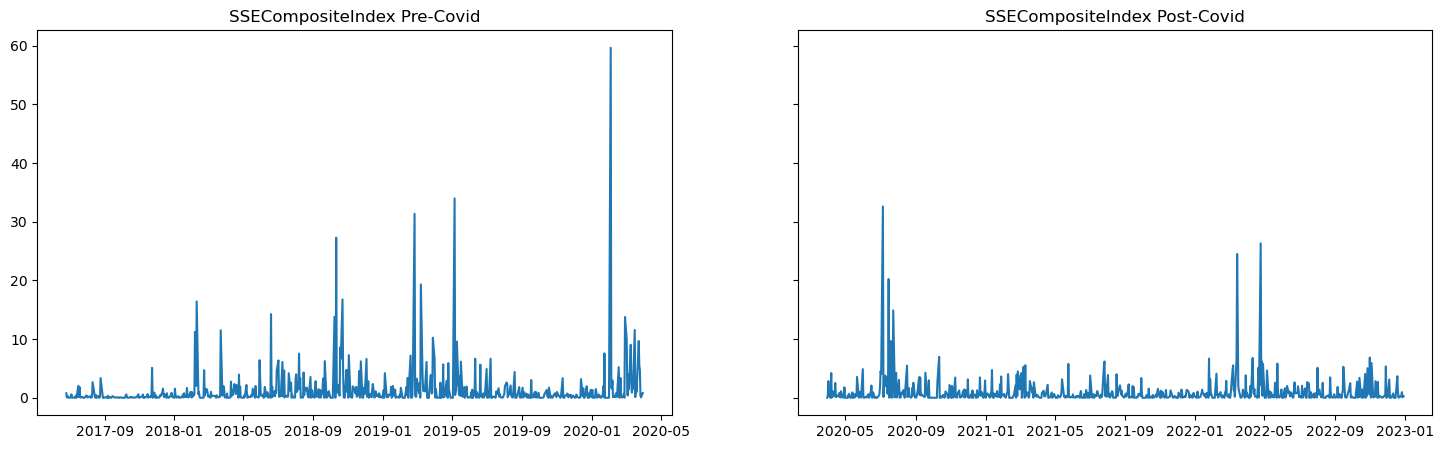

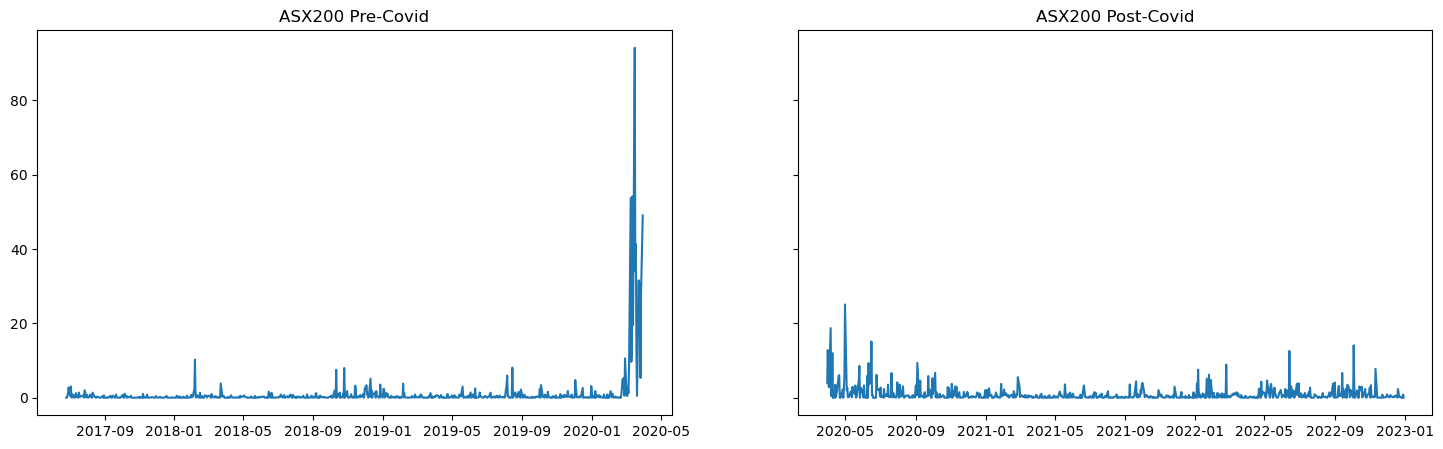

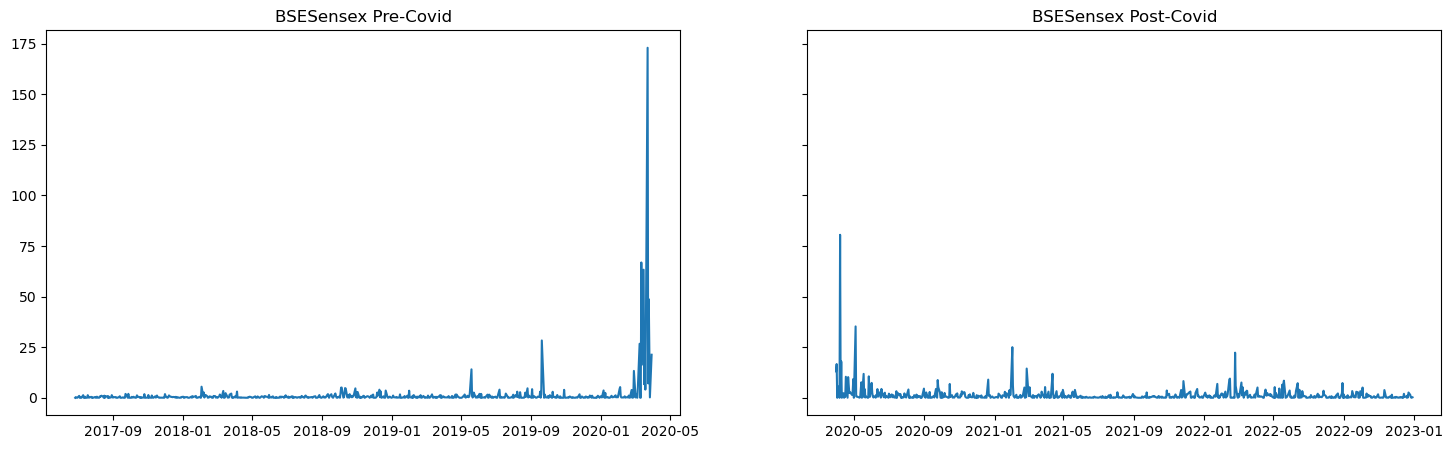

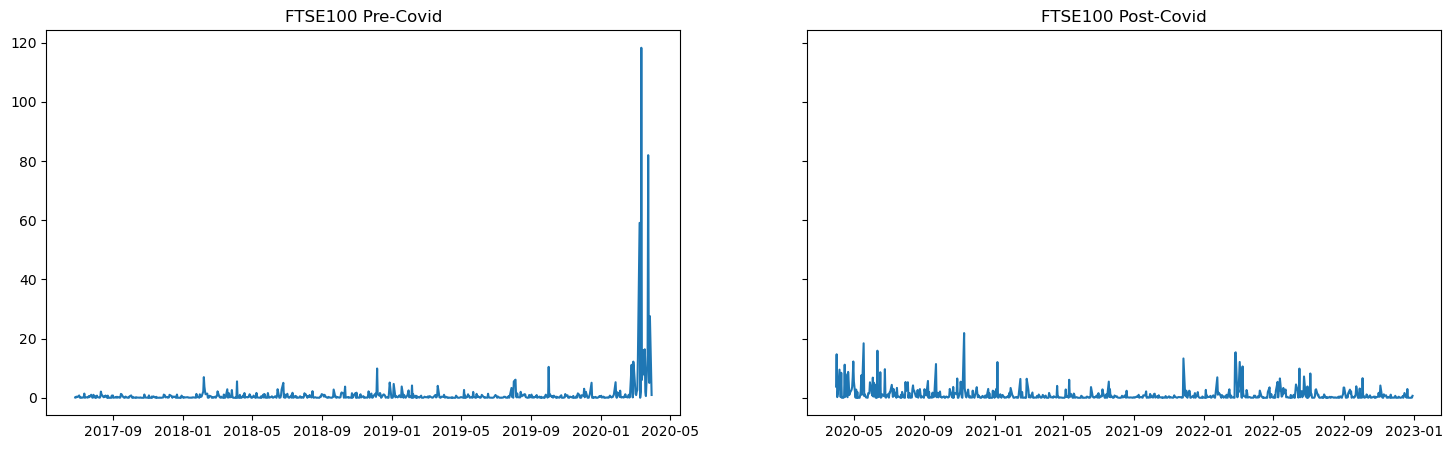

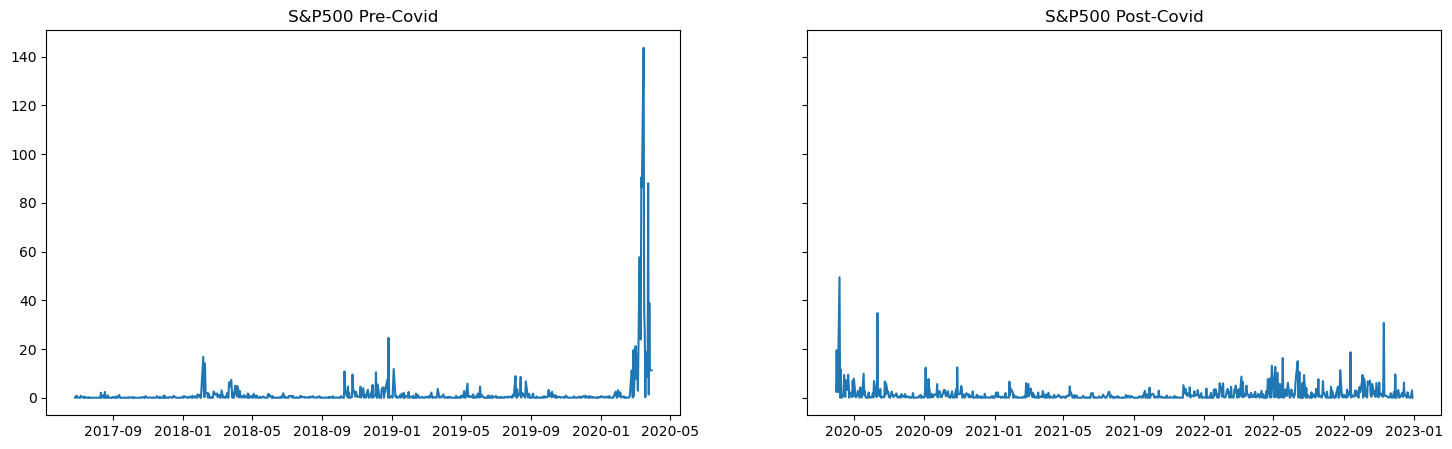

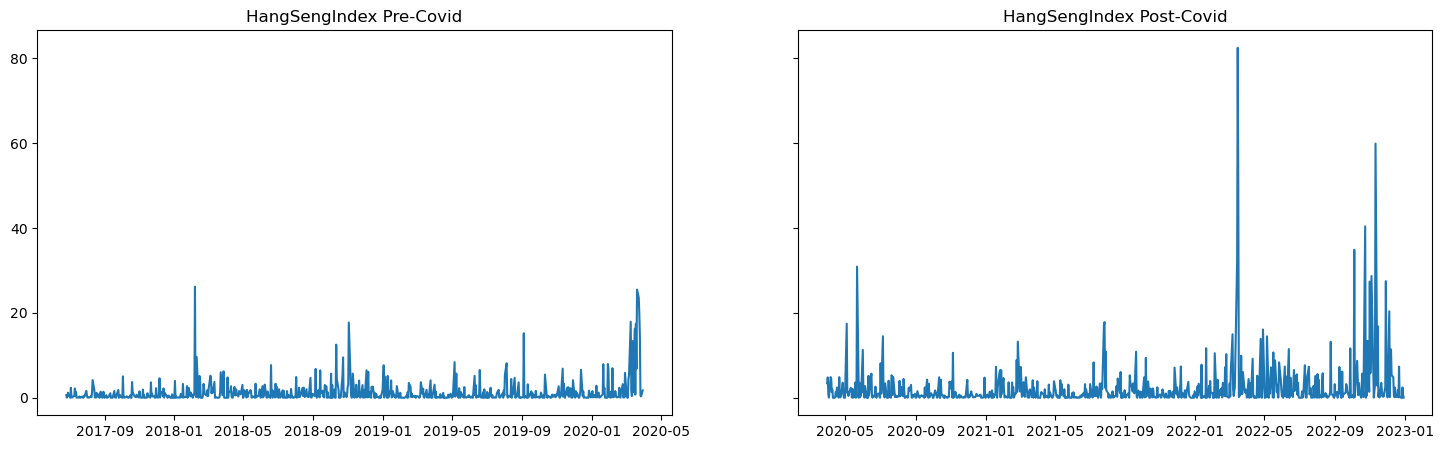

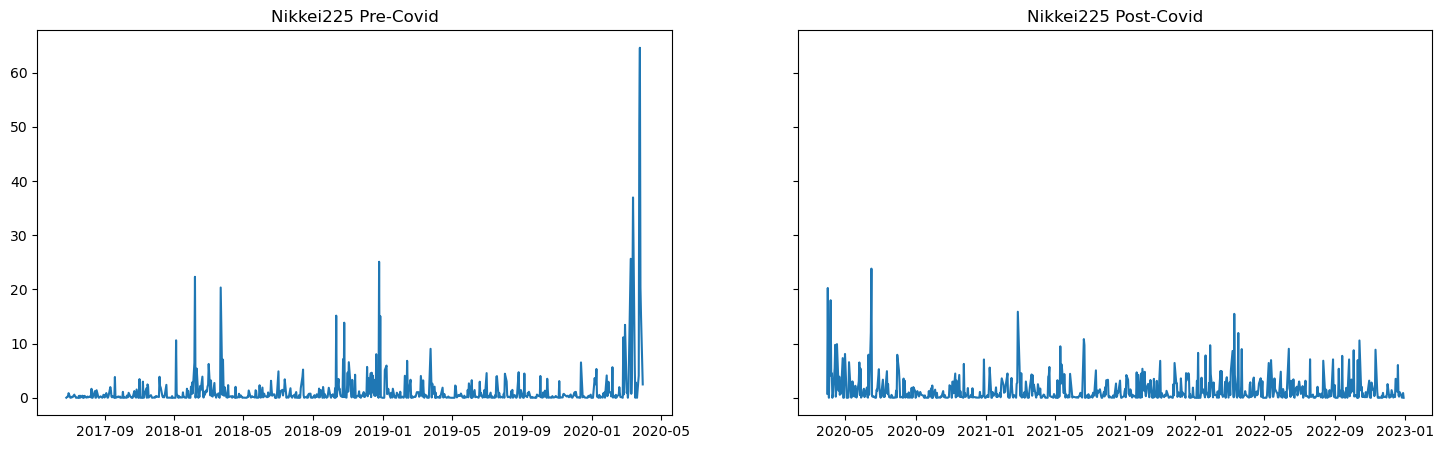

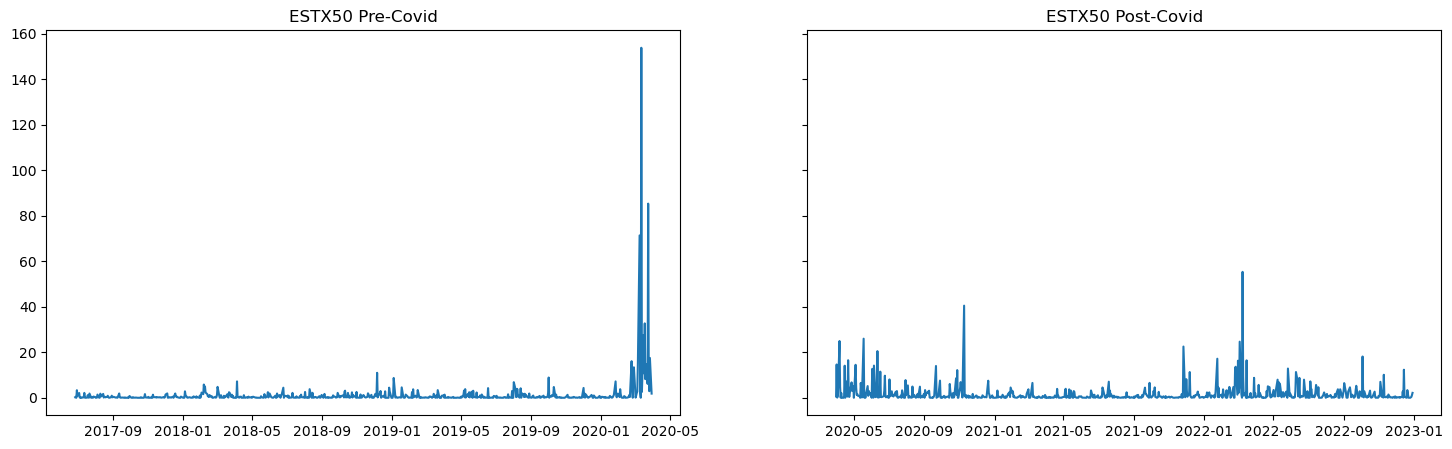

In [180]:
for i in range(len(equity_returns_preCovid.columns)):
    fig, ax = plt.subplots(1, 2, figsize=(18,5), sharex='col', sharey='row')
    ax= ax.flatten()
    ax[0].plot(equity_returns_preCovid.iloc[:,i]**2,label= equity_returns_preCovid.columns[i])
    ax[0].set_title(equity_returns_preCovid.columns[i]+' Pre-Covid')
    ax[1].plot(equity_returns_postCovid.iloc[:,i]**2,label= equity_returns_postCovid.columns[i])
    ax[1].set_title(equity_returns_postCovid.columns[i]+' Post-Covid')
    
plt.show() 


#### Volatility Clustering - FX

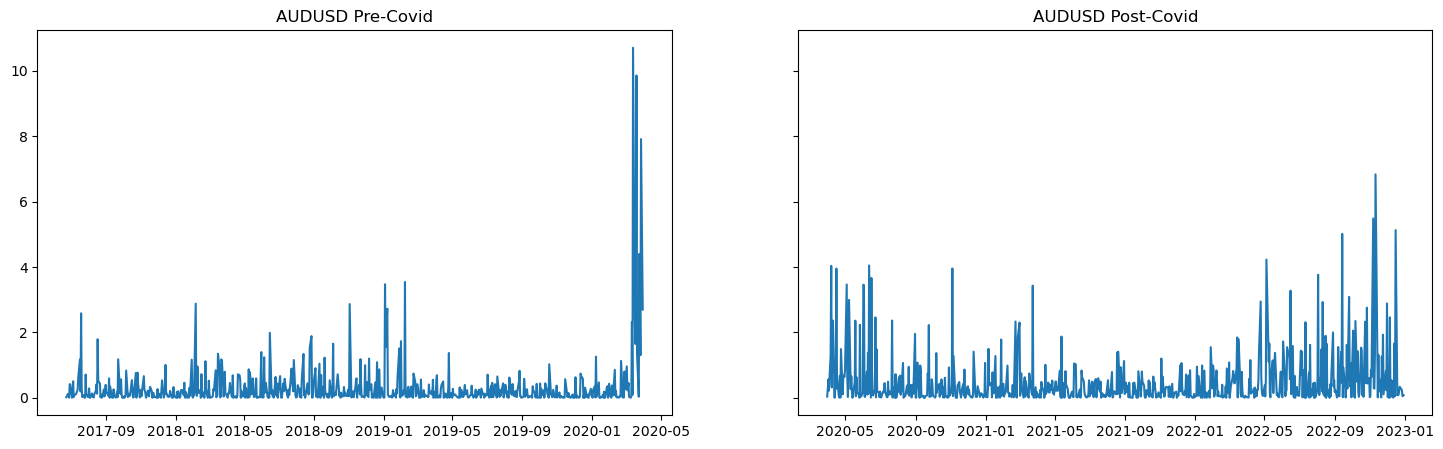

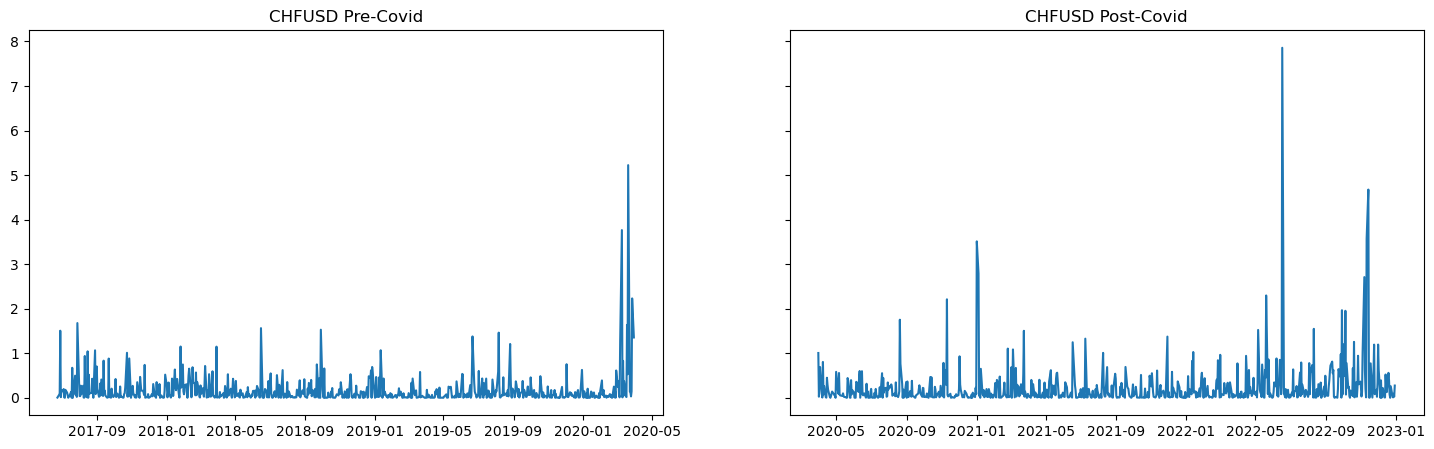

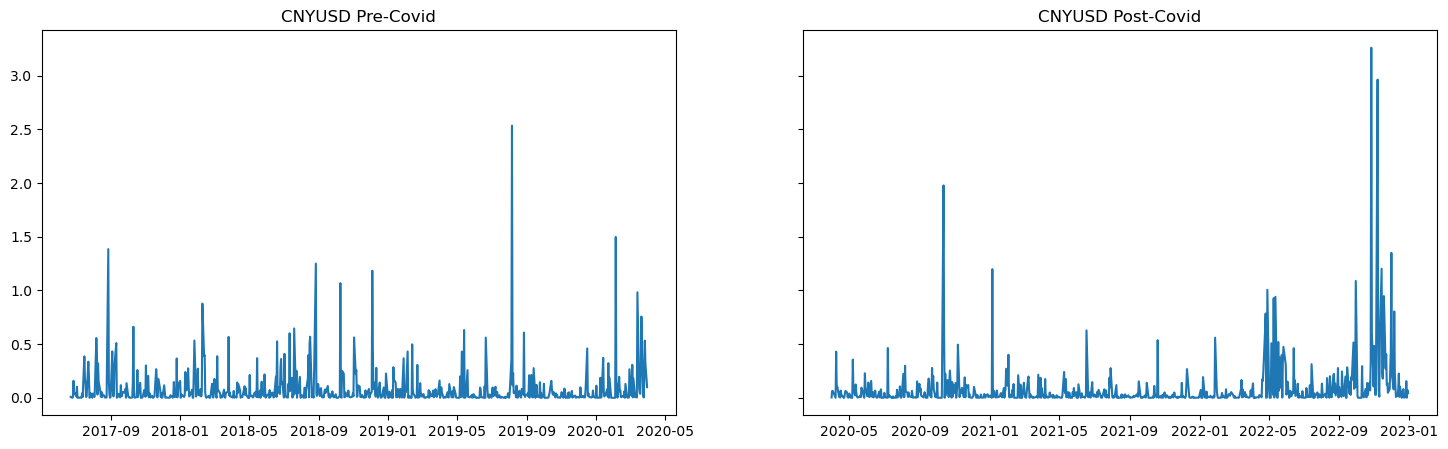

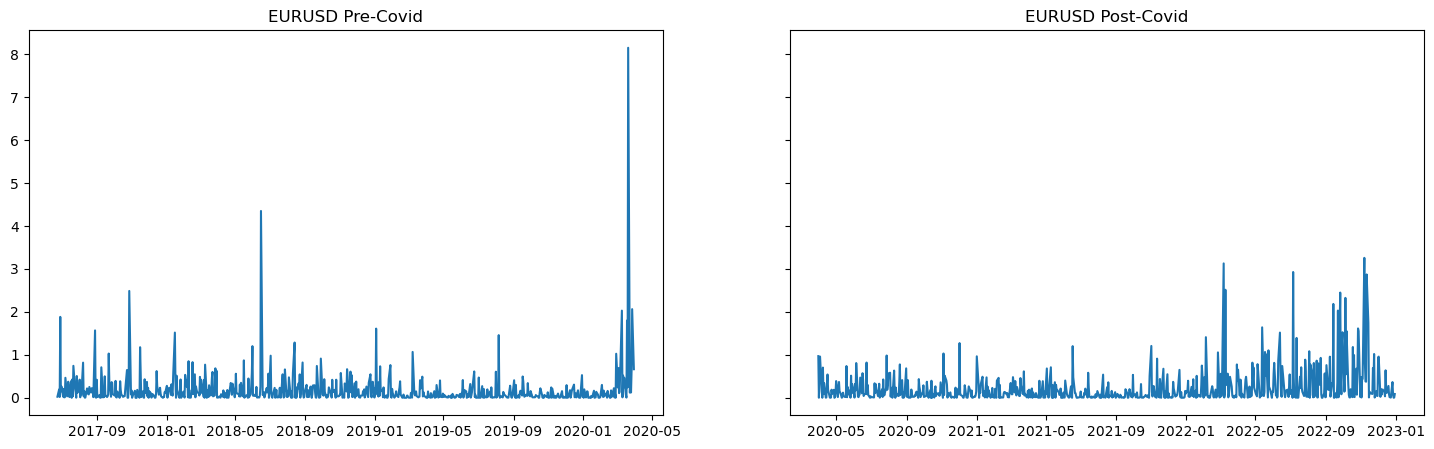

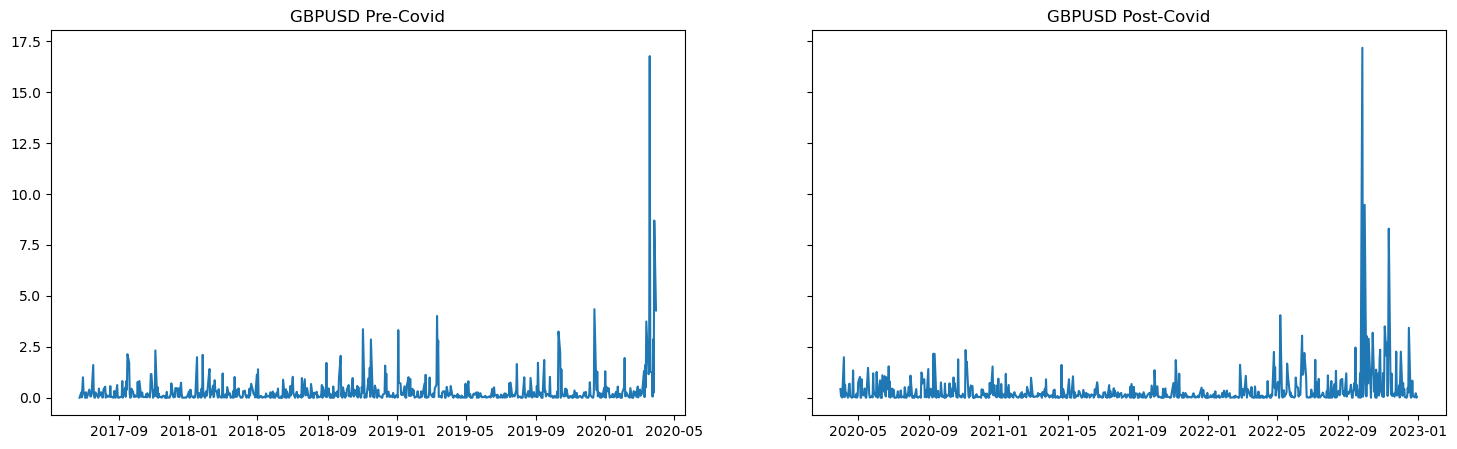

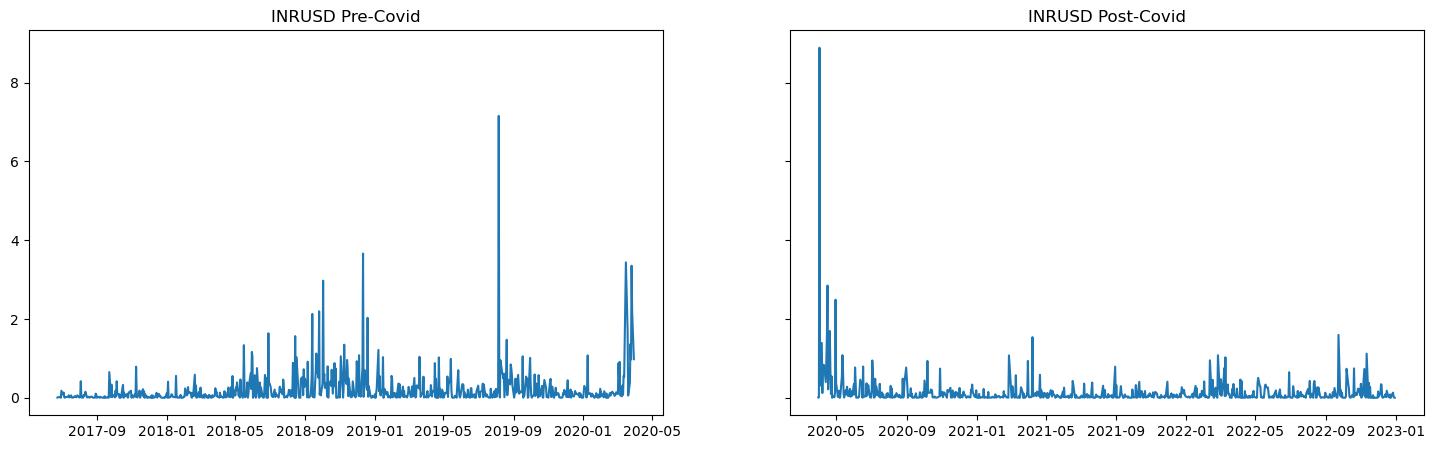

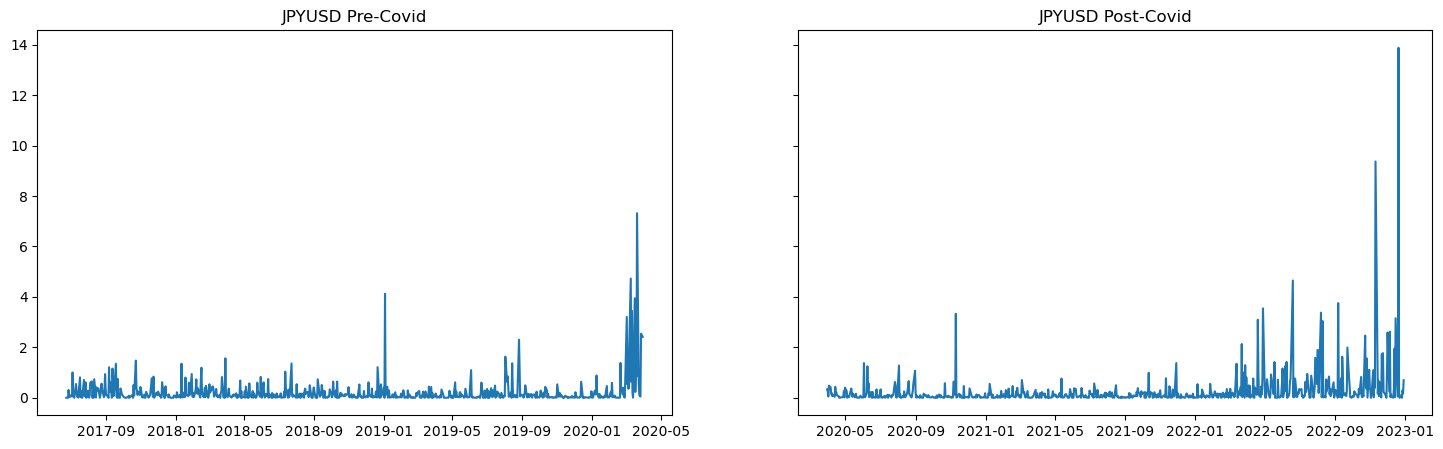

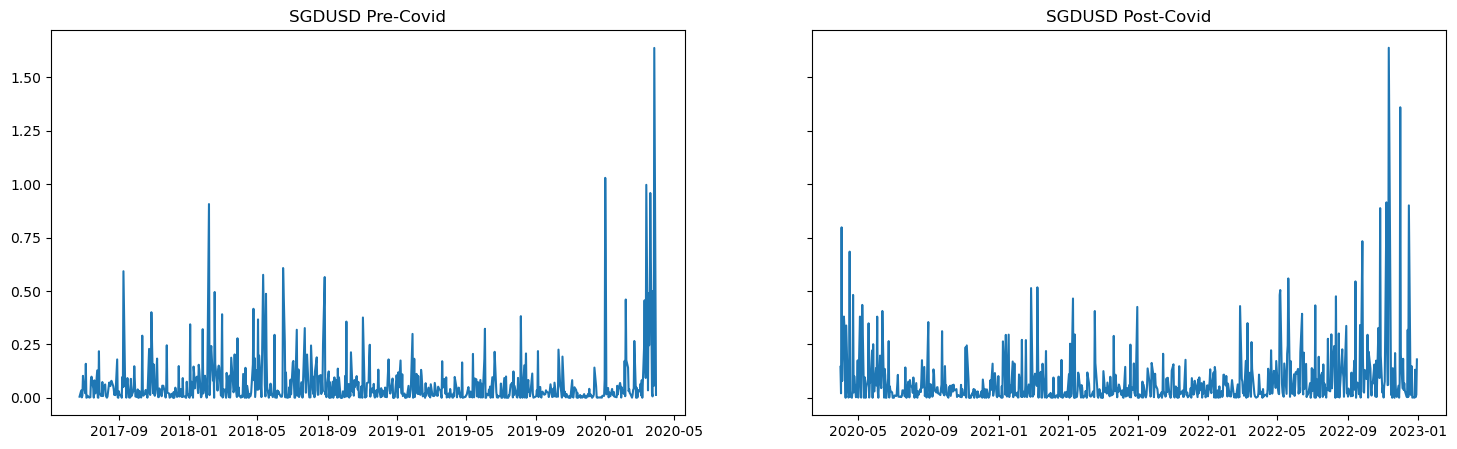

In [181]:
for i in range(len(fx_returns_preCovid.columns)):
    fig, ax = plt.subplots(1, 2, figsize=(18,5), sharex='col', sharey='row')
    ax= ax.flatten()
    ax[0].plot(fx_returns_preCovid.iloc[:,i]**2,label= fx_returns_preCovid.columns[i])
    ax[0].set_title(fx_returns_preCovid.columns[i]+' Pre-Covid')
    ax[1].plot(fx_returns_postCovid.iloc[:,i]**2,label= fx_returns_postCovid.columns[i])
    ax[1].set_title(fx_returns_postCovid.columns[i]+' Post-Covid')
    
plt.show() 


#### Volatility Clustering - Commodities

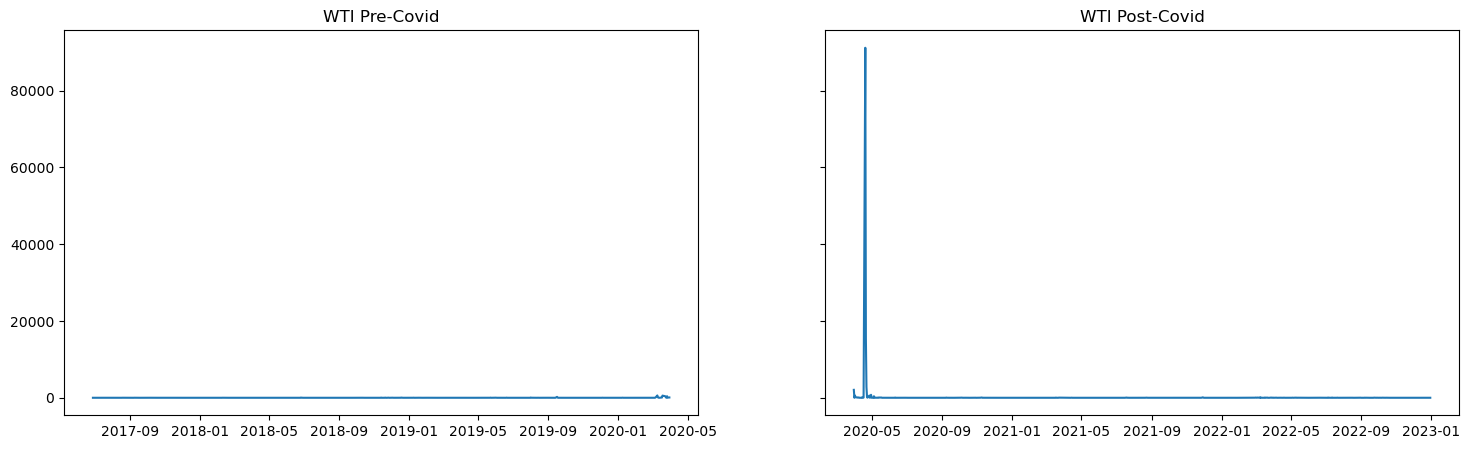

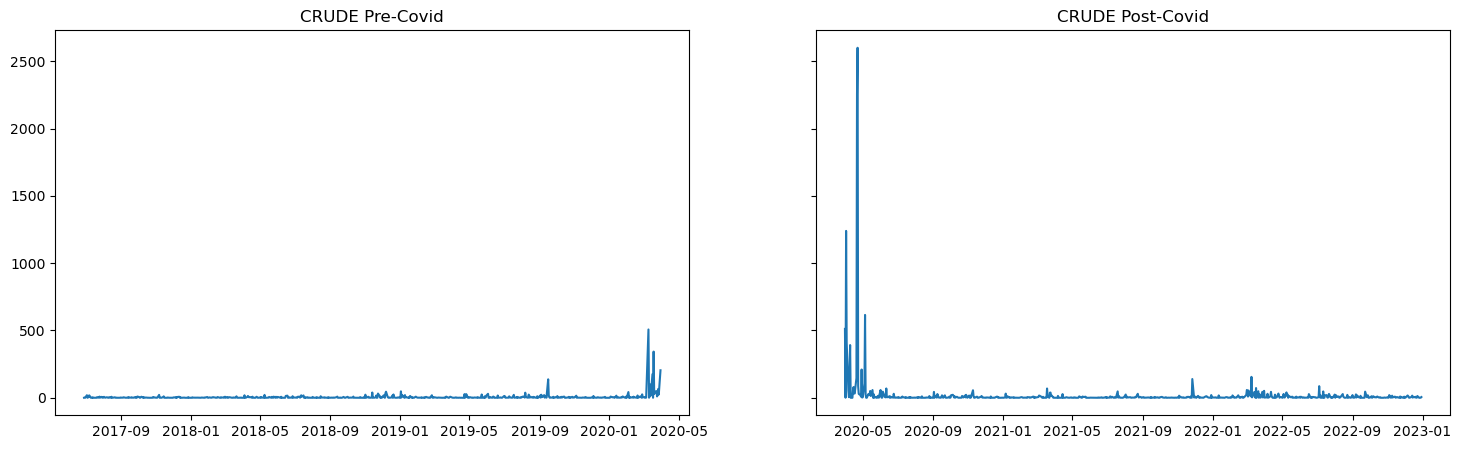

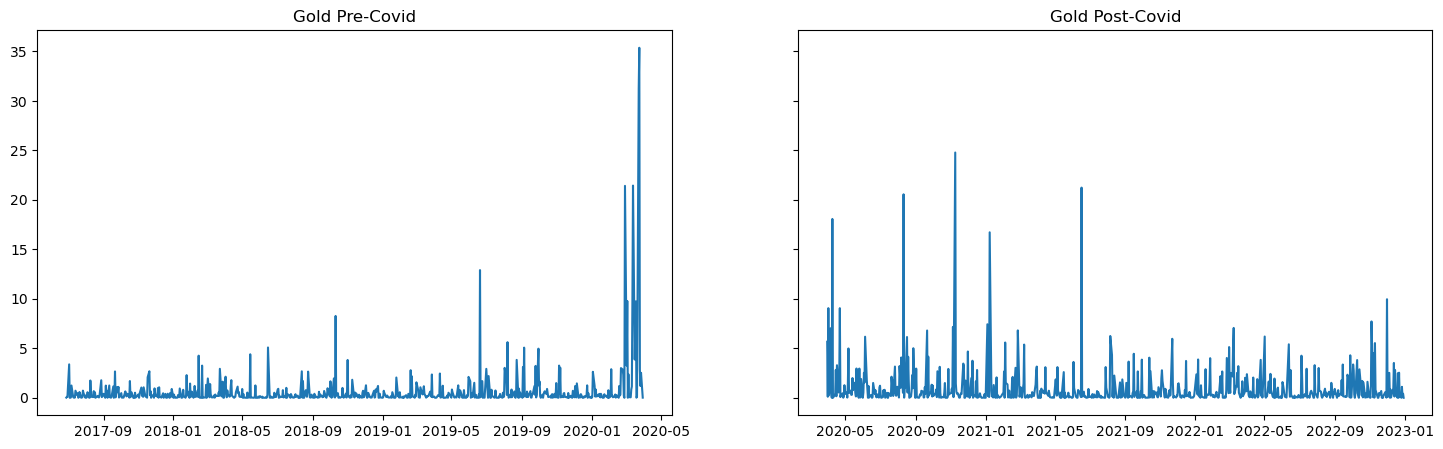

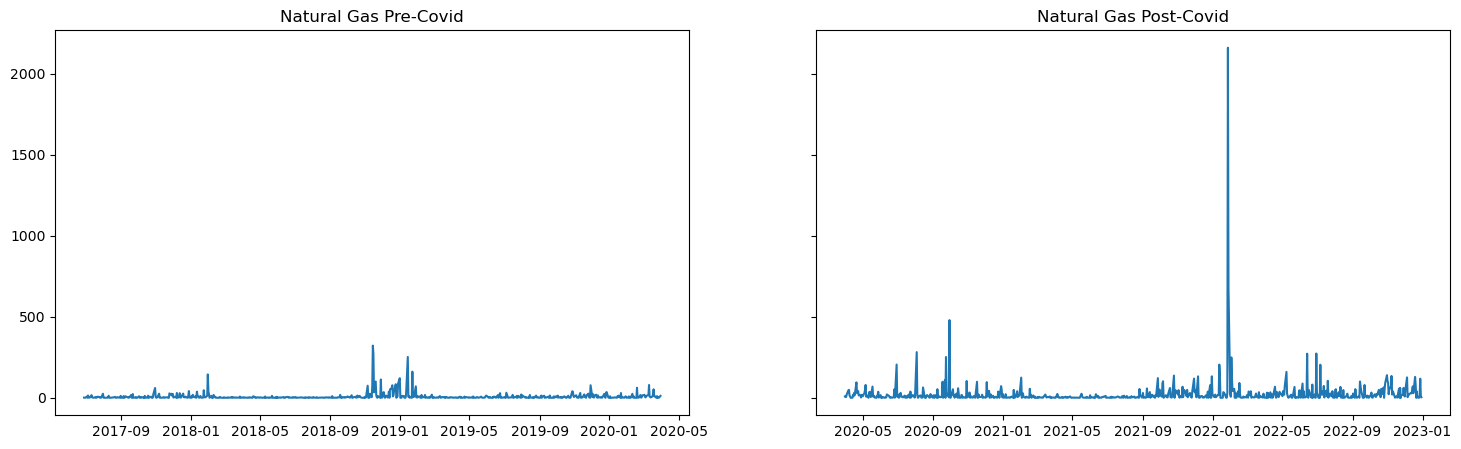

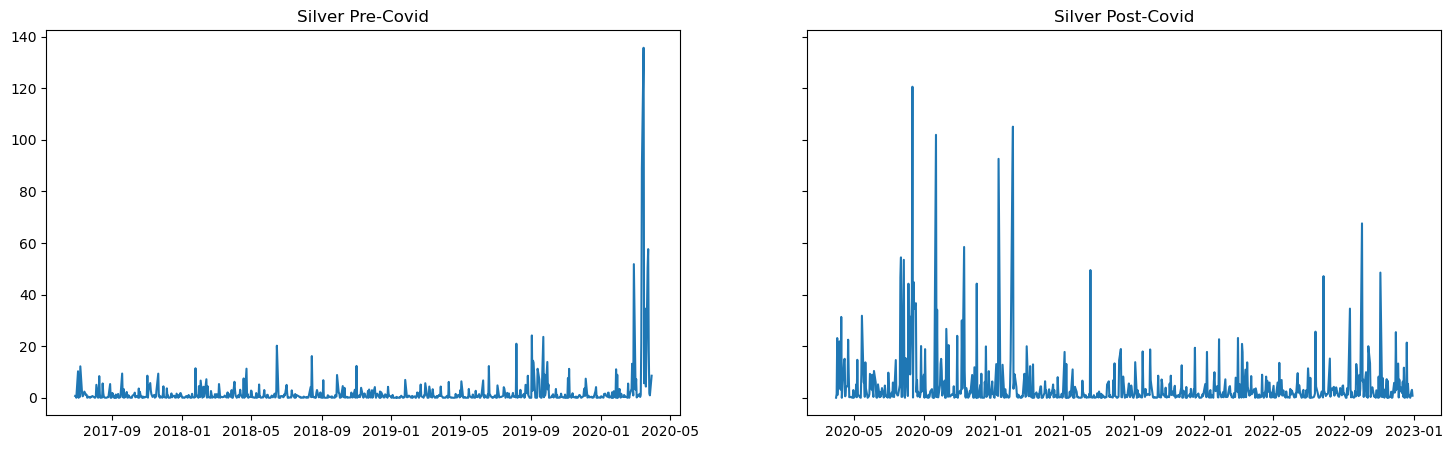

In [182]:
for i in range(len(commodity_returns_preCovid.columns)):
    fig, ax = plt.subplots(1, 2, figsize=(18,5), sharex='col', sharey='row')
    ax= ax.flatten()
    ax[0].plot(commodity_returns_preCovid.iloc[:,i]**2,label= commodity_returns_preCovid.columns[i])
    ax[0].set_title(commodity_returns_preCovid.columns[i]+' Pre-Covid')
    ax[1].plot(commodity_returns_postCovid.iloc[:,i]**2,label= commodity_returns_postCovid.columns[i])
    ax[1].set_title(commodity_returns_postCovid.columns[i]+' Post-Covid')
    
plt.show() 


#### Volatility Clustering - Interest Rates

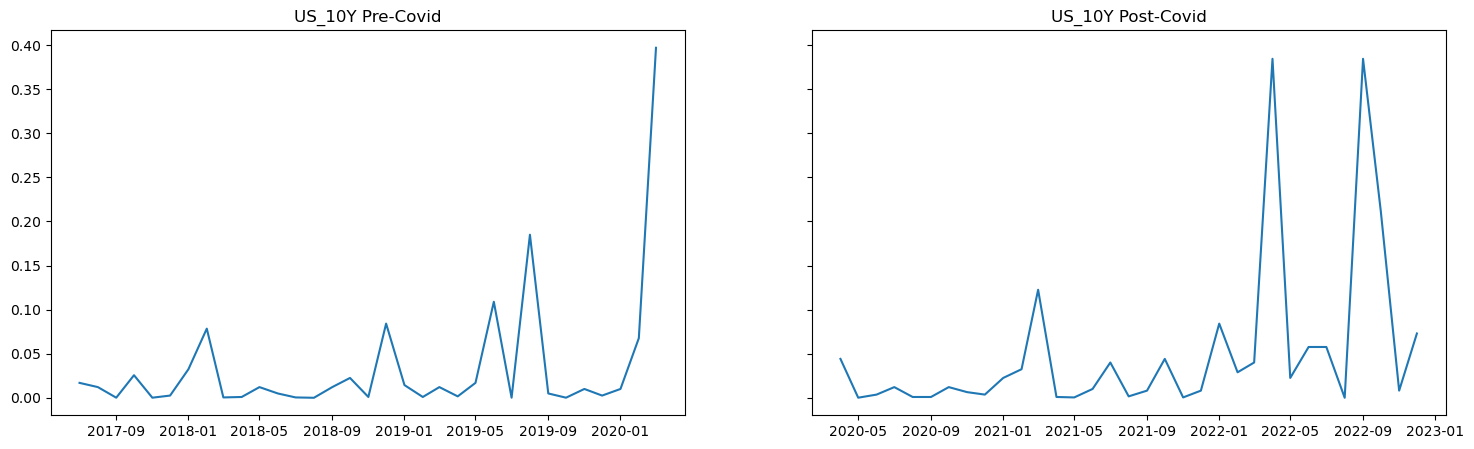

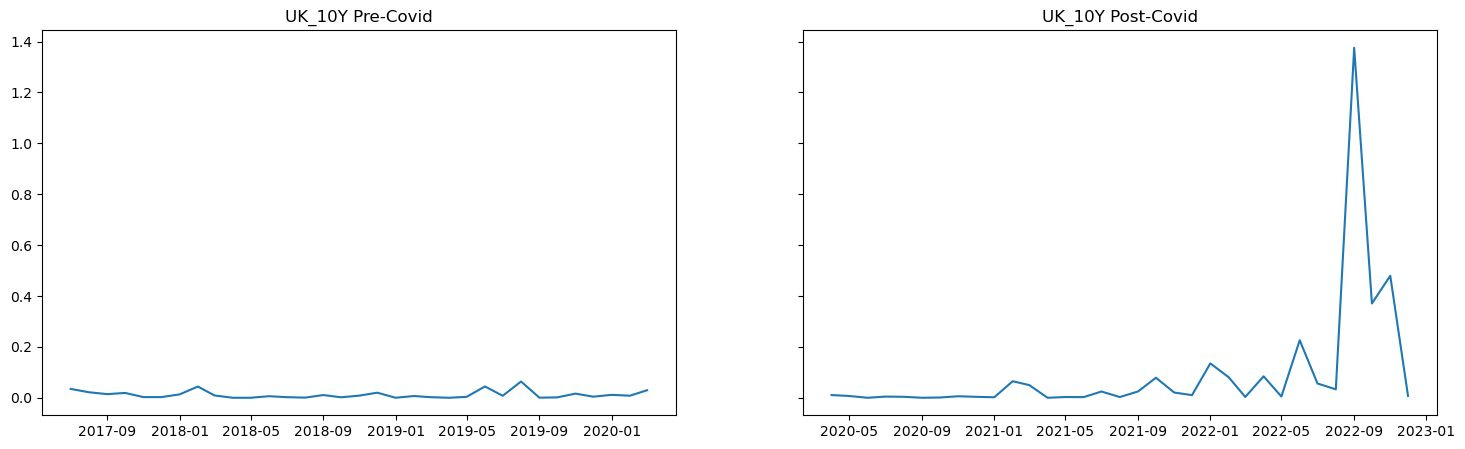

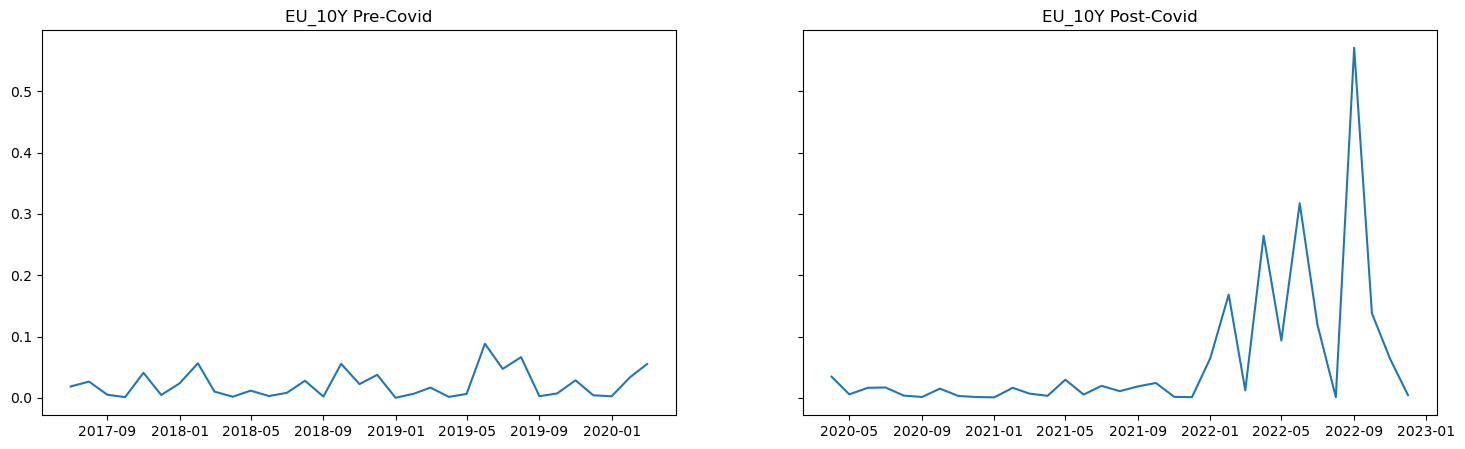

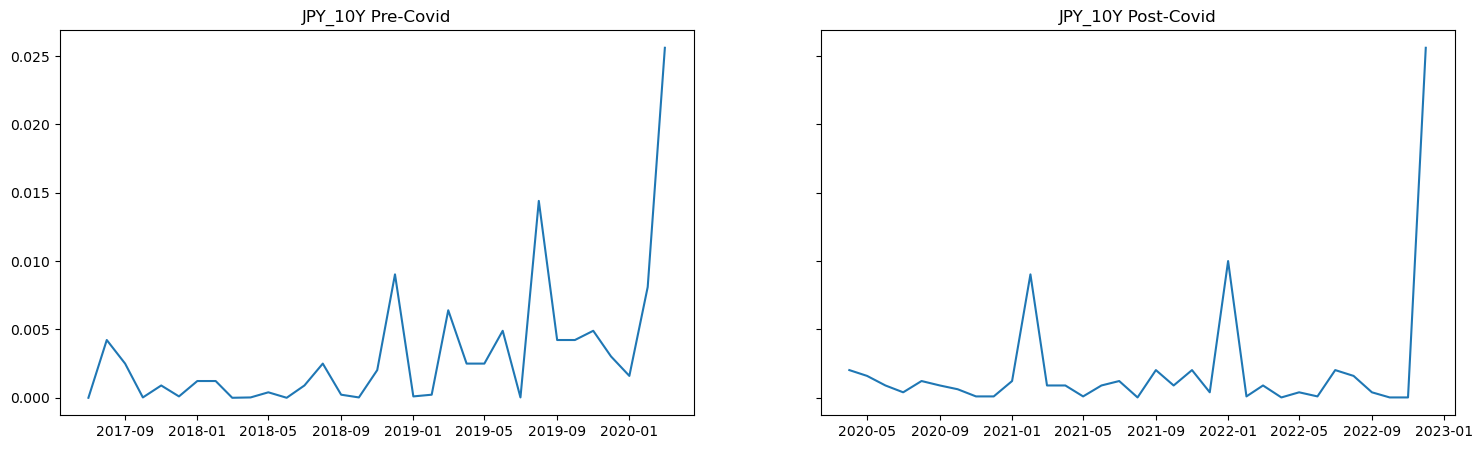

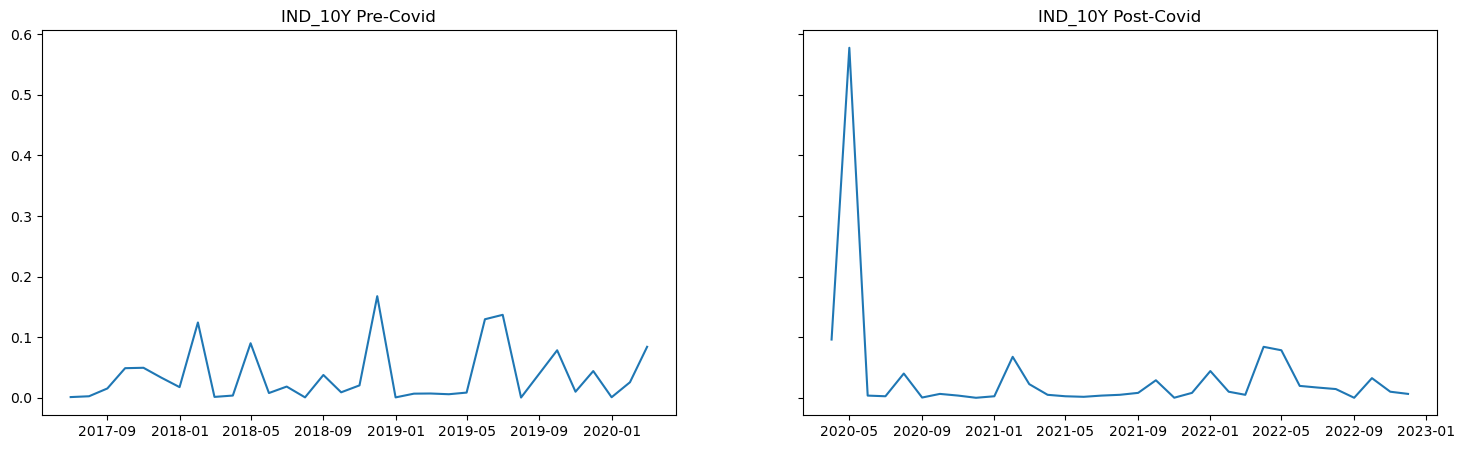

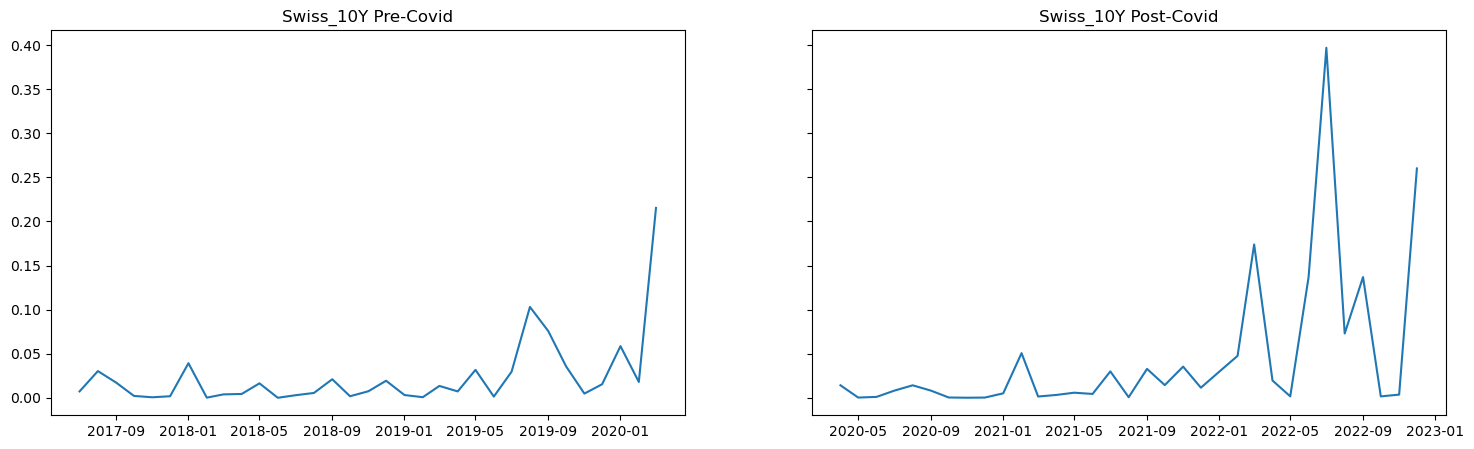

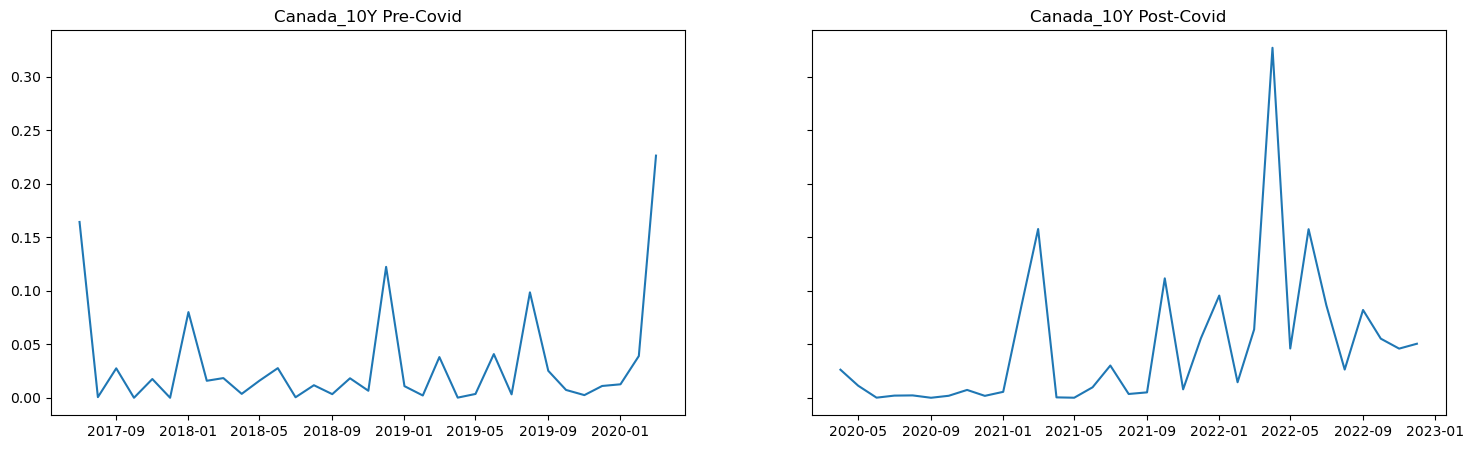

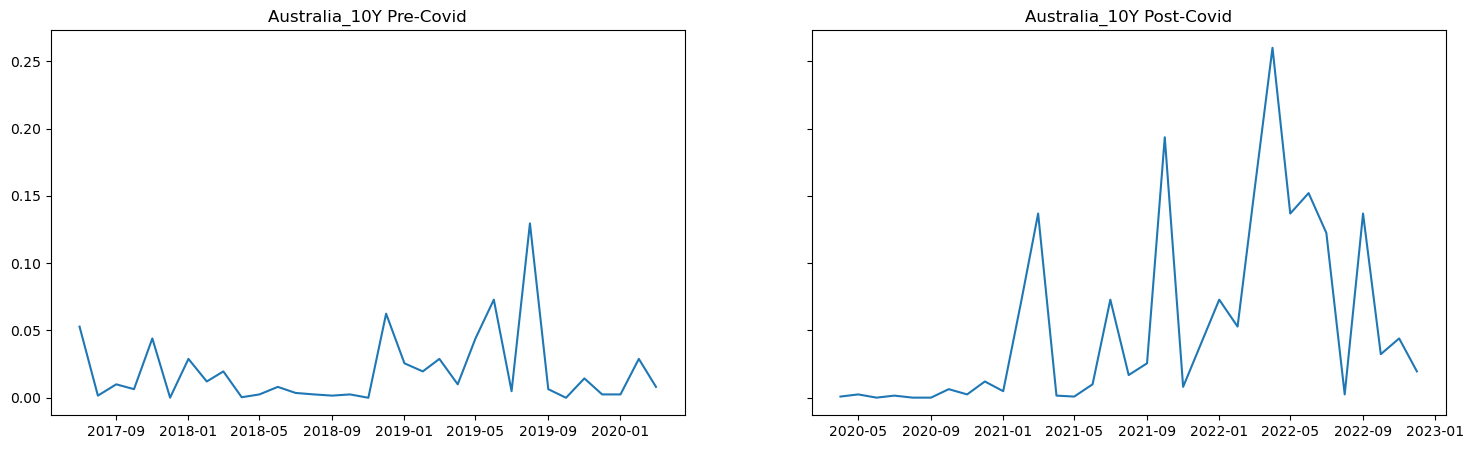

In [183]:
for i in range(len(ir_returns_preCovid.columns)):
    fig, ax = plt.subplots(1, 2, figsize=(18,5), sharex='col', sharey='row')
    ax= ax.flatten()
    ax[0].plot(ir_returns_preCovid.iloc[:,i]**2,label= ir_returns_preCovid.columns[i])
    ax[0].set_title(ir_returns_preCovid.columns[i]+' Pre-Covid')
    ax[1].plot(ir_returns_postCovid.iloc[:,i]**2,label= ir_returns_postCovid.columns[i])
    ax[1].set_title(ir_returns_postCovid.columns[i]+' Post-Covid')
    
plt.show() 


#### Correlation Analysis - Equities

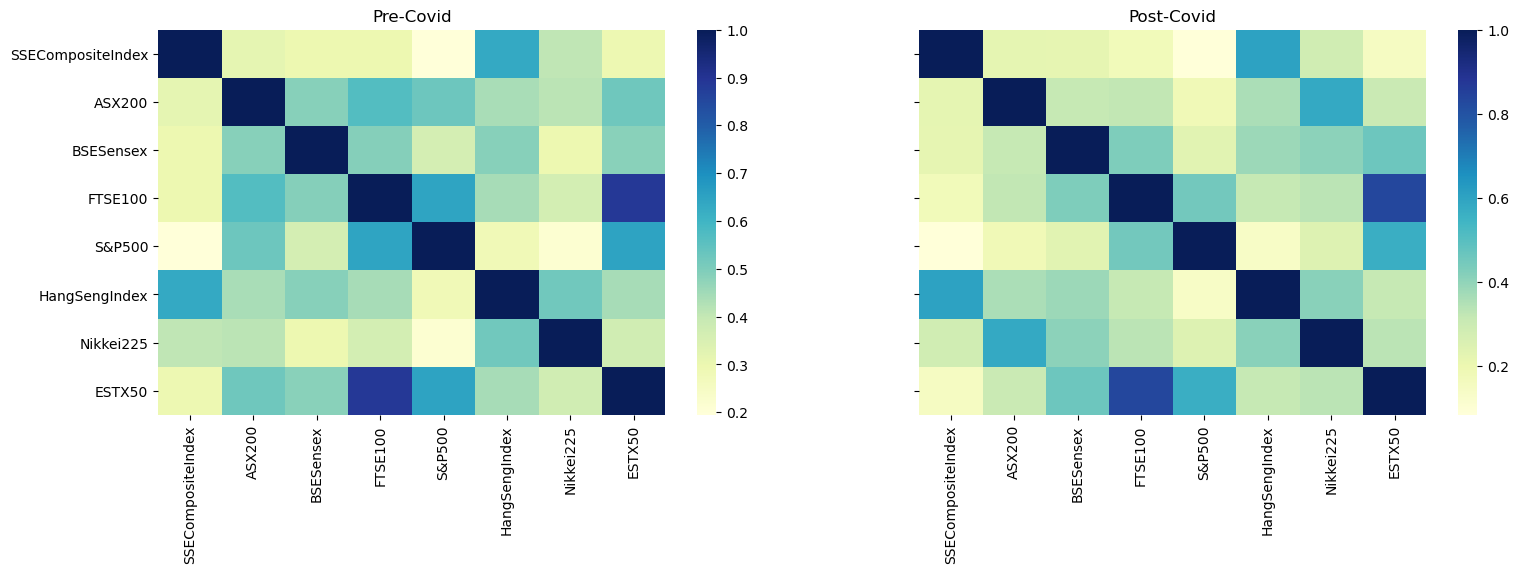

In [185]:
fig, ax = plt.subplots(1, 2, figsize=(18,5), sharex='col', sharey='row')
ax= ax.flatten()
sns.heatmap(equity_returns_preCovid.corr(), cmap="YlGnBu", annot=False, ax = ax[0])
ax[0].set_title('Pre-Covid')
sns.heatmap(equity_returns_postCovid.corr(), cmap="YlGnBu", annot=False, ax = ax[1])
ax[1].set_title('Post-Covid')
plt.show() 


#### Correlation Analysis - FX

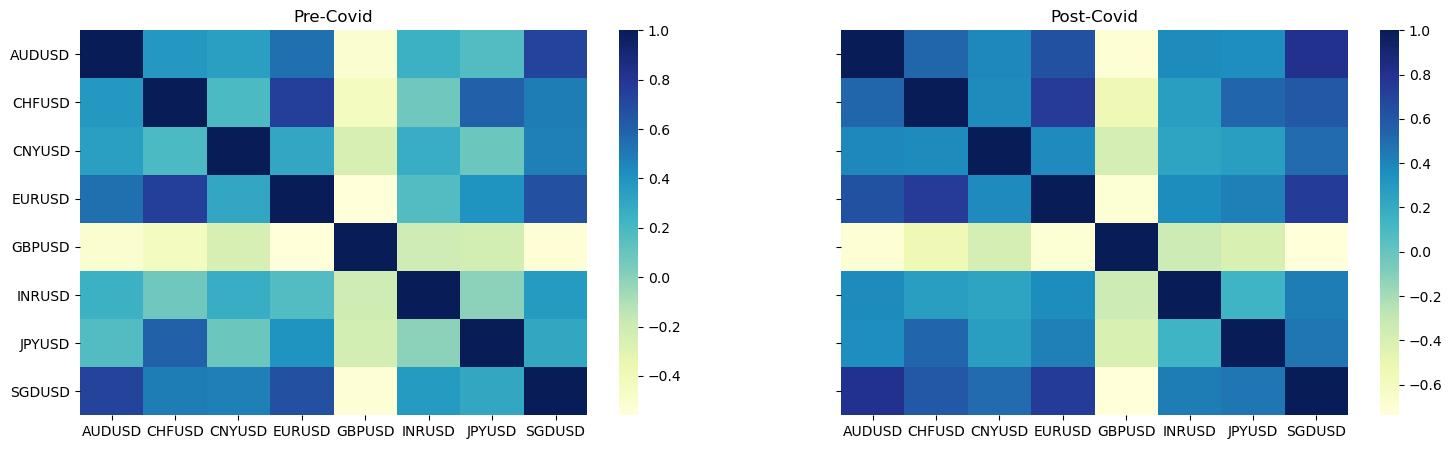

In [186]:
fig, ax = plt.subplots(1, 2, figsize=(18,5), sharex='col', sharey='row')
ax= ax.flatten()
sns.heatmap(fx_returns_preCovid.corr(), cmap="YlGnBu", annot=False, ax = ax[0])
ax[0].set_title('Pre-Covid')
sns.heatmap(fx_returns_postCovid.corr(), cmap="YlGnBu", annot=False, ax = ax[1])
ax[1].set_title('Post-Covid')
plt.show() 


#### Correlation Analysis - Commodities

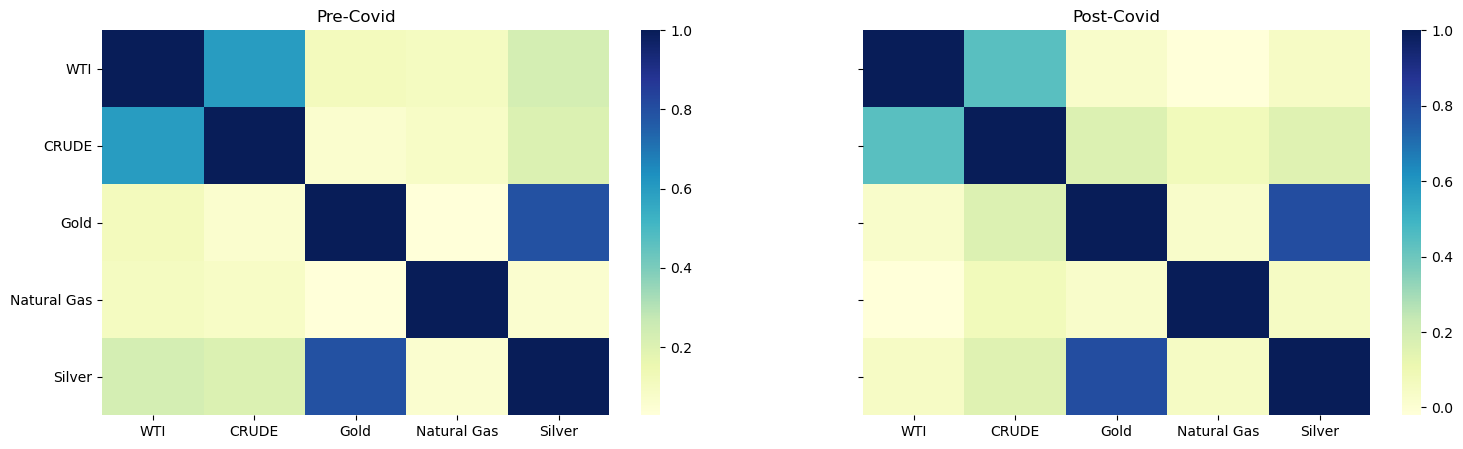

In [187]:
fig, ax = plt.subplots(1, 2, figsize=(18,5), sharex='col', sharey='row')
ax= ax.flatten()
sns.heatmap(commodity_returns_preCovid.corr(), cmap="YlGnBu", annot=False, ax = ax[0])
ax[0].set_title('Pre-Covid')
sns.heatmap(commodity_returns_postCovid.corr(), cmap="YlGnBu", annot=False, ax = ax[1])
ax[1].set_title('Post-Covid')
plt.show() 


#### Correlation Analysis - Interest Rates

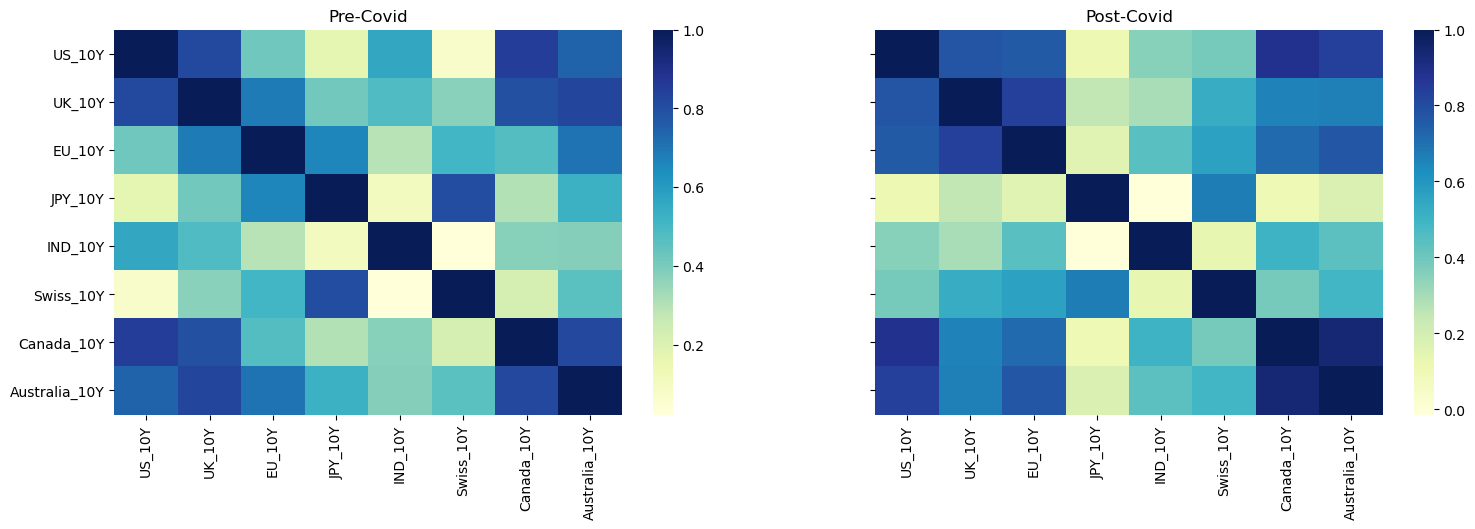

In [188]:
fig, ax = plt.subplots(1, 2, figsize=(18,5), sharex='col', sharey='row')
ax= ax.flatten()
sns.heatmap(ir_returns_preCovid.corr(), cmap="YlGnBu", annot=False, ax = ax[0])
ax[0].set_title('Pre-Covid')
sns.heatmap(ir_returns_postCovid.corr(), cmap="YlGnBu", annot=False, ax = ax[1])
ax[1].set_title('Post-Covid')
plt.show() 
